In [ ]:
# https://www.statista.com/statistics/1192394/cheese-export-volume-ireland/

In [178]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statistics as stat

#Mann-Whitney U test
import scipy.stats as stats

#One way Anova Test
from scipy.stats import f_oneway

#import plotly for interactive graphs
import plotly.express as px 

#import Altar for interactive plots
import altair as alt 

# import to perform Shapiro-Wilk
from scipy.stats import shapiro 
from scipy.stats import lognorm

# import to perform Q Q plot
import statsmodels.api as sm

# import the libraries for LinearRegression
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Libary for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

#Plot PACF function
from statsmodels.graphics.tsaplots import plot_pacf

#Libary for Autoregressive model
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

# Calculate Skewness 
from scipy.stats import skew

#Libary for the Time Series Split Cross Validation Score algorithm
from sklearn.model_selection import cross_val_score

#libraries for Ridge Regression
from sklearn.linear_model import Ridge

#libraries for GridSearchCV
from sklearn.model_selection import GridSearchCV

#Libary for the Time Series Split Cross-Validation algorithm
from tsxv.splitTrain import split_train_variableInput

In [179]:
#Display option to see more columns. Usefull to see all the columns of Dummy variables for Machine Learning
pd.set_option('display.max_columns', 120)

#make the charts look better for displays with retina resolution 
%config InlineBackend.figure_format = 'retina'

In [180]:
#Read in milk collected annual data
df_MilkCollected_Annual = pd.read_csv('C:\\Project CA2\\Data\\milk products annual.csv')

#Read in file with Country, Alpha 2 and Alpha 3 codes
df_CountryCode = pd.read_csv('C:\\Project CA2\\Data\\ISO Codes.csv')


### Annual Data
### Output is 4 files
### 1 file with  Raw Milk, Drinking Milk, Cream and Butter Produced Annualy for all EU countries from 1970
### 3 seperate files with country data for Ireland, Belgium and France from 1970

In [181]:
df_MilkCollected_Annual.head()

DATAFLOW        LAST UPDATE freq dairyprod   unit geo  \
0  ESTAT:APRO_MK_COLA(1.0)  30/11/22 23:00:00    A    D1110D  THS_T  AL   
1  ESTAT:APRO_MK_COLA(1.0)  30/11/22 23:00:00    A    D1110D  THS_T  AL   
2  ESTAT:APRO_MK_COLA(1.0)  30/11/22 23:00:00    A    D1110D  THS_T  AL   
3  ESTAT:APRO_MK_COLA(1.0)  30/11/22 23:00:00    A    D1110D  THS_T  AL   
4  ESTAT:APRO_MK_COLA(1.0)  30/11/22 23:00:00    A    D1110D  THS_T  AL   

   TIME_PERIOD  OBS_VALUE OBS_FLAG  
0         2017      57.36        p  
1         2018      64.39      NaN  
2         2019      56.82      NaN  
3         2020      56.27      NaN  
4         2021      58.94      NaN

In [182]:
#Drop unwanted columns
#These columns have meta information that is constant or not useful 
df_MilkCollected_Annual.drop(['DATAFLOW', 'LAST UPDATE','freq','unit','OBS_FLAG'], axis=1,inplace=True)

In [183]:
df_MilkCollected_Annual.head()

dairyprod geo  TIME_PERIOD  OBS_VALUE
0    D1110D  AL         2017      57.36
1    D1110D  AL         2018      64.39
2    D1110D  AL         2019      56.82
3    D1110D  AL         2020      56.27
4    D1110D  AL         2021      58.94

In [184]:
#Rename colunms to something more meaningful 
df_MilkCollected_Annual = df_MilkCollected_Annual.rename(columns={'dairyprod': 'Product', 'geo': 'Geo', 'TIME_PERIOD': 'Year' ,'OBS_VALUE': 'Amount' }) 

In [185]:
#pivot into more useful format 
df_MilkCollected_Annual = df_MilkCollected_Annual.pivot_table(index = ['Year','Geo'], columns = ['Product'], values ='Amount')

In [186]:
df_MilkCollected_Annual.head()

Product     D1110D  D1200DME    D2100  D2200V  D3100_X_3113   D3113   D3200  \
Year Geo                                                                      
1968 BE    2909.55       NaN   579.00    6.80         19.13  121.08   36.36   
     DE   18318.09       NaN  3138.00  185.56         27.84  409.00  443.02   
     DK    4767.03       NaN      NaN   32.44           NaN     NaN     NaN   
     FR   19245.86       NaN  2370.18   44.14         52.19  692.48  190.71   
     IE        NaN       NaN      NaN     NaN           NaN     NaN     NaN   

Product   D4100   D6000   D7121  
Year Geo                         
1968 BE     NaN   76.21   31.81  
     DE     NaN  523.58  438.48  
     DK     NaN  159.55  105.50  
     FR     NaN  500.50  649.87  
     IE     NaN   73.25     NaN

In [187]:
#Delete years 1968 and 1970 as there is no data for Ireland for those years
df_MilkCollected_Annual = df_MilkCollected_Annual.drop([1968, 1969])

In [188]:
#Reset the index
df_MilkCollected_Annual = df_MilkCollected_Annual.reset_index( )

In [189]:
#Merge country codes with the milk collected dataframe
#Now the milk collected dataframe has ISO 3 country code for choropleth and country name
df_MilkCollected_Annual = pd.merge(df_CountryCode,df_MilkCollected_Annual,on='Geo')

In [190]:
#Drop unwanted columns
#Dropping columns that are NOT Milk Deliveries, Drinking Milk, Cream and Butter produced
df_MilkCollected_Annual.drop(['D1200DME','D3100_X_3113','D3113','D3200','D4100','D7121'], axis=1,inplace=True)

In [191]:
#Rename product columns to something more meaningful 
df_MilkCollected_Annual = df_MilkCollected_Annual.rename(columns={'D1110D': 'Raw Milk Deliveries', 'D2100': 'Milk', 'D2200V': 'Cream' ,'D6000': 'Butter' }) 

In [192]:
df_MilkCollected_Annual_Ireland = df_MilkCollected_Annual.query("Country=='Ireland'")
df_MilkCollected_Annual_Belgium = df_MilkCollected_Annual.query("Country=='Belgium'")
df_MilkCollected_Annual_France = df_MilkCollected_Annual.query("Country=='France'")

In [193]:
df_MilkCollected_Annual_Ireland.head()

Country Geo Code  Year  Raw Milk Deliveries    Milk  Cream  Butter
412  Ireland  IE  IRL  1970              2790.65  409.94   4.60   70.74
413  Ireland  IE  IRL  1971              2891.01  422.92   4.71   73.45
414  Ireland  IE  IRL  1972              3061.48  436.03   3.82   75.56
415  Ireland  IE  IRL  1973              3148.39  352.39   7.10   83.41
416  Ireland  IE  IRL  1974              2981.80  364.89   6.50   72.60

In [194]:
#Check for Nulls
df_MilkCollected_Annual_Ireland.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
dtype: int64

In [195]:
#Check for Nulls
df_MilkCollected_Annual_Belgium.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
dtype: int64

In [196]:
#Check for Nulls
df_MilkCollected_Annual_France.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
dtype: int64

In [197]:
df_MilkCollected_Annual.head()

Country Geo Code  Year  Raw Milk Deliveries   Milk  Cream  Butter
0  Albania  AL  ALB  2017                57.36   8.93   0.21    1.65
1  Albania  AL  ALB  2018                64.39  13.47   0.46    2.63
2  Albania  AL  ALB  2019                56.82  10.15   0.23    0.42
3  Albania  AL  ALB  2020                56.27  14.48   0.29    0.51
4  Albania  AL  ALB  2021                58.94  12.19   0.29    0.63

### Monthly Data
### Output is 4 files 

### 1. Irish Monthly data from 1970 for Raw Milk, Drinking Milk and Butter Produced 
### 2. Belgium Monthly data from 1970 for Raw Milk, Drinking Milk and Butter Produced 
### 3. France Monthly data from 1970 for Raw Milk, Drinking Milk and Butter Produced 


### 4. Irish Monthly data from 1977 for Raw Milk, Drinking Milk, Butter Produced and Raw Milk selling price


### 

### The plan is to use these files for ML





In [198]:

#Read in milk collected monthly data
df_MilkCollected_Monthly = pd.read_csv('C:\\Project CA2\\Data\\milk products monthly.csv')

In [199]:
df_MilkCollected_Monthly.head()

DATAFLOW        LAST UPDATE freq dairyprod    unit geo  \
0  ESTAT:APRO_MK_COLM(1.0)  02/12/22 23:00:00    M    D1110D  PC_FAT  AL   
1  ESTAT:APRO_MK_COLM(1.0)  02/12/22 23:00:00    M    D1110D  PC_FAT  AL   
2  ESTAT:APRO_MK_COLM(1.0)  02/12/22 23:00:00    M    D1110D  PC_FAT  AL   
3  ESTAT:APRO_MK_COLM(1.0)  02/12/22 23:00:00    M    D1110D  PC_FAT  AL   
4  ESTAT:APRO_MK_COLM(1.0)  02/12/22 23:00:00    M    D1110D  PC_FAT  AL   

  TIME_PERIOD  OBS_VALUE OBS_FLAG  
0     2015-01        0.0      NaN  
1     2015-02        0.0      NaN  
2     2015-03        0.0      NaN  
3     2015-04        0.0      NaN  
4     2015-05        0.0      NaN

In [200]:
#unit column can have 3 values per thousand tons, fat content and protein content
#only column I am interested in is per thousand tons (THS_T)
df_MilkCollected_Monthly = df_MilkCollected_Monthly.query("unit=='THS_T'")

In [201]:
#Drop unwanted columns
#These columns have meta information that is constant or not useful 
df_MilkCollected_Monthly.drop(['DATAFLOW', 'LAST UPDATE','freq','OBS_FLAG','unit'], axis=1,inplace=True)

In [202]:
df_MilkCollected_Monthly.head()

dairyprod geo TIME_PERIOD  OBS_VALUE
26134    D1110D  AL     2015-01        0.0
26135    D1110D  AL     2015-02        0.0
26136    D1110D  AL     2015-03        0.0
26137    D1110D  AL     2015-04        0.0
26138    D1110D  AL     2015-05        0.0

In [203]:
#Rename colunms to something more meaningful 
df_MilkCollected_Monthly = df_MilkCollected_Monthly.rename(columns={'dairyprod': 'Product', 'geo': 'Geo', 'TIME_PERIOD': 'Year' ,'OBS_VALUE': 'Amount' }) 

In [204]:
#pivot into more useful format 
df_MilkCollected_Monthly  = df_MilkCollected_Monthly.pivot_table(index = ['Year','Geo'], columns = ['Product'], values ='Amount')


In [205]:
df_MilkCollected_Monthly.head()

Product       D1110D  D1200DME   D2100  D2200V  D3100_X_3113  D3113  D3200  \
Year    Geo                                                                  
1968-01 BE    158.26       NaN   49.00    0.44          1.06   3.82   3.19   
        DE   1379.20       NaN  251.00   11.24          1.71  28.13  37.64   
        DK    341.96       NaN     NaN    2.58           NaN    NaN    NaN   
        FR   1268.60       NaN  221.36    3.01          3.19  39.92  12.41   
        IE       NaN       NaN     NaN     NaN           NaN    NaN    NaN   

Product      D4100  D6000  D7121  
Year    Geo                       
1968-01 BE     NaN   3.26   2.91  
        DE     NaN  41.09  33.96  
        DK     NaN  11.38   8.78  
        FR     NaN  30.97  48.23  
        IE     NaN   1.16    NaN

In [206]:
#Reset the index
df_MilkCollected_Monthly = df_MilkCollected_Monthly.reset_index( )

In [207]:
#Merge country codes with the milk collected dataframe
#Now the milk collected dataframe has ISO 3 country code for choropleth and country name
df_MilkCollected_Monthly = pd.merge(df_CountryCode,df_MilkCollected_Monthly,on='Geo')

In [208]:
df_MilkCollected_Monthly.head()

Country Geo Code     Year  D1110D  D1200DME  D2100  D2200V  D3100_X_3113  \
0  Albania  AL  ALB  2015-01     0.0       NaN    0.0     0.0           0.0   
1  Albania  AL  ALB  2015-02     0.0       NaN    0.0     0.0           0.0   
2  Albania  AL  ALB  2015-03     0.0       NaN    0.0     0.0           0.0   
3  Albania  AL  ALB  2015-04     0.0       NaN    0.0     0.0           0.0   
4  Albania  AL  ALB  2015-05     0.0       NaN    0.0     0.0           0.0   

   D3113  D3200  D4100  D6000  D7121  
0    0.0    0.0    0.0    NaN    NaN  
1    0.0    0.0    0.0    NaN    NaN  
2    0.0    0.0    0.0    NaN    NaN  
3    0.0    0.0    0.0    NaN    NaN  
4    0.0    0.0    0.0    NaN    NaN

In [209]:
df_MilkCollected_Monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12169 entries, 0 to 12168
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       12169 non-null  object 
 1   Geo           12169 non-null  object 
 2   Code          12169 non-null  object 
 3   Year          12169 non-null  object 
 4   D1110D        12083 non-null  float64
 5   D1200DME      4134 non-null   float64
 6   D2100         11282 non-null  float64
 7   D2200V        11246 non-null  float64
 8   D3100_X_3113  10432 non-null  float64
 9   D3113         10395 non-null  float64
 10  D3200         9481 non-null   float64
 11  D4100         7772 non-null   float64
 12  D6000         11641 non-null  float64
 13  D7121         11560 non-null  float64
dtypes: float64(10), object(4)
memory usage: 1.4+ MB


In [210]:
#Date conversion section

#Convert Year column to a datetime objest
df_MilkCollected_Monthly['Year'] = pd.to_datetime(df_MilkCollected_Monthly['Year'])

#Add a month value to the dataframe
df_MilkCollected_Monthly['Month'] = df_MilkCollected_Monthly['Year'].dt.month

#Add a month value to the dataframe
df_MilkCollected_Monthly['Year Month'] = df_MilkCollected_Monthly['Year']

#Add a year value to the dataframe (Was in format yyyy-mm)
df_MilkCollected_Monthly['Year'] = df_MilkCollected_Monthly['Year'].dt.year


In [211]:
df_MilkCollected_Monthly.head()

Country Geo Code  Year  D1110D  D1200DME  D2100  D2200V  D3100_X_3113  \
0  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
1  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
2  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
3  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
4  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   

   D3113  D3200  D4100  D6000  D7121  Month Year Month  
0    0.0    0.0    0.0    NaN    NaN      1 2015-01-01  
1    0.0    0.0    0.0    NaN    NaN      2 2015-02-01  
2    0.0    0.0    0.0    NaN    NaN      3 2015-03-01  
3    0.0    0.0    0.0    NaN    NaN      4 2015-04-01  
4    0.0    0.0    0.0    NaN    NaN      5 2015-05-01

In [212]:
df_MilkCollected_Monthly.head()

Country Geo Code  Year  D1110D  D1200DME  D2100  D2200V  D3100_X_3113  \
0  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
1  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
2  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
3  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   
4  Albania  AL  ALB  2015     0.0       NaN    0.0     0.0           0.0   

   D3113  D3200  D4100  D6000  D7121  Month Year Month  
0    0.0    0.0    0.0    NaN    NaN      1 2015-01-01  
1    0.0    0.0    0.0    NaN    NaN      2 2015-02-01  
2    0.0    0.0    0.0    NaN    NaN      3 2015-03-01  
3    0.0    0.0    0.0    NaN    NaN      4 2015-04-01  
4    0.0    0.0    0.0    NaN    NaN      5 2015-05-01

In [213]:
#Drop unwanted columns
#Dropping columns that are NOT Milk Deliveries, Drinking Milk, Cream and Butter produced
df_MilkCollected_Monthly.drop(['D1200DME','D3100_X_3113','D3113','D3200','D4100','D7121'], axis=1,inplace=True)

In [214]:
#Rename product columns to something more meaningful 
df_MilkCollected_Monthly = df_MilkCollected_Monthly.rename(columns={'D1110D': 'Raw Milk Deliveries', 'D2100': 'Milk', 'D2200V': 'Cream' ,'D6000': 'Butter','Year Month': 'Date' }) 

In [215]:
df_MilkCollected_Monthly.head()

Country Geo Code  Year  Raw Milk Deliveries  Milk  Cream  Butter  Month  \
0  Albania  AL  ALB  2015                  0.0   0.0    0.0     NaN      1   
1  Albania  AL  ALB  2015                  0.0   0.0    0.0     NaN      2   
2  Albania  AL  ALB  2015                  0.0   0.0    0.0     NaN      3   
3  Albania  AL  ALB  2015                  0.0   0.0    0.0     NaN      4   
4  Albania  AL  ALB  2015                  0.0   0.0    0.0     NaN      5   

        Date  
0 2015-01-01  
1 2015-02-01  
2 2015-03-01  
3 2015-04-01  
4 2015-05-01

In [216]:
df_MilkCollected_Monthly_Ireland = df_MilkCollected_Monthly.query("Country=='Ireland'")
df_MilkCollected_Monthly_Ireland = df_MilkCollected_Monthly_Ireland.query("Year > 1969")

df_MilkCollected_Monthly_Belgium = df_MilkCollected_Monthly.query("Country=='Belgium'")
df_MilkCollected_Monthly_Belgium = df_MilkCollected_Monthly_Belgium.query("Year > 1969")

df_MilkCollected_Monthly_France = df_MilkCollected_Monthly.query("Country=='France'")
df_MilkCollected_Monthly_France = df_MilkCollected_Monthly_France.query("Year > 1969")

In [217]:
df_MilkCollected_Monthly_Ireland.head()

Country Geo Code  Year  Raw Milk Deliveries   Milk  Cream  Butter  \
5251  Ireland  IE  IRL  1970                63.74  33.86   0.21    1.01   
5252  Ireland  IE  IRL  1970                76.61  31.77   0.24    1.29   
5253  Ireland  IE  IRL  1970               149.14  34.43   0.32    3.04   
5254  Ireland  IE  IRL  1970               232.22  33.74   0.32    5.28   
5255  Ireland  IE  IRL  1970               366.30  35.30   0.41   10.03   

      Month       Date  
5251      1 1970-01-01  
5252      2 1970-02-01  
5253      3 1970-03-01  
5254      4 1970-04-01  
5255      5 1970-05-01

In [218]:
df_MilkCollected_Monthly_Belgium.head()

Country Geo Code  Year  Raw Milk Deliveries  Milk  Cream  Butter  Month  \
438  Belgium  BE  BEL  1970               146.60  49.0   0.51    3.26      1   
439  Belgium  BE  BEL  1970               148.24  46.0   0.54    3.17      2   
440  Belgium  BE  BEL  1970               201.78  50.0   0.66    4.64      3   
441  Belgium  BE  BEL  1970               221.69  52.0   0.70    5.51      4   
442  Belgium  BE  BEL  1970               293.80  48.0   0.80    7.90      5   

          Date  
438 1970-01-01  
439 1970-02-01  
440 1970-03-01  
441 1970-04-01  
442 1970-05-01

### Adding raw milk selling prices for Ireland

In [219]:
df_MilkPrices_Monthly = pd.read_csv('C:\\Project CA2\\Data\\Raw Milk Selling Prices.csv')

In [220]:
df_MilkPrices_Monthly.head()

Year  Ireland  Belgium  France   Year2
0  1977m01    14.62    18.57   16.76  Jan-77
1  1977m02    15.05    18.13   16.55  Feb-77
2  1977m03    14.12    16.79   16.34  Mar-77
3  1977m04    14.19    16.95   15.97  Apr-77
4  1977m05    14.61    17.32   15.15  May-77

In [221]:
#Drop unwanted year column and drop France, Belgium
df_MilkPrices_Monthly.drop(['Year2','France','Belgium' ], axis=1,inplace=True)

#String replace so Year can be converted to datetime object
#df_MilkPrices_Monthly['Year'] = df_MilkPrices_Monthly['Year'].str.replace('m', '-')

#Convert Year column to a datetime objest
#df_MilkPrices_Monthly['Year'] = pd.to_datetime(df_MilkPrices_Monthly['Year'])

#Add a month value to the dataframe
#df_MilkPrices_Monthly['Year Month'] = df_MilkPrices_Monthly['Year']

#Drop unwanted Year column
df_MilkPrices_Monthly.drop(['Year'], axis=1,inplace=True)


In [222]:
df_MilkPrices_Monthly_Ireland = df_MilkPrices_Monthly

In [223]:
df_MilkPrices_Monthly_Ireland = df_MilkPrices_Monthly_Ireland.rename(columns={'Ireland': 'Milk Selling Price'}) 


In [224]:
df_MilkPrices_Monthly_Ireland.head()

Milk Selling Price
0               14.62
1               15.05
2               14.12
3               14.19
4               14.61

In [225]:
df_Milk_Monthly_Ireland = df_MilkCollected_Monthly_Ireland.query("Year > 1976")

In [226]:
df_Milk_Monthly_Ireland.reset_index(drop=True, inplace=True)

In [227]:
df_Milk_Monthly_Ireland.shape

(550, 10)

In [228]:
#df_Milk_Monthly_Belgium.shape

In [229]:
#Drop last rows as they contain nulls
df_MilkPrices_Monthly_Ireland = df_MilkPrices_Monthly_Ireland.drop(df_MilkPrices_Monthly_Ireland.index[-1])
#df_MilkPrices_Belgium_Ireland = df_MilkPrices_Monthly_Belgium.drop(df_MilkPrices_Monthly_Belgium.index[-1])

In [230]:
df_Milk_Monthly_Ireland_77  = pd.concat([df_Milk_Monthly_Ireland, df_MilkPrices_Monthly_Ireland],axis=1)
#df_Milk_Monthly_Belgium_77  = pd.concat([df_Milk_Monthly_Belgium, df_MilkPrices_Monthly_Belgium],axis=1)

In [231]:
df_Milk_Monthly_Ireland_77.shape

(550, 11)

In [232]:
#Get rid of the duplicate Date and Time column
df_Milk_Monthly_Ireland_77 = df_Milk_Monthly_Ireland_77.loc[:,~df_Milk_Monthly_Ireland_77.columns.duplicated()].copy()

In [233]:
df_Milk_Monthly_Ireland_77.tail()

Country Geo Code  Year  Raw Milk Deliveries   Milk  Cream  Butter  Month  \
545  Ireland  IE  IRL  2022              1089.03  44.34   2.82   29.09      6   
546  Ireland  IE  IRL  2022              1053.16  43.81   3.28   29.26      7   
547  Ireland  IE  IRL  2022               946.30  44.43   3.12   28.60      8   
548  Ireland  IE  IRL  2022               808.95  42.69   2.47   23.68      9   
549  Ireland  IE  IRL  2022               719.23  42.79   2.93   21.57     10   

          Date  Milk Selling Price  
545 2022-06-01               55.45  
546 2022-07-01               57.78  
547 2022-08-01               59.73  
548 2022-09-01               64.29  
549 2022-10-01               68.47

In [234]:
df_Milk_Monthly_Ireland_77.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Country              550 non-null    object        
 1   Geo                  550 non-null    object        
 2   Code                 550 non-null    object        
 3   Year                 550 non-null    int64         
 4   Raw Milk Deliveries  550 non-null    float64       
 5   Milk                 550 non-null    float64       
 6   Cream                550 non-null    float64       
 7   Butter               550 non-null    float64       
 8   Month                550 non-null    int64         
 9   Date                 550 non-null    datetime64[ns]
 10  Milk Selling Price   550 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 47.4+ KB


In [235]:

df_Milk_Monthly_Ireland_77['Month'] = df_Milk_Monthly_Ireland_77['Month'].astype(int)

### Basic data prep finished

### Begin data exploration and charting

In [236]:
df_Milk_Monthly_Ireland_77.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
Month                  0
Date                   0
Milk Selling Price     0
dtype: int64

In [237]:
#Check for Null values in Ireland monthly dataset 
df_MilkCollected_Monthly_Ireland.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
Month                  0
Date                   0
dtype: int64

In [238]:
#Check for Null values in Brlgium monthly dataset 
df_MilkCollected_Monthly_Belgium.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
Month                  0
Date                   0
dtype: int64

In [239]:
df_MilkCollected_Monthly_France.isnull().sum()

Country                0
Geo                    0
Code                   0
Year                   0
Raw Milk Deliveries    0
Milk                   0
Cream                  0
Butter                 0
Month                  0
Date                   0
dtype: int64

In [240]:
df_MilkCollected_Annual.isnull().sum()

Country                 0
Geo                     0
Code                    0
Year                    0
Raw Milk Deliveries     5
Milk                   67
Cream                  74
Butter                 44
dtype: int64

In [241]:
df_Milk_Monthly_Ireland_77[df_Milk_Monthly_Ireland_77.duplicated()]

Empty DataFrame
Columns: [Country, Geo, Code, Year, Raw Milk Deliveries, Milk, Cream, Butter, Month, Date, Milk Selling Price]
Index: []

In [242]:
#Check for duplicate Rows in df_MilkCollected_Annual
df_MilkCollected_Annual[df_MilkCollected_Annual.duplicated()] 

Empty DataFrame
Columns: [Country, Geo, Code, Year, Raw Milk Deliveries, Milk, Cream, Butter]
Index: []

In [243]:
#Check for duplicate Rows in df_MilkCollected_Monthly for Ireland
df_MilkCollected_Monthly_Ireland[df_MilkCollected_Monthly_Ireland.duplicated()] 

Empty DataFrame
Columns: [Country, Geo, Code, Year, Raw Milk Deliveries, Milk, Cream, Butter, Month, Date]
Index: []

In [244]:
#Check for duplicate Rows in df_MilkCollected_Monthly for Belgium
df_MilkCollected_Monthly_Belgium[df_MilkCollected_Monthly_Belgium.duplicated()] 

Empty DataFrame
Columns: [Country, Geo, Code, Year, Raw Milk Deliveries, Milk, Cream, Butter, Month, Date]
Index: []

In [245]:
df_MilkCollected_Monthly_France[df_MilkCollected_Monthly_France.duplicated()] 

Empty DataFrame
Columns: [Country, Geo, Code, Year, Raw Milk Deliveries, Milk, Cream, Butter, Month, Date]
Index: []

In [246]:
df_MilkCollected_Annual[df_MilkCollected_Annual.duplicated()]

Empty DataFrame
Columns: [Country, Geo, Code, Year, Raw Milk Deliveries, Milk, Cream, Butter]
Index: []

In [247]:
#Chart showing EU butter production for 1970 to 2021

#x = df_MilkCollected_Annual.query("Year==2019")
df_map = df_MilkCollected_Annual
df_map.sort_values(by=["Year"],inplace=True) 


fig = px.choropleth(df_map, 
 locations="Code", # colunm containing ISO 3166 country codes 
 color="Raw Milk Deliveries",                 
 hover_name="Country", # column to display in hover information 
 animation_frame="Year", # column on which to animate                  
 color_continuous_scale=px.colors.sequential.YlGnBu) 

fig.update_layout( 
 # add a title text for the plot 
 title_text = 'Butter Produced - in Thousand Tons', 
 geo_scope = 'europe' # can be set to north america | south america | africa | asia | europe | usa 
) 

fig.show() 



<AxesSubplot:xlabel='Raw Milk Deliveries'>

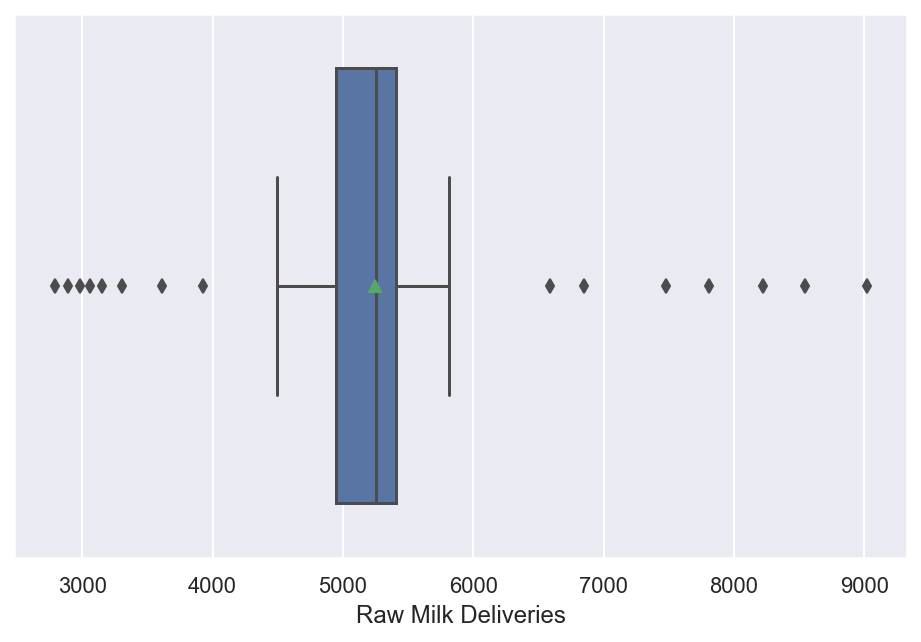

In [248]:
#Boxplot Raw Milk Deliveries Ireland
sns.boxplot(x=df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'],showmeans=True) 

<AxesSubplot:xlabel='Milk'>

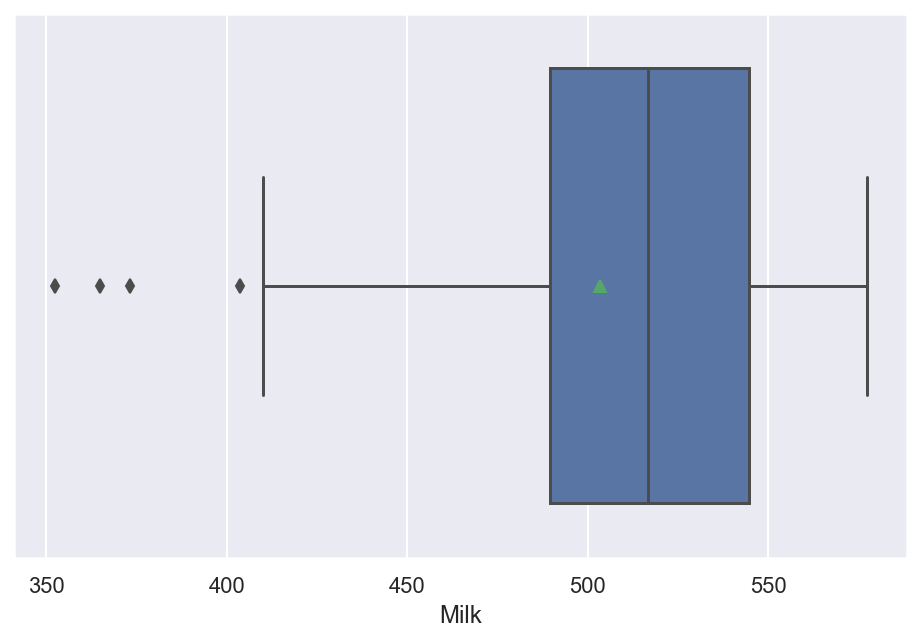

In [249]:
#Boxplot Milk  produced Ireland
sns.boxplot(x=df_MilkCollected_Annual_Ireland['Milk'],showmeans=True) 

<AxesSubplot:xlabel='Cream'>

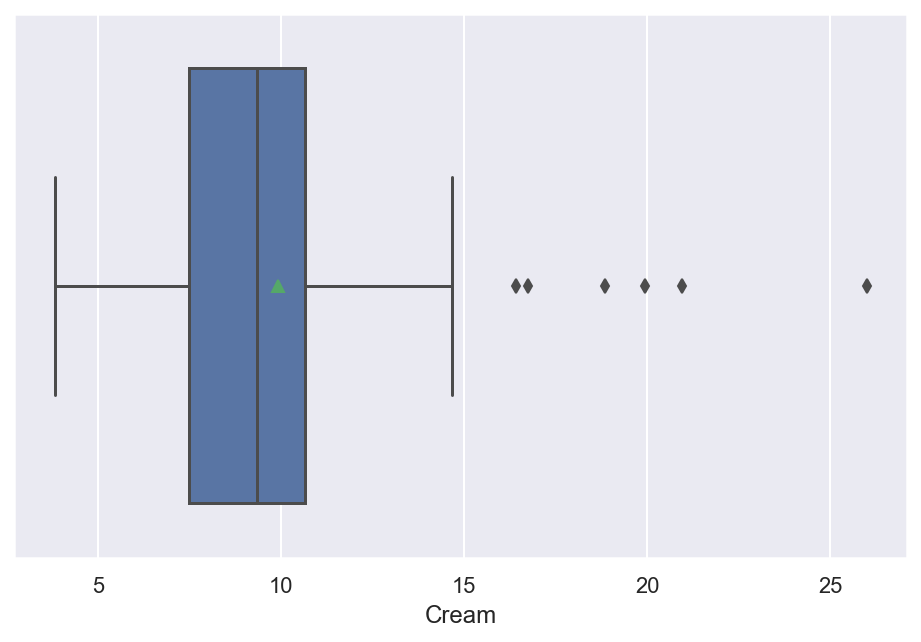

In [250]:
#Boxplot Cream produced Ireland
sns.boxplot(x=df_MilkCollected_Annual_Ireland['Cream'],showmeans=True) 

<AxesSubplot:xlabel='Butter'>

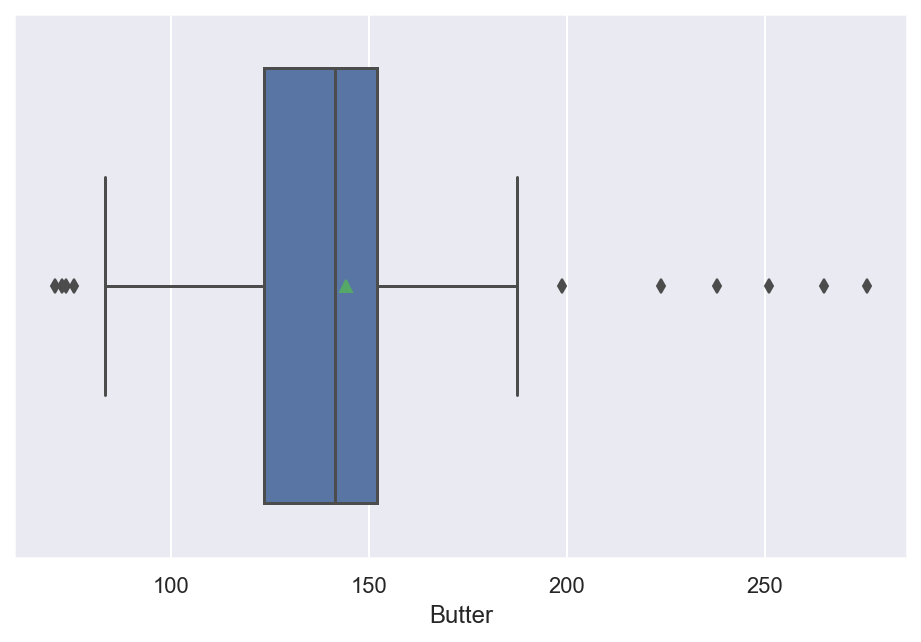

In [251]:
#Boxplot Butter produced Ireland
sns.boxplot(x=df_MilkCollected_Annual_Ireland['Butter'],showmeans=True) 

<AxesSubplot:xlabel='Cream'>

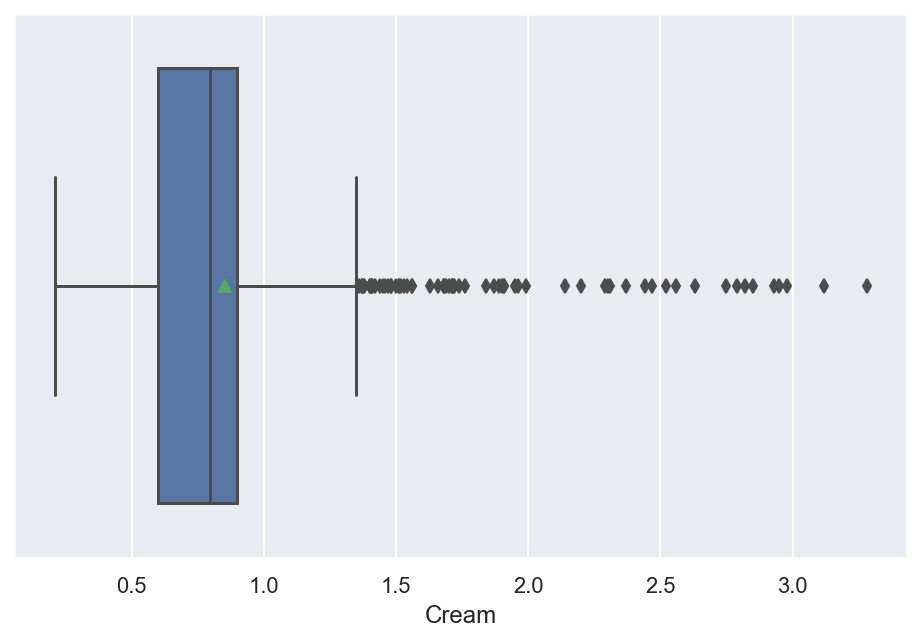

In [252]:
#Boxplot Butter produced Ireland Monthly
sns.boxplot(x=df_MilkCollected_Monthly_Ireland['Cream'],showmeans=True) 

<AxesSubplot:xlabel='Raw Milk Deliveries'>

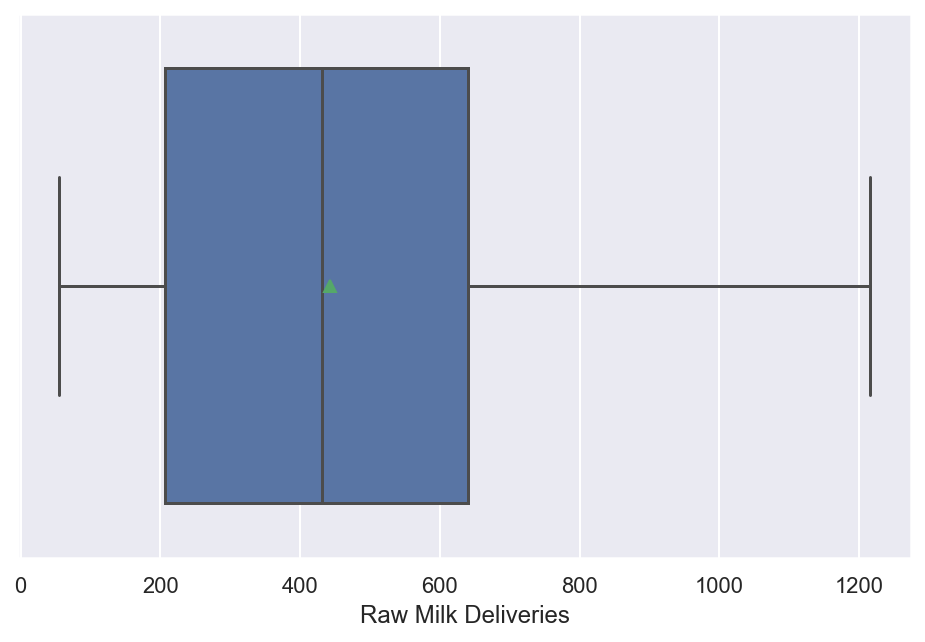

In [253]:
#Boxplot Butter produced Ireland Monthly
sns.boxplot(x=df_MilkCollected_Monthly_Ireland['Raw Milk Deliveries'],showmeans=True) 

Year  Raw Milk Deliveries      Milk     Cream  \
Year                 1.000000             0.818833  0.703861  0.847289   
Raw Milk Deliveries  0.818833             1.000000  0.681050  0.911173   
Milk                 0.703861             0.681050  1.000000  0.532384   
Cream                0.847289             0.911173  0.532384  1.000000   
Butter               0.787330             0.987283  0.639956  0.914487   

                       Butter  
Year                 0.787330  
Raw Milk Deliveries  0.987283  
Milk                 0.639956  
Cream                0.914487  
Butter               1.000000

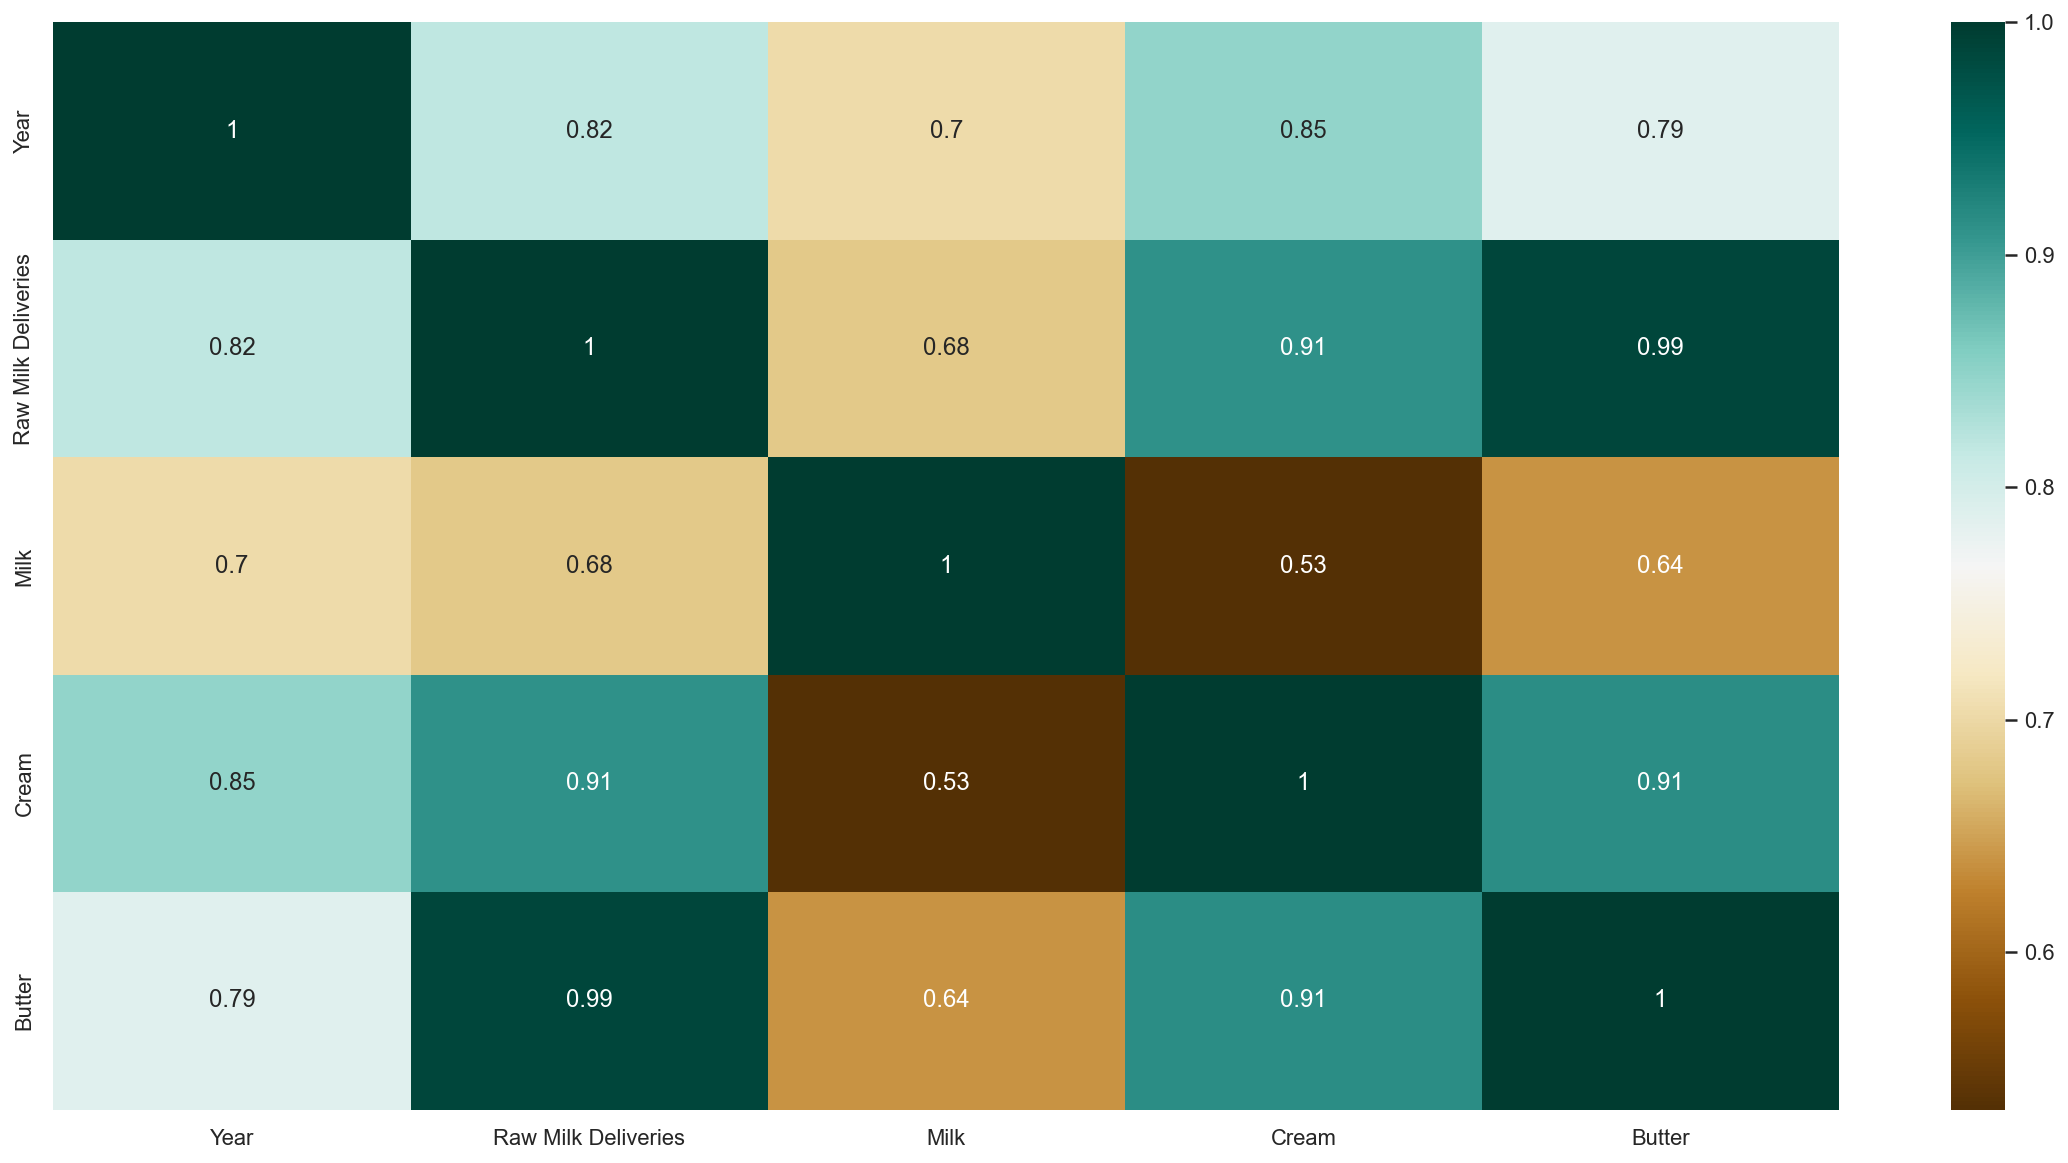

In [254]:
#Create heatmap for Irish Annual data
plt.figure(figsize=(20,10))
c= df_MilkCollected_Annual_Ireland.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c 

Year  Raw Milk Deliveries      Milk     Cream  \
Year                 1.000000             0.284081  0.439958  0.717286   
Raw Milk Deliveries  0.284081             1.000000  0.289904  0.379508   
Milk                 0.439958             0.289904  1.000000  0.315980   
Cream                0.717286             0.379508  0.315980  1.000000   
Butter               0.346874             0.975549  0.327548  0.463667   
Month               -0.009008            -0.052826  0.061684  0.169597   
Milk Selling Price   0.801405             0.119694  0.353159  0.712071   

                       Butter     Month  Milk Selling Price  
Year                 0.346874 -0.009008            0.801405  
Raw Milk Deliveries  0.975549 -0.052826            0.119694  
Milk                 0.327548  0.061684            0.353159  
Cream                0.463667  0.169597            0.712071  
Butter               1.000000  0.001135            0.192004  
Month                0.001135  1.000000            0.145799  
Milk Selling Price   0.192004  0.145799            1.000000

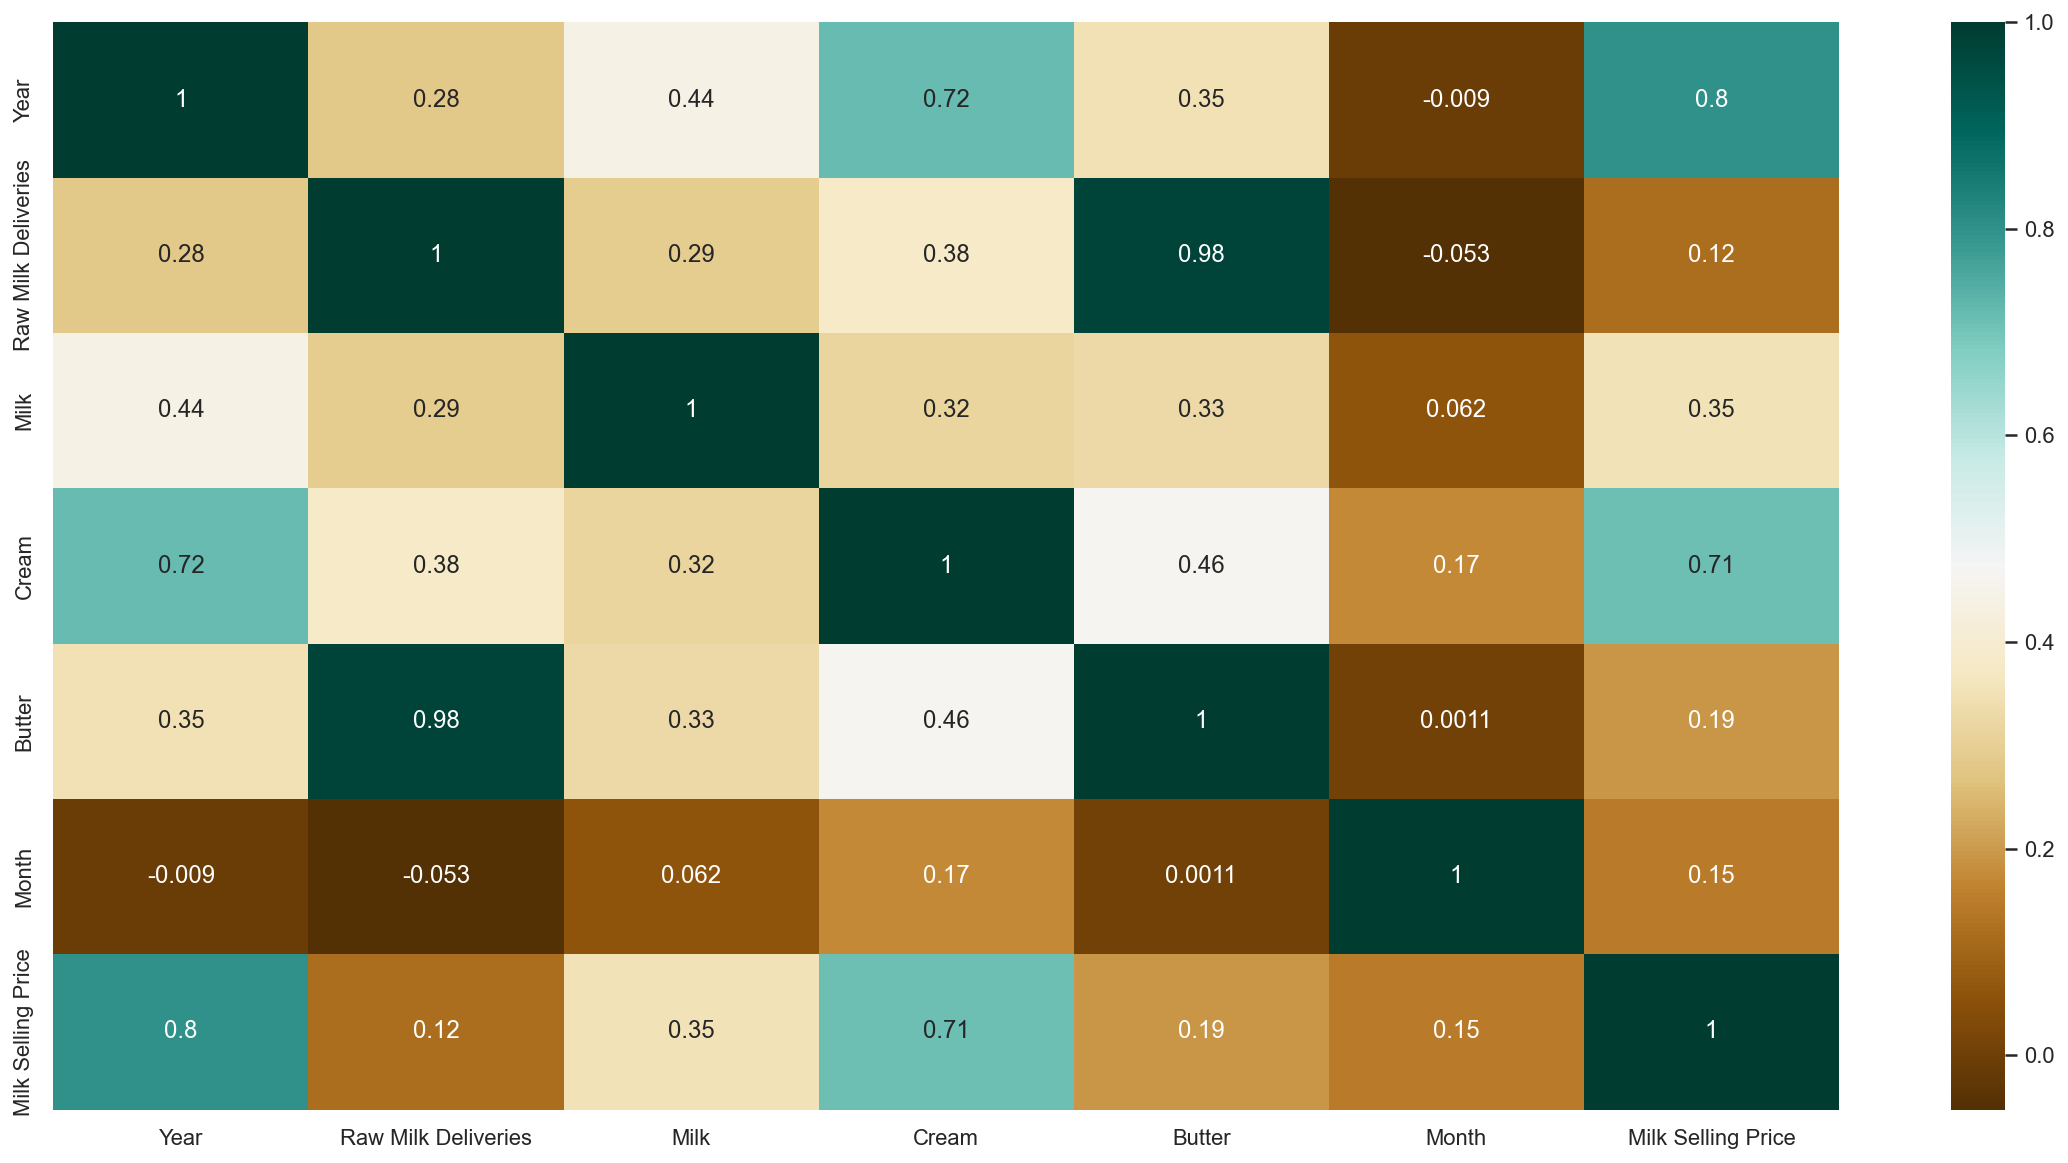

In [255]:
#Create heatmap for Irish Annual data
plt.figure(figsize=(20,10))
c= df_Milk_Monthly_Ireland_77.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c 

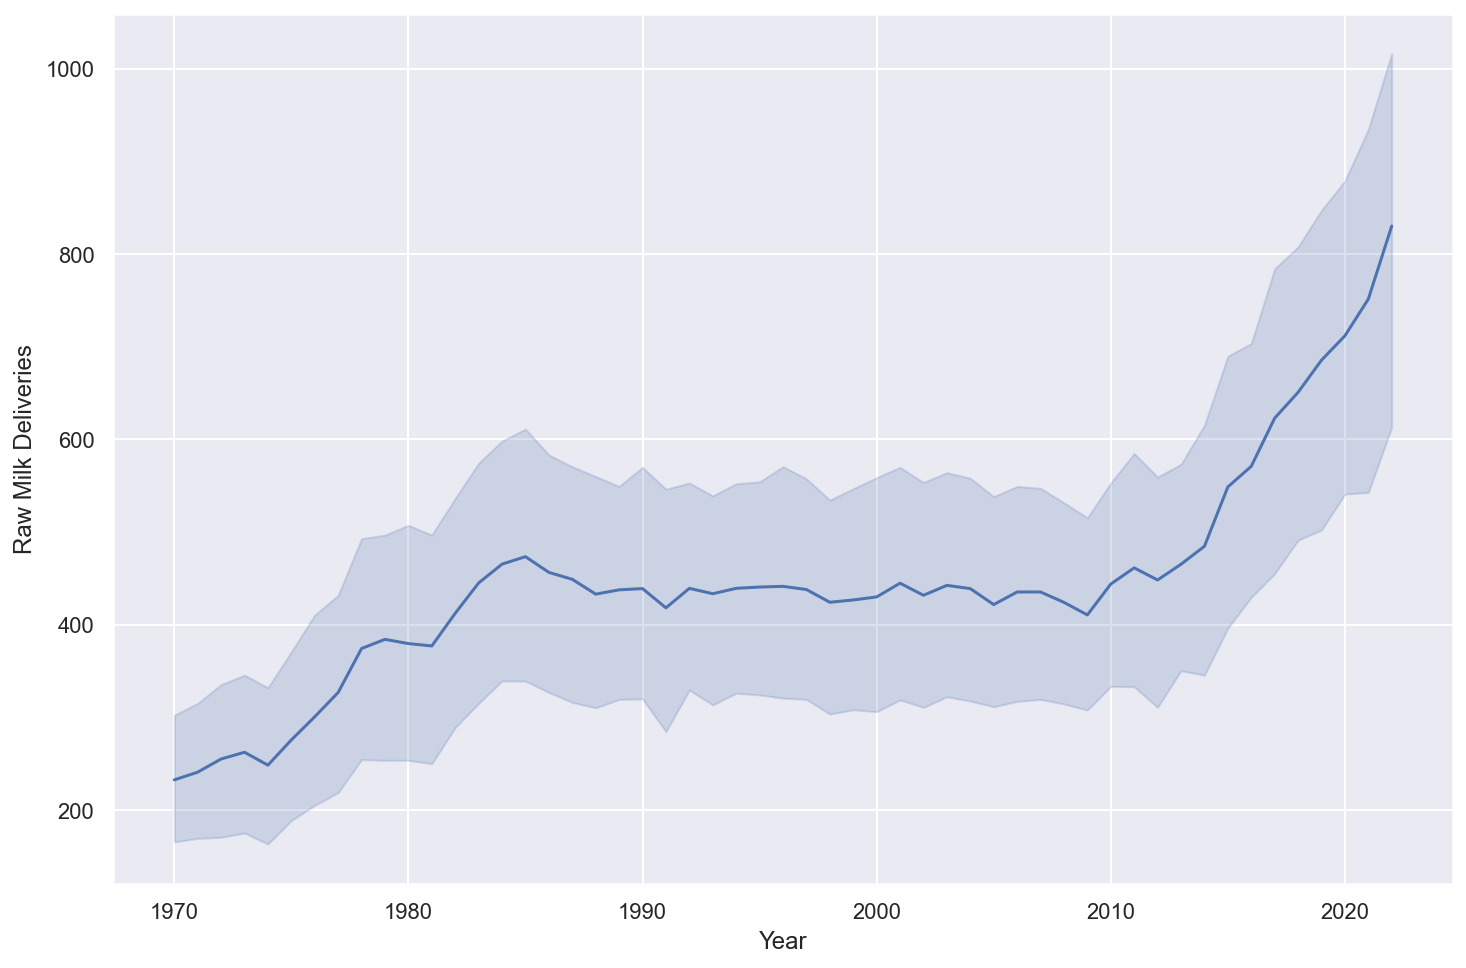

In [256]:
#Graph of Yearly Raw Milk Collected for Ireland

sns.set(rc = {'figure.figsize':(12,8)})
sns.set(font_scale=1)
myfig = sns.lineplot(x = 'Year', y = 'Raw Milk Deliveries', data = df_MilkCollected_Monthly_Ireland)
plt.show()

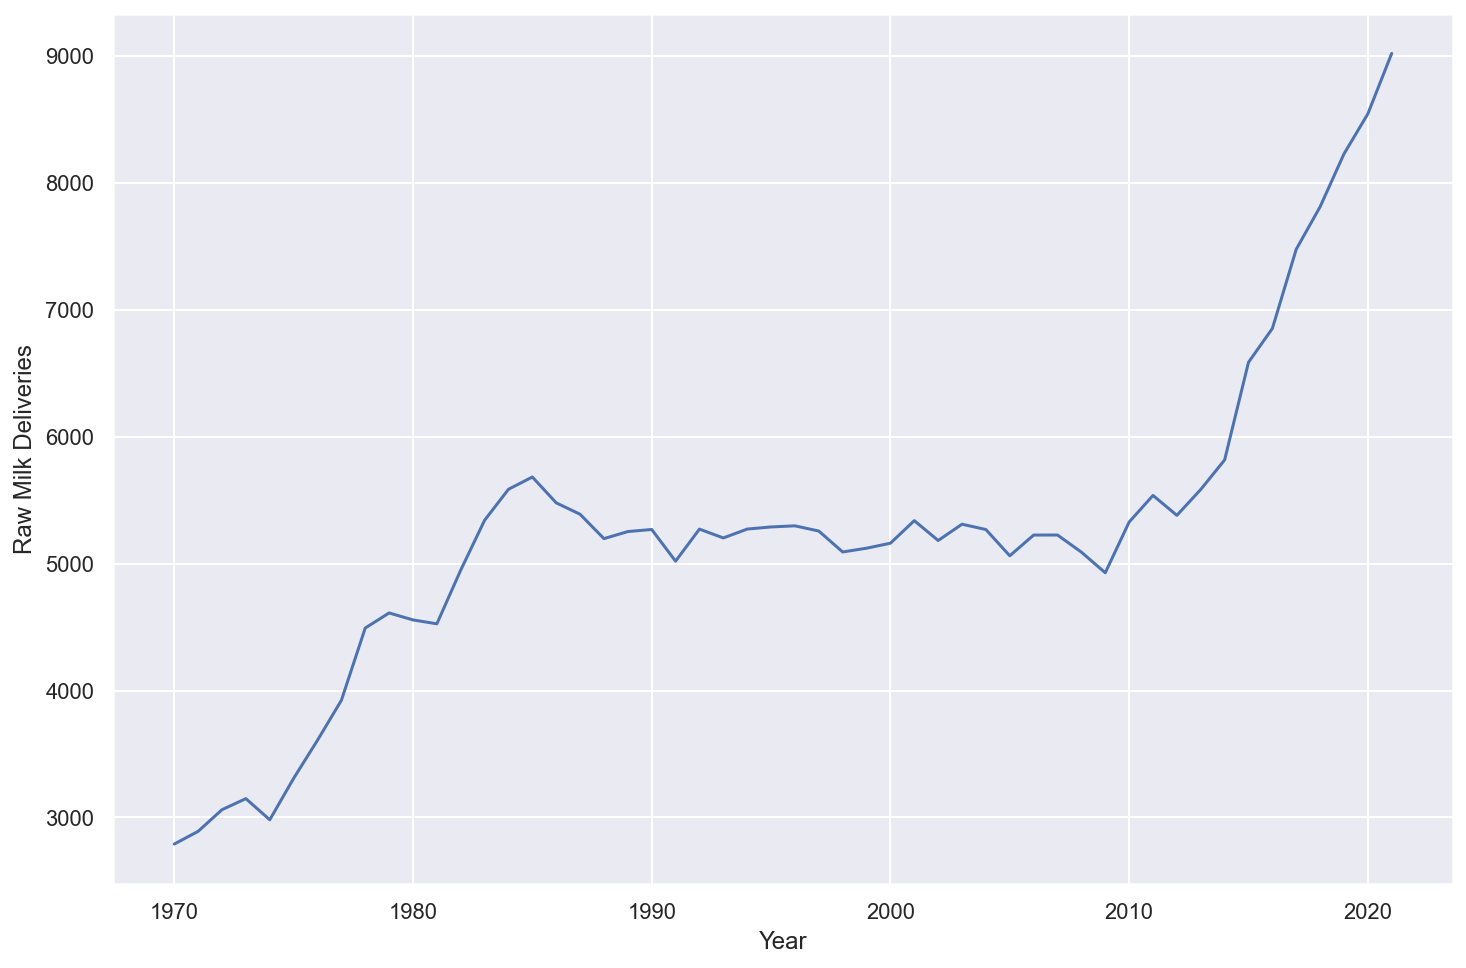

In [257]:
#Graph of Yearly Raw Milk Collected for Ireland

sns.set(rc = {'figure.figsize':(12,8)})
sns.set(font_scale=1)
myfig = sns.lineplot(x = 'Year', y = 'Raw Milk Deliveries', data = df_MilkCollected_Annual_Ireland)
plt.show()

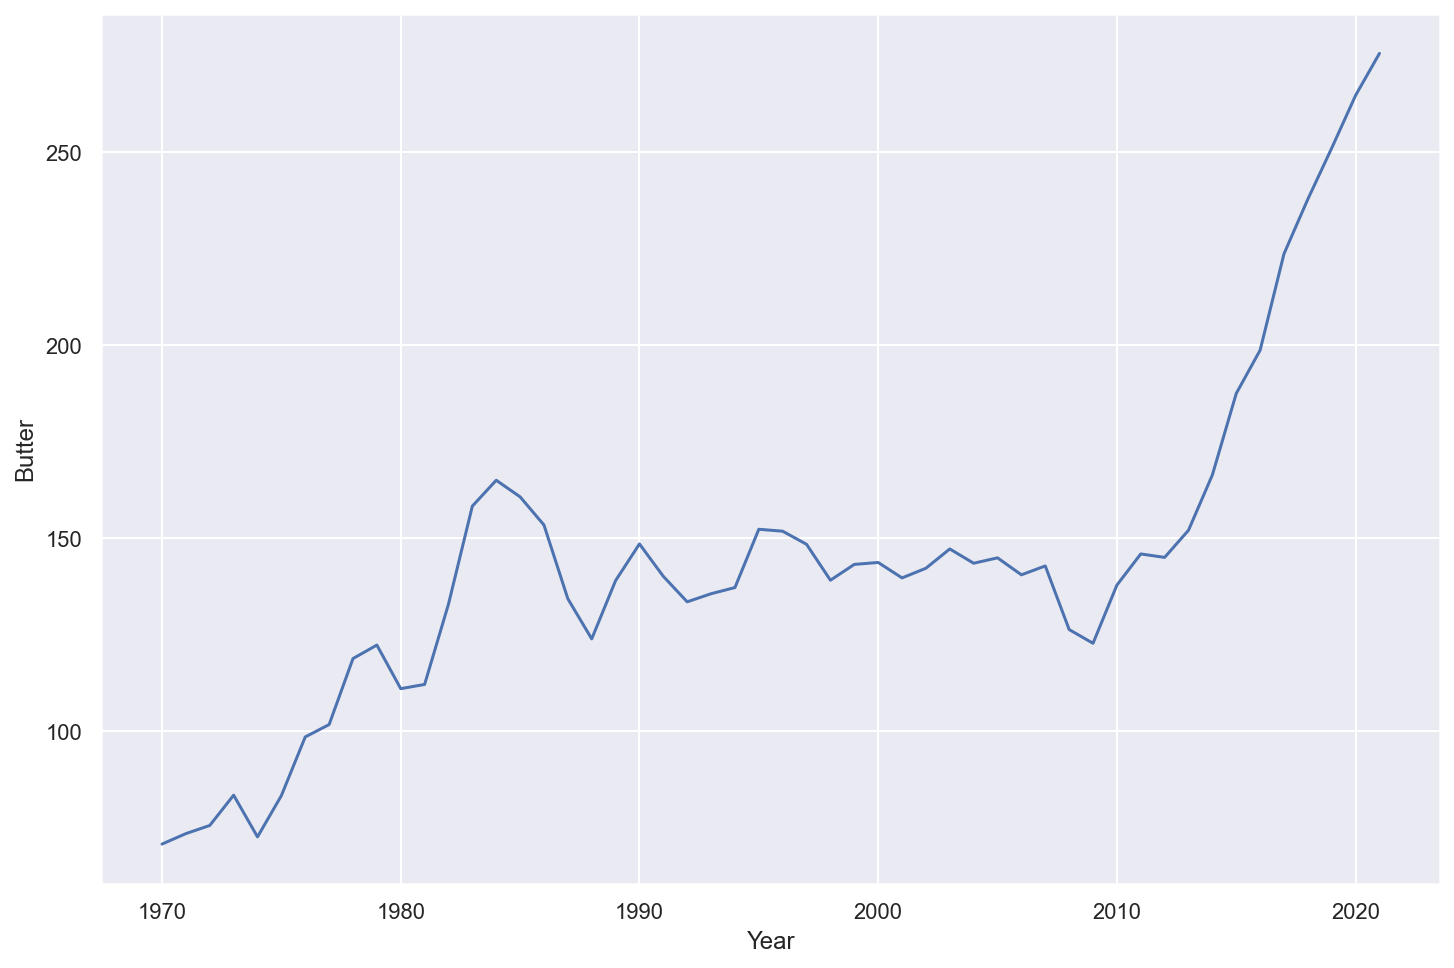

In [258]:
#Graph of Yearly Butter produced Ireland

sns.set(rc = {'figure.figsize':(12,8)})
sns.set(font_scale=1)
myfig = sns.lineplot(x = 'Year', y = 'Butter', data = df_MilkCollected_Annual_Ireland)
plt.show()

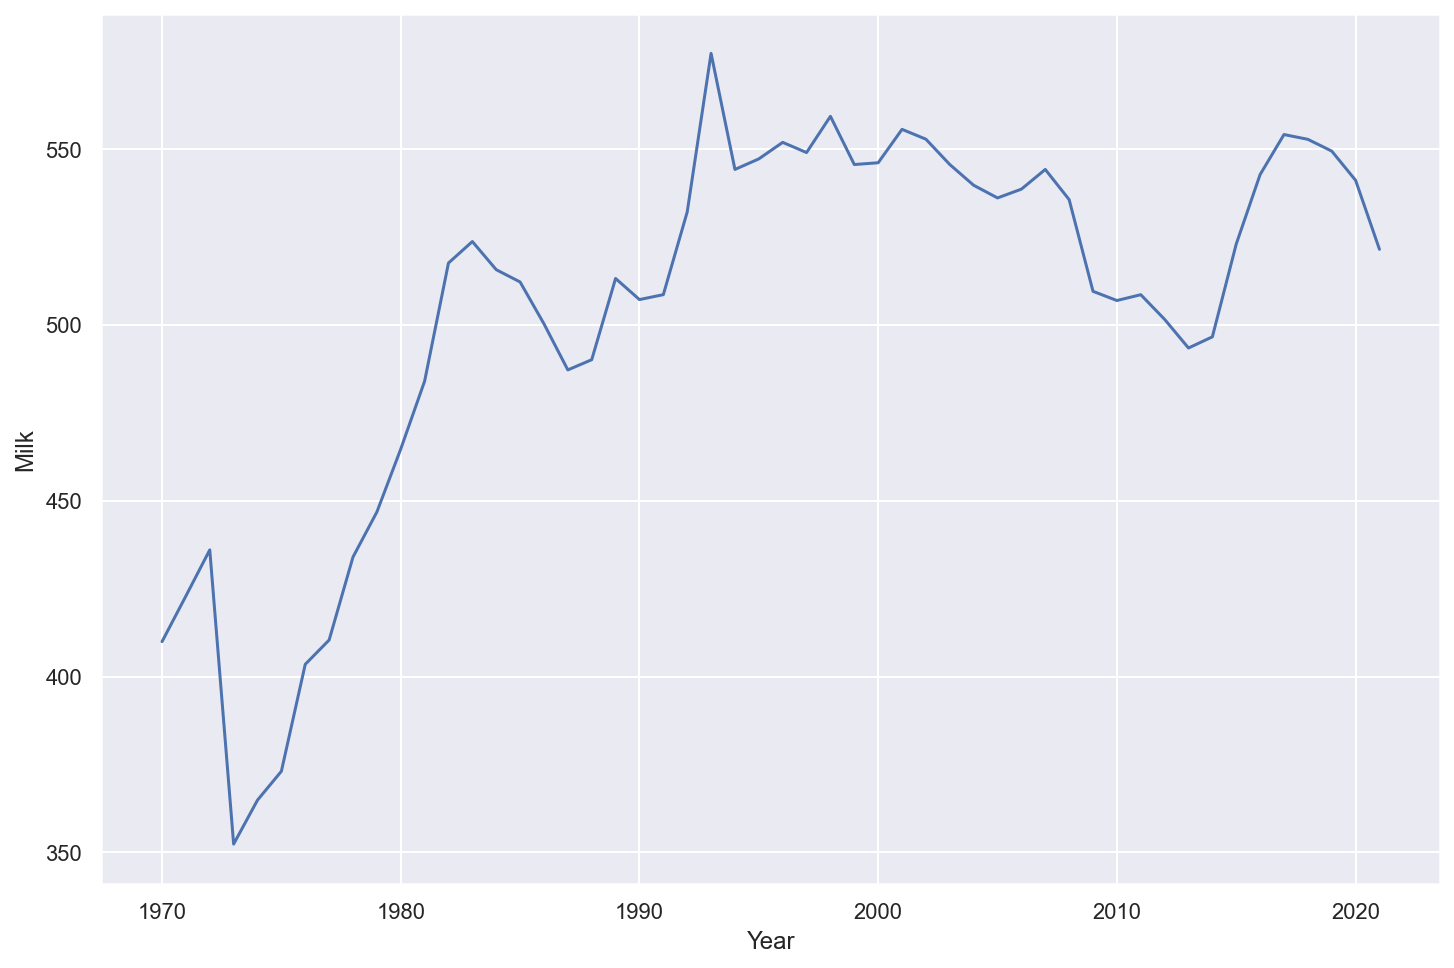

In [259]:
#Graph of Yearly Raw Milk Collected for Ireland

sns.set(rc = {'figure.figsize':(12,8)})
sns.set(font_scale=1)
myfig = sns.lineplot(x = 'Year', y = 'Milk', data = df_MilkCollected_Annual_Ireland)
plt.show()

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Thousand Tons')]

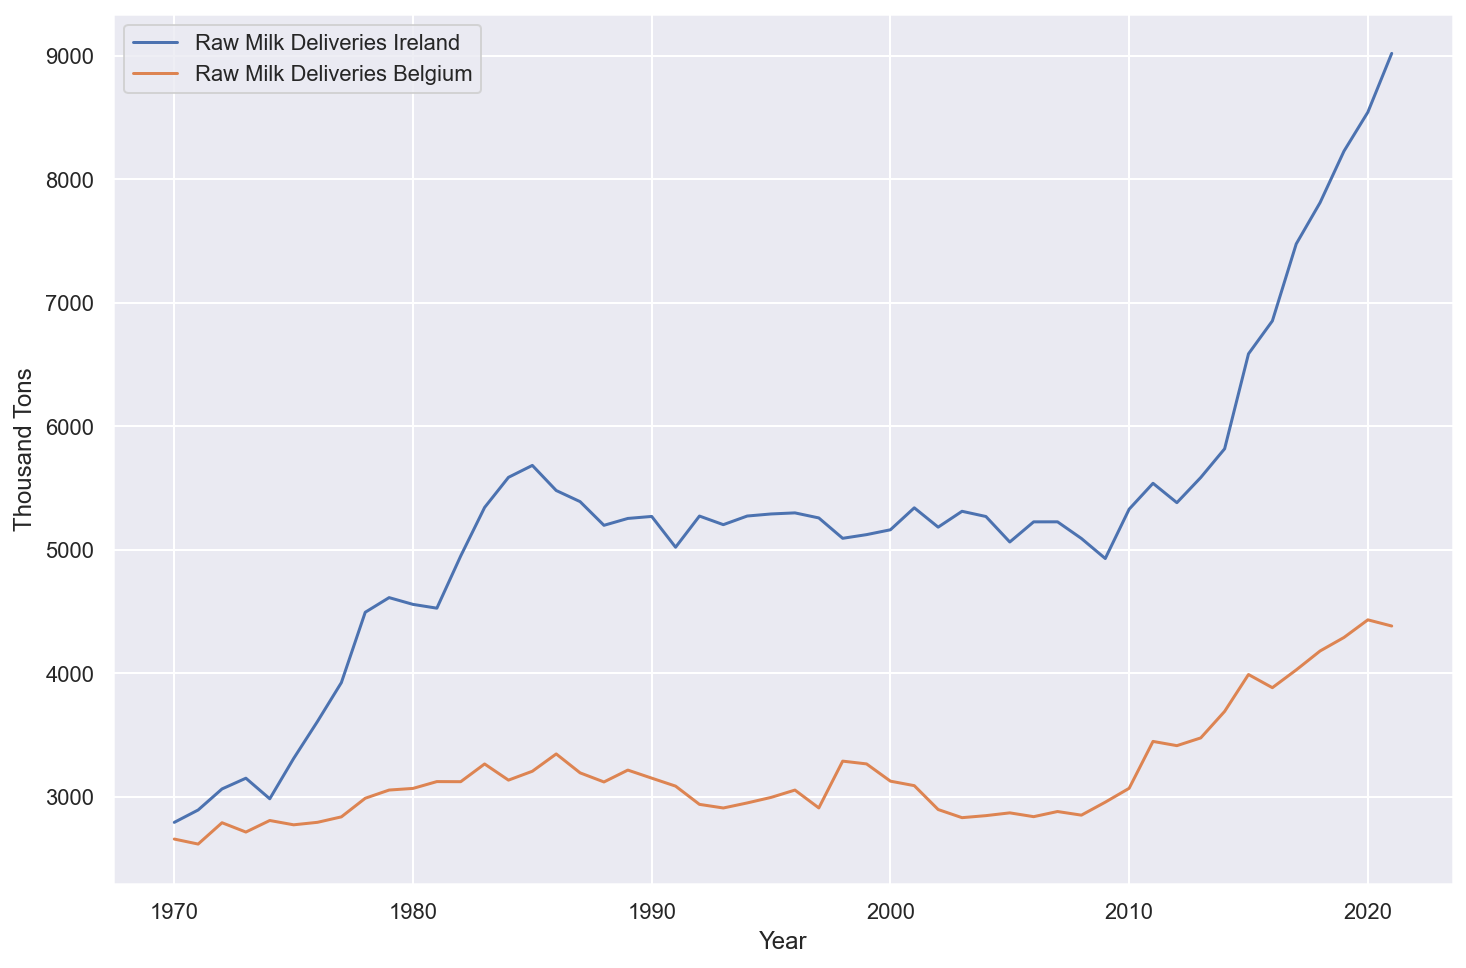

In [260]:
#Plot comparing Raw Milk deliveries Ireland vs Belgium

fig, ax = plt.subplots()
sns.set(font_scale=1)
sns.set(rc = {'figure.figsize':(10,8)})
ax= sns.lineplot(x='Year', y='Raw Milk Deliveries', label="Raw Milk Deliveries Ireland", data=df_MilkCollected_Annual_Ireland)
ax1 = sns.lineplot(x='Year', y='Raw Milk Deliveries', label="Raw Milk Deliveries Belgium", data=df_MilkCollected_Annual_Belgium)
ax.set( xlabel = "Year", ylabel = "Thousand Tons")

In [261]:
df_MilkCollected_Monthly_Ireland.head()

Country Geo Code  Year  Raw Milk Deliveries   Milk  Cream  Butter  \
5251  Ireland  IE  IRL  1970                63.74  33.86   0.21    1.01   
5252  Ireland  IE  IRL  1970                76.61  31.77   0.24    1.29   
5253  Ireland  IE  IRL  1970               149.14  34.43   0.32    3.04   
5254  Ireland  IE  IRL  1970               232.22  33.74   0.32    5.28   
5255  Ireland  IE  IRL  1970               366.30  35.30   0.41   10.03   

      Month       Date  
5251      1 1970-01-01  
5252      2 1970-02-01  
5253      3 1970-03-01  
5254      4 1970-04-01  
5255      5 1970-05-01

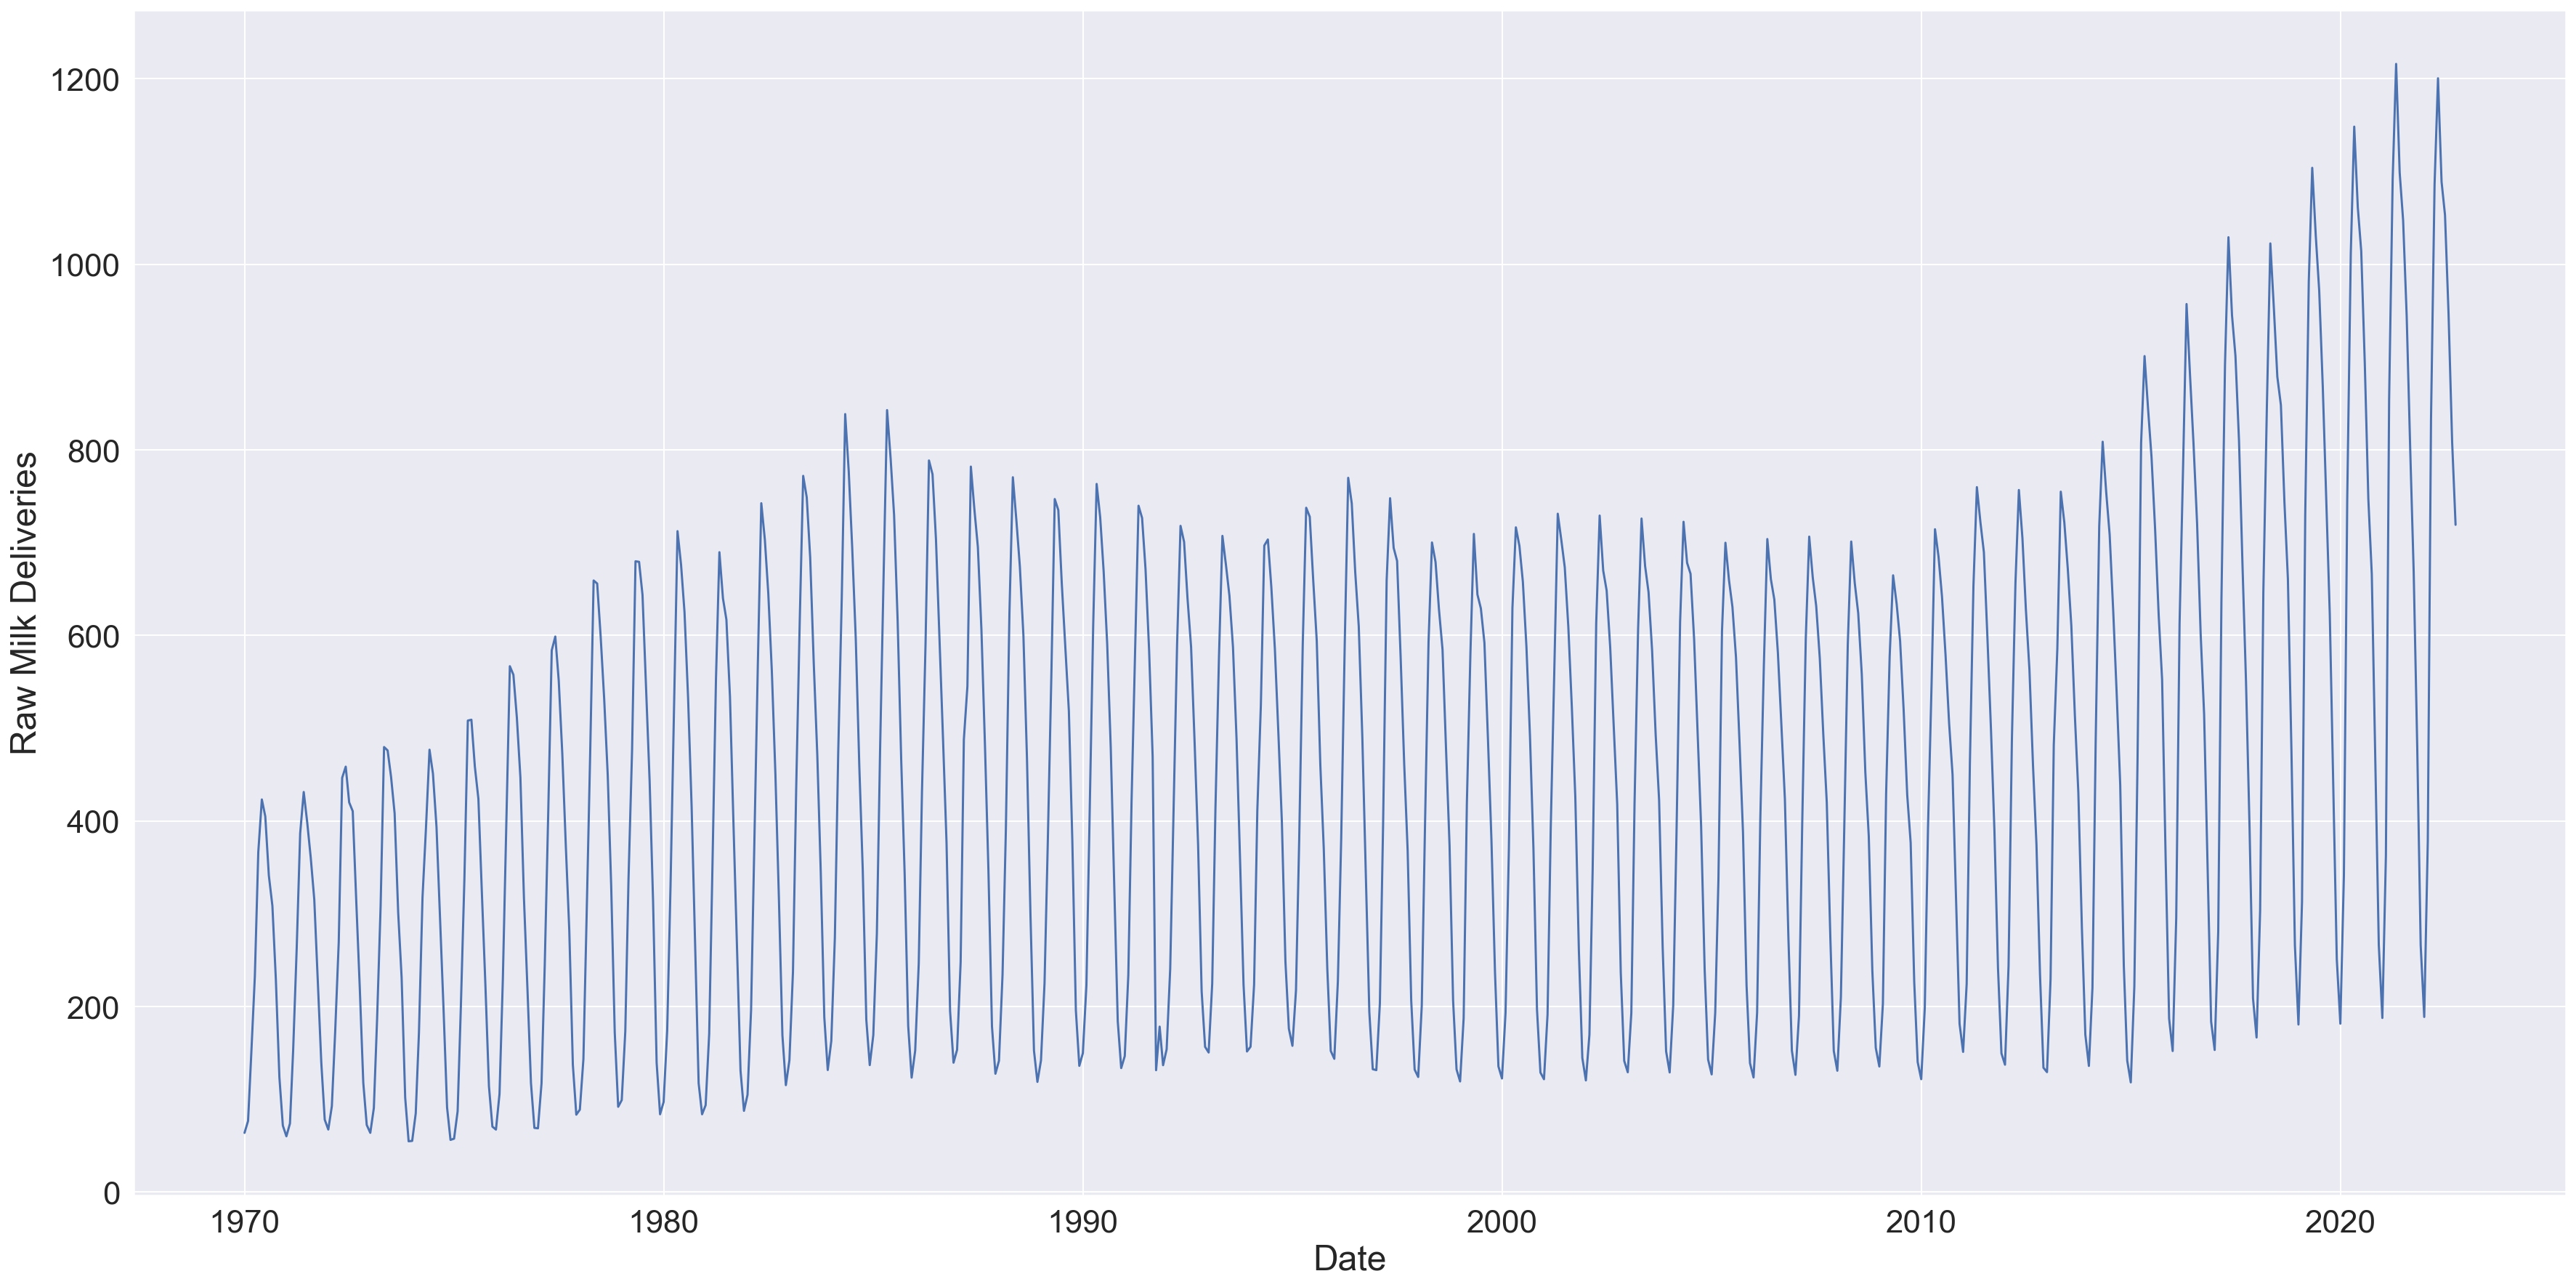

In [262]:
#Plot of Raw Milk collected monthly data Ireland

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Date', y = 'Raw Milk Deliveries', data = df_MilkCollected_Monthly_Ireland)
plt.show()

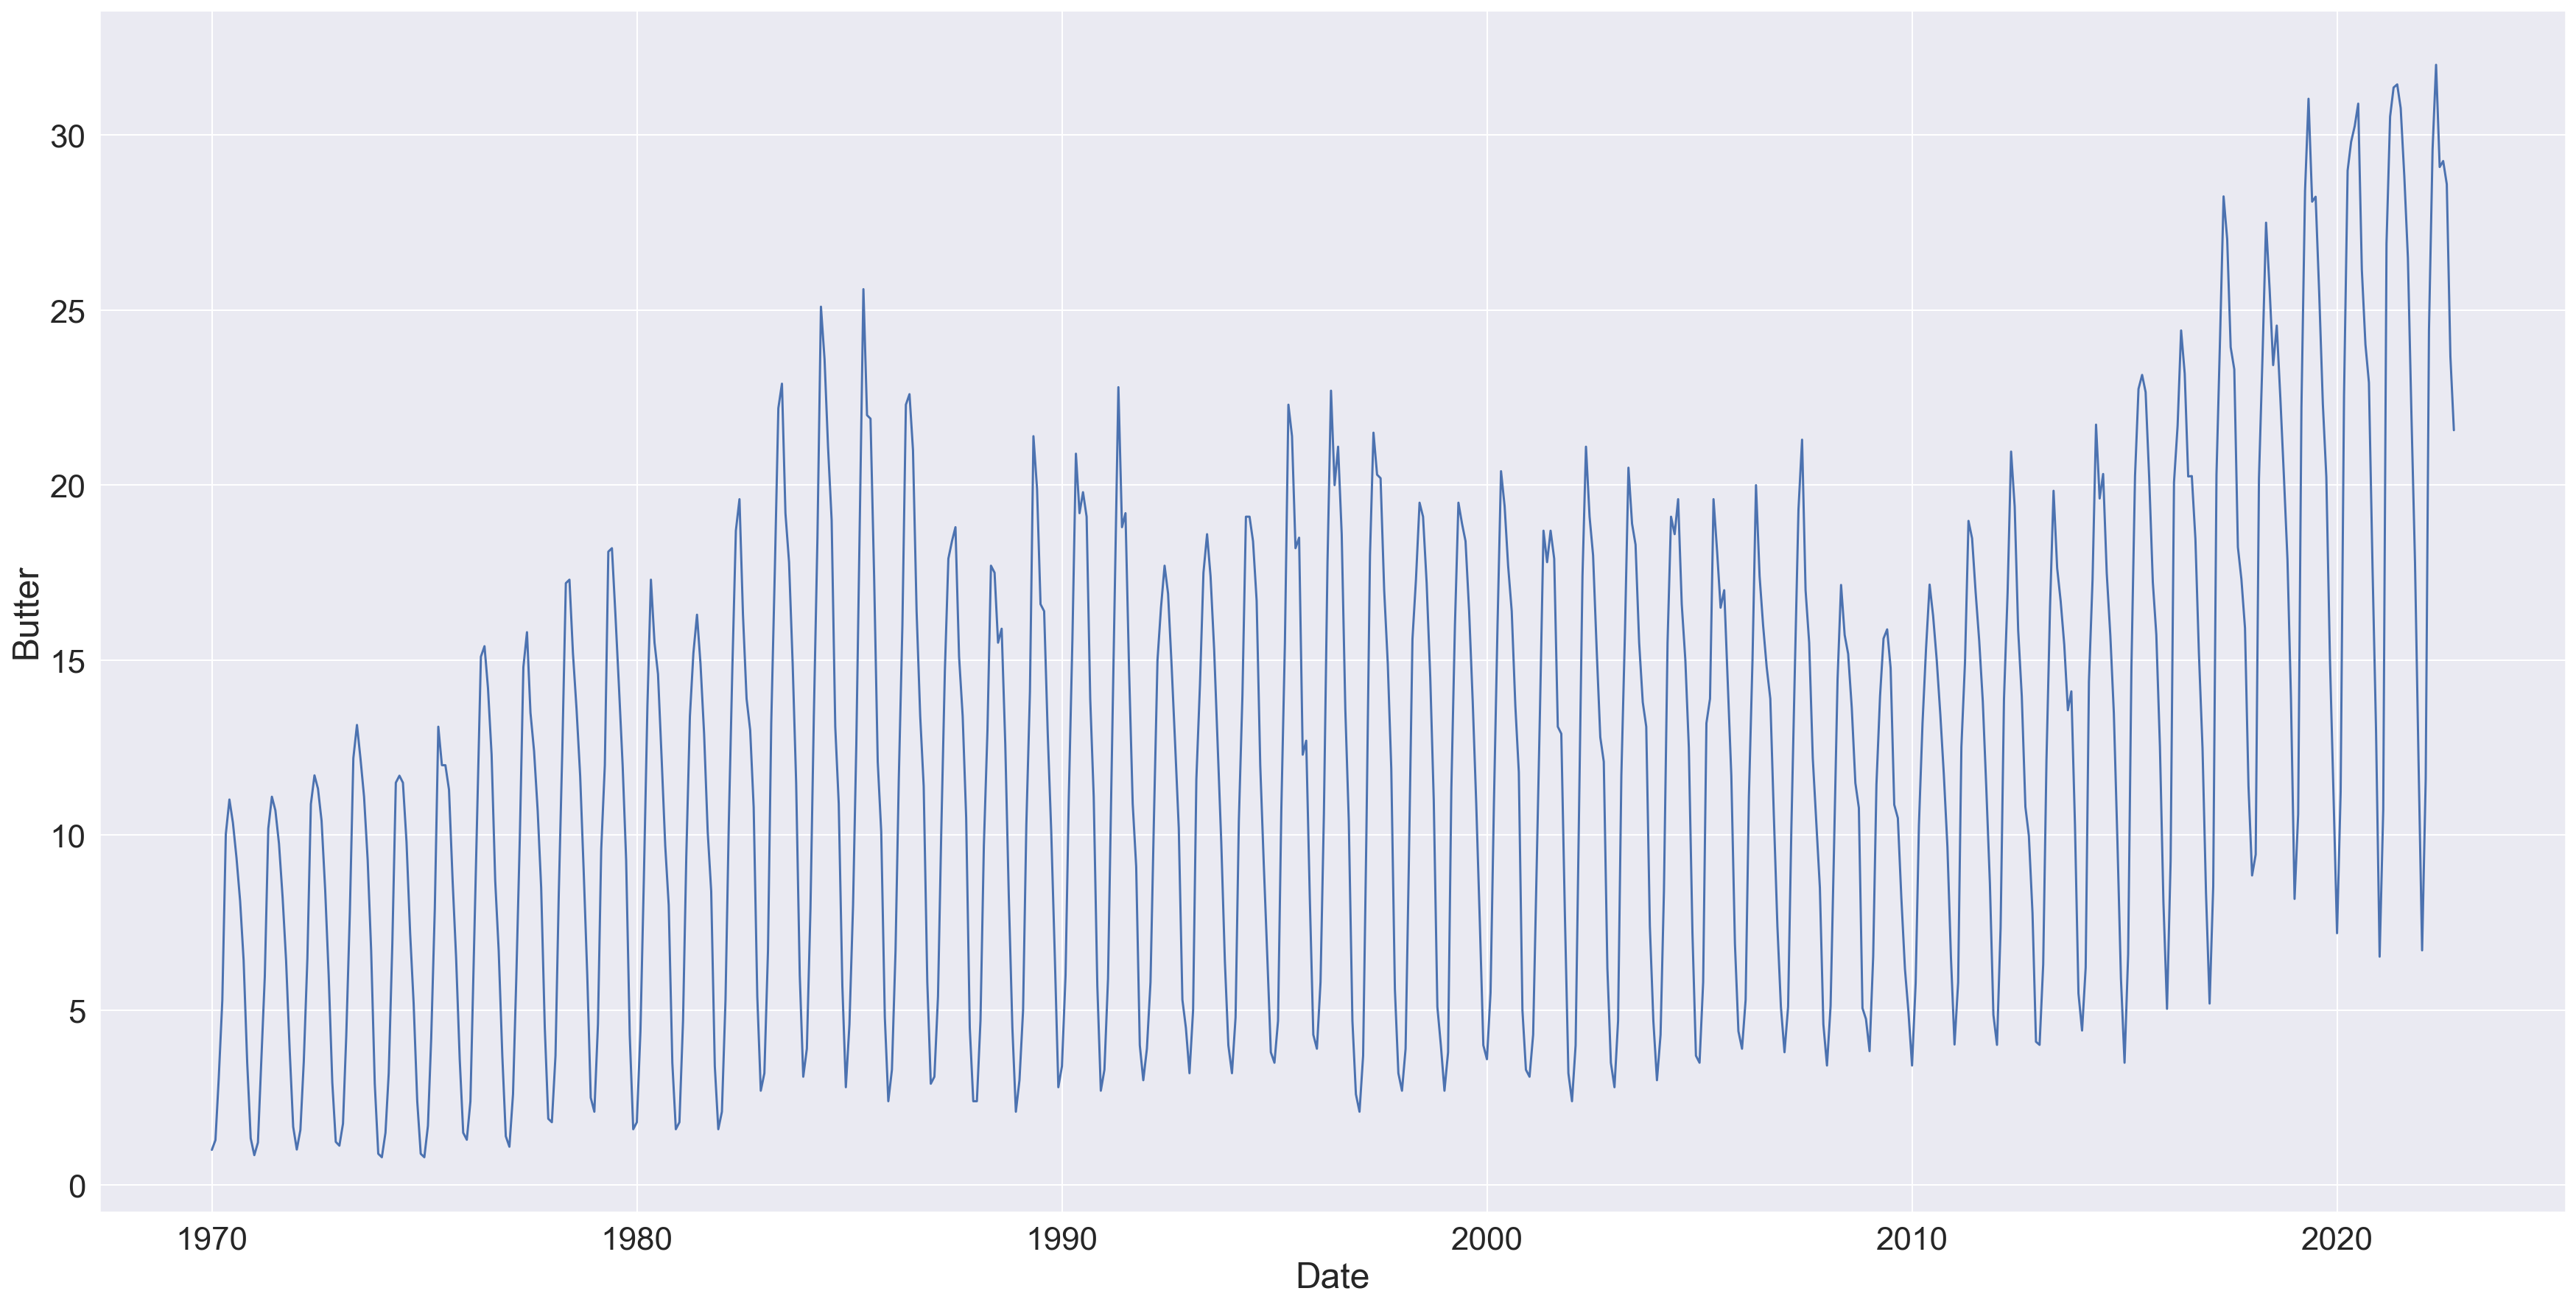

In [263]:
#Plot of Butter produced monthly data Ireland

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Date', y = 'Butter', data = df_MilkCollected_Monthly_Ireland)
plt.show()

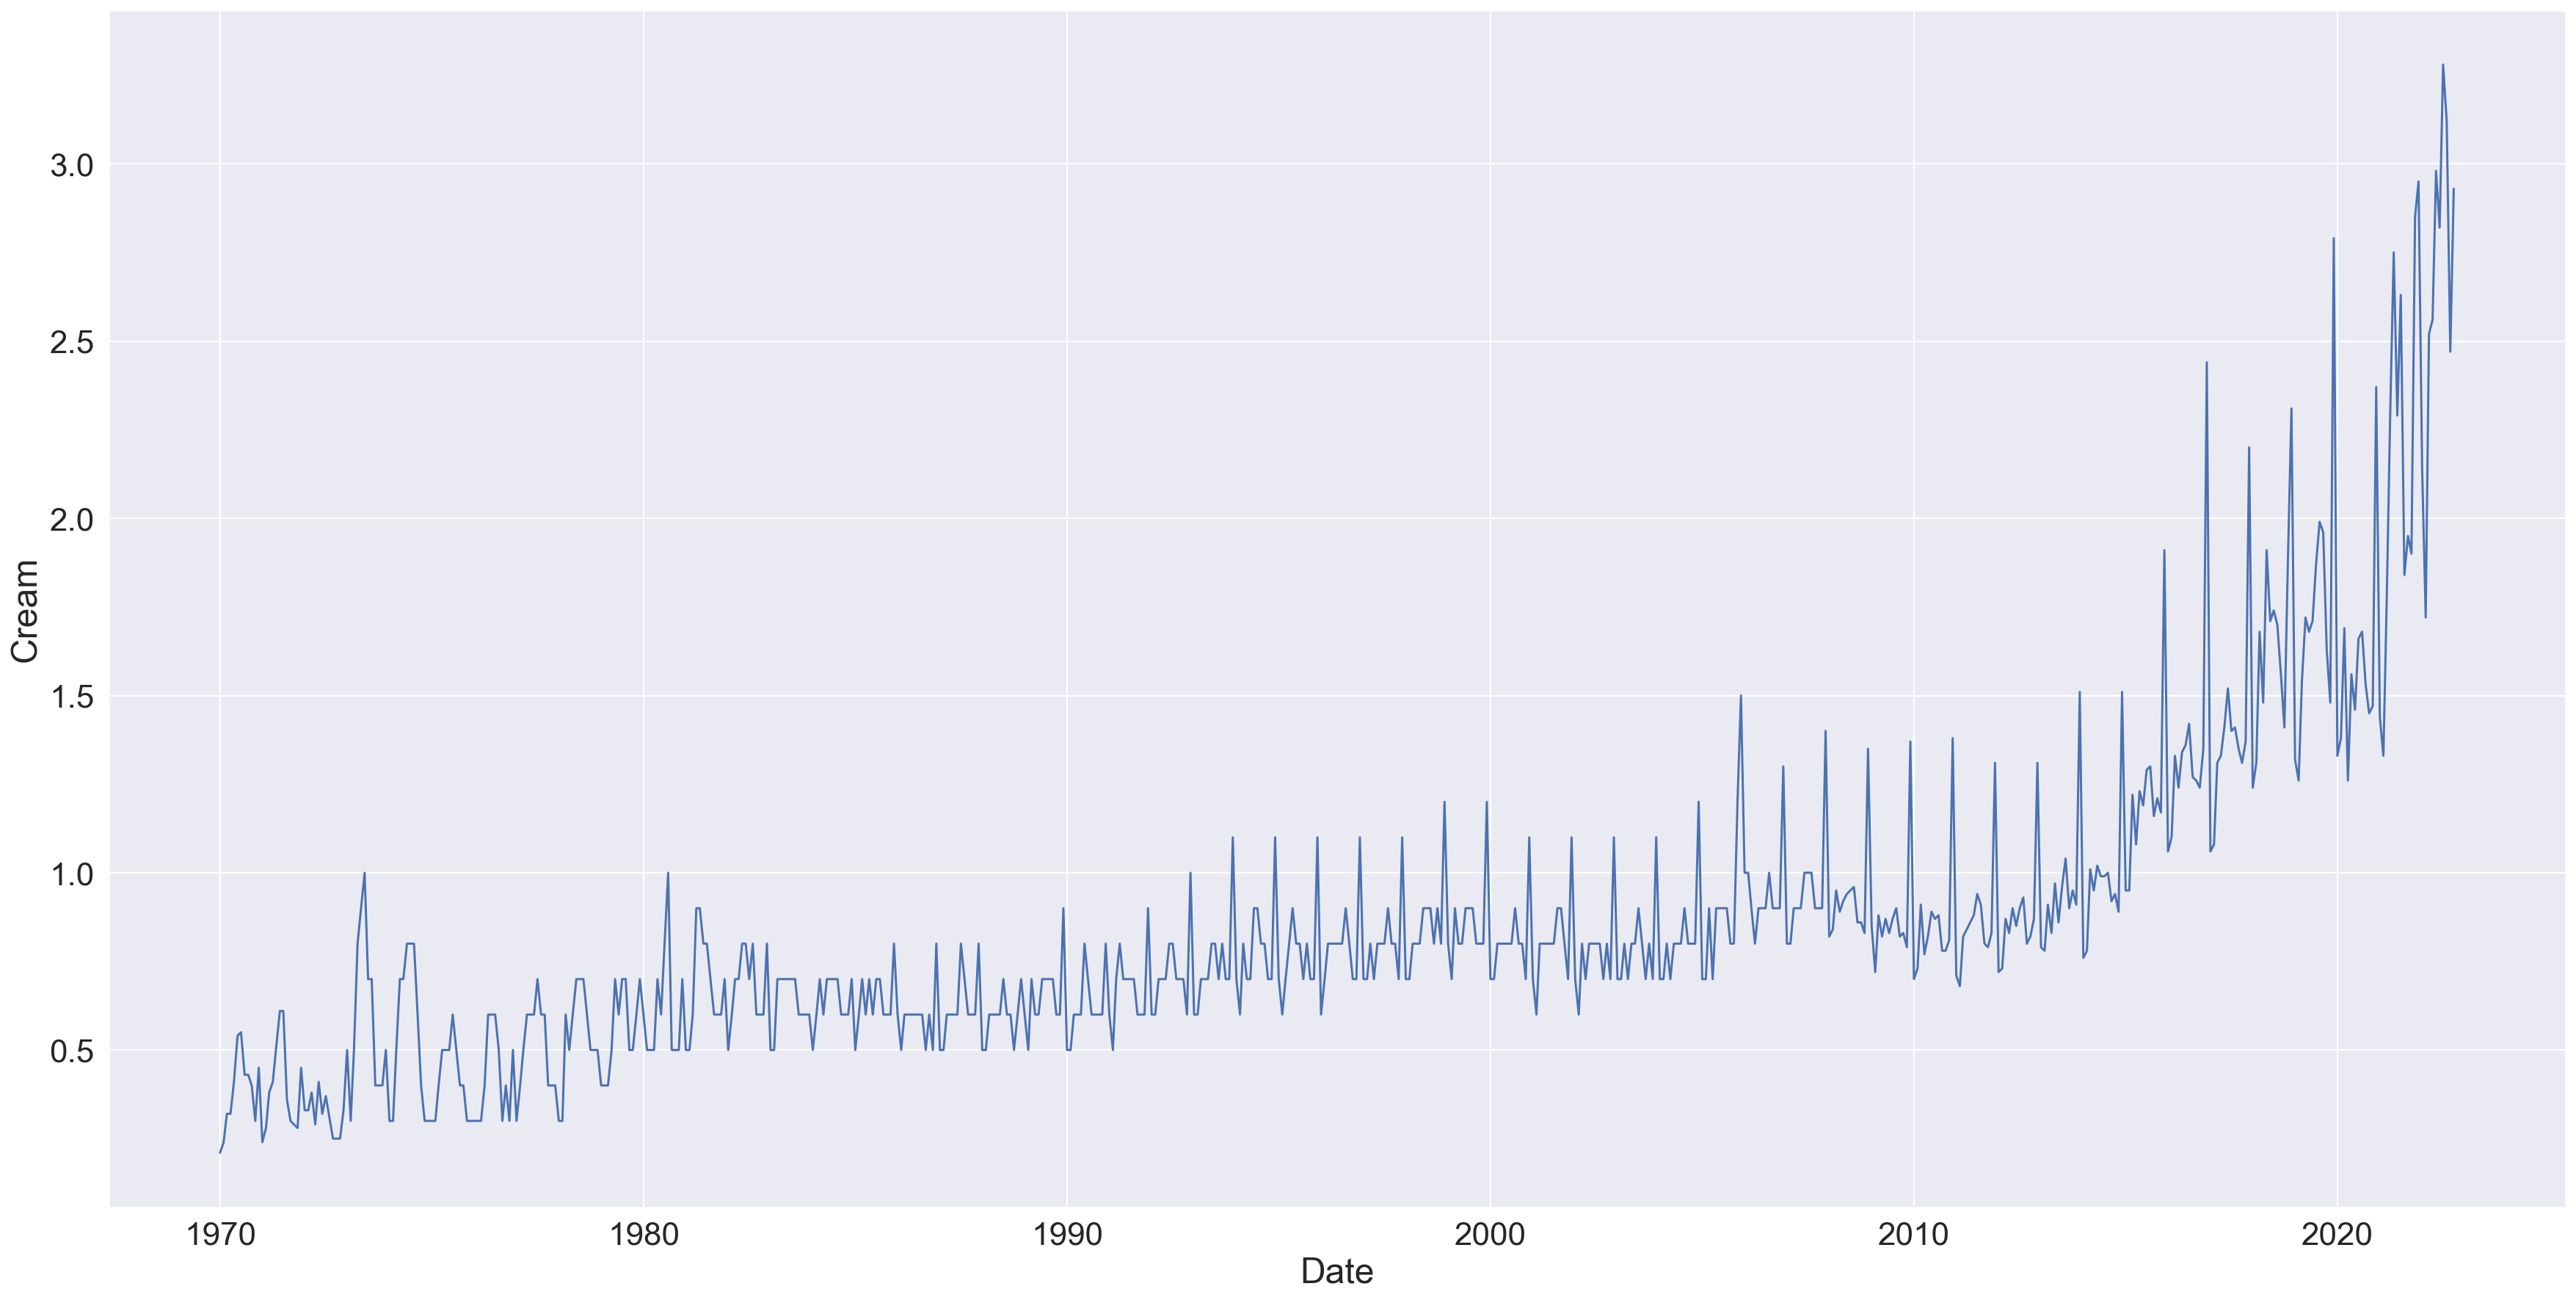

In [264]:
#Plot of Cream produced monthly data Ireland

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Date', y = 'Cream', data = df_MilkCollected_Monthly_Ireland)
plt.show()

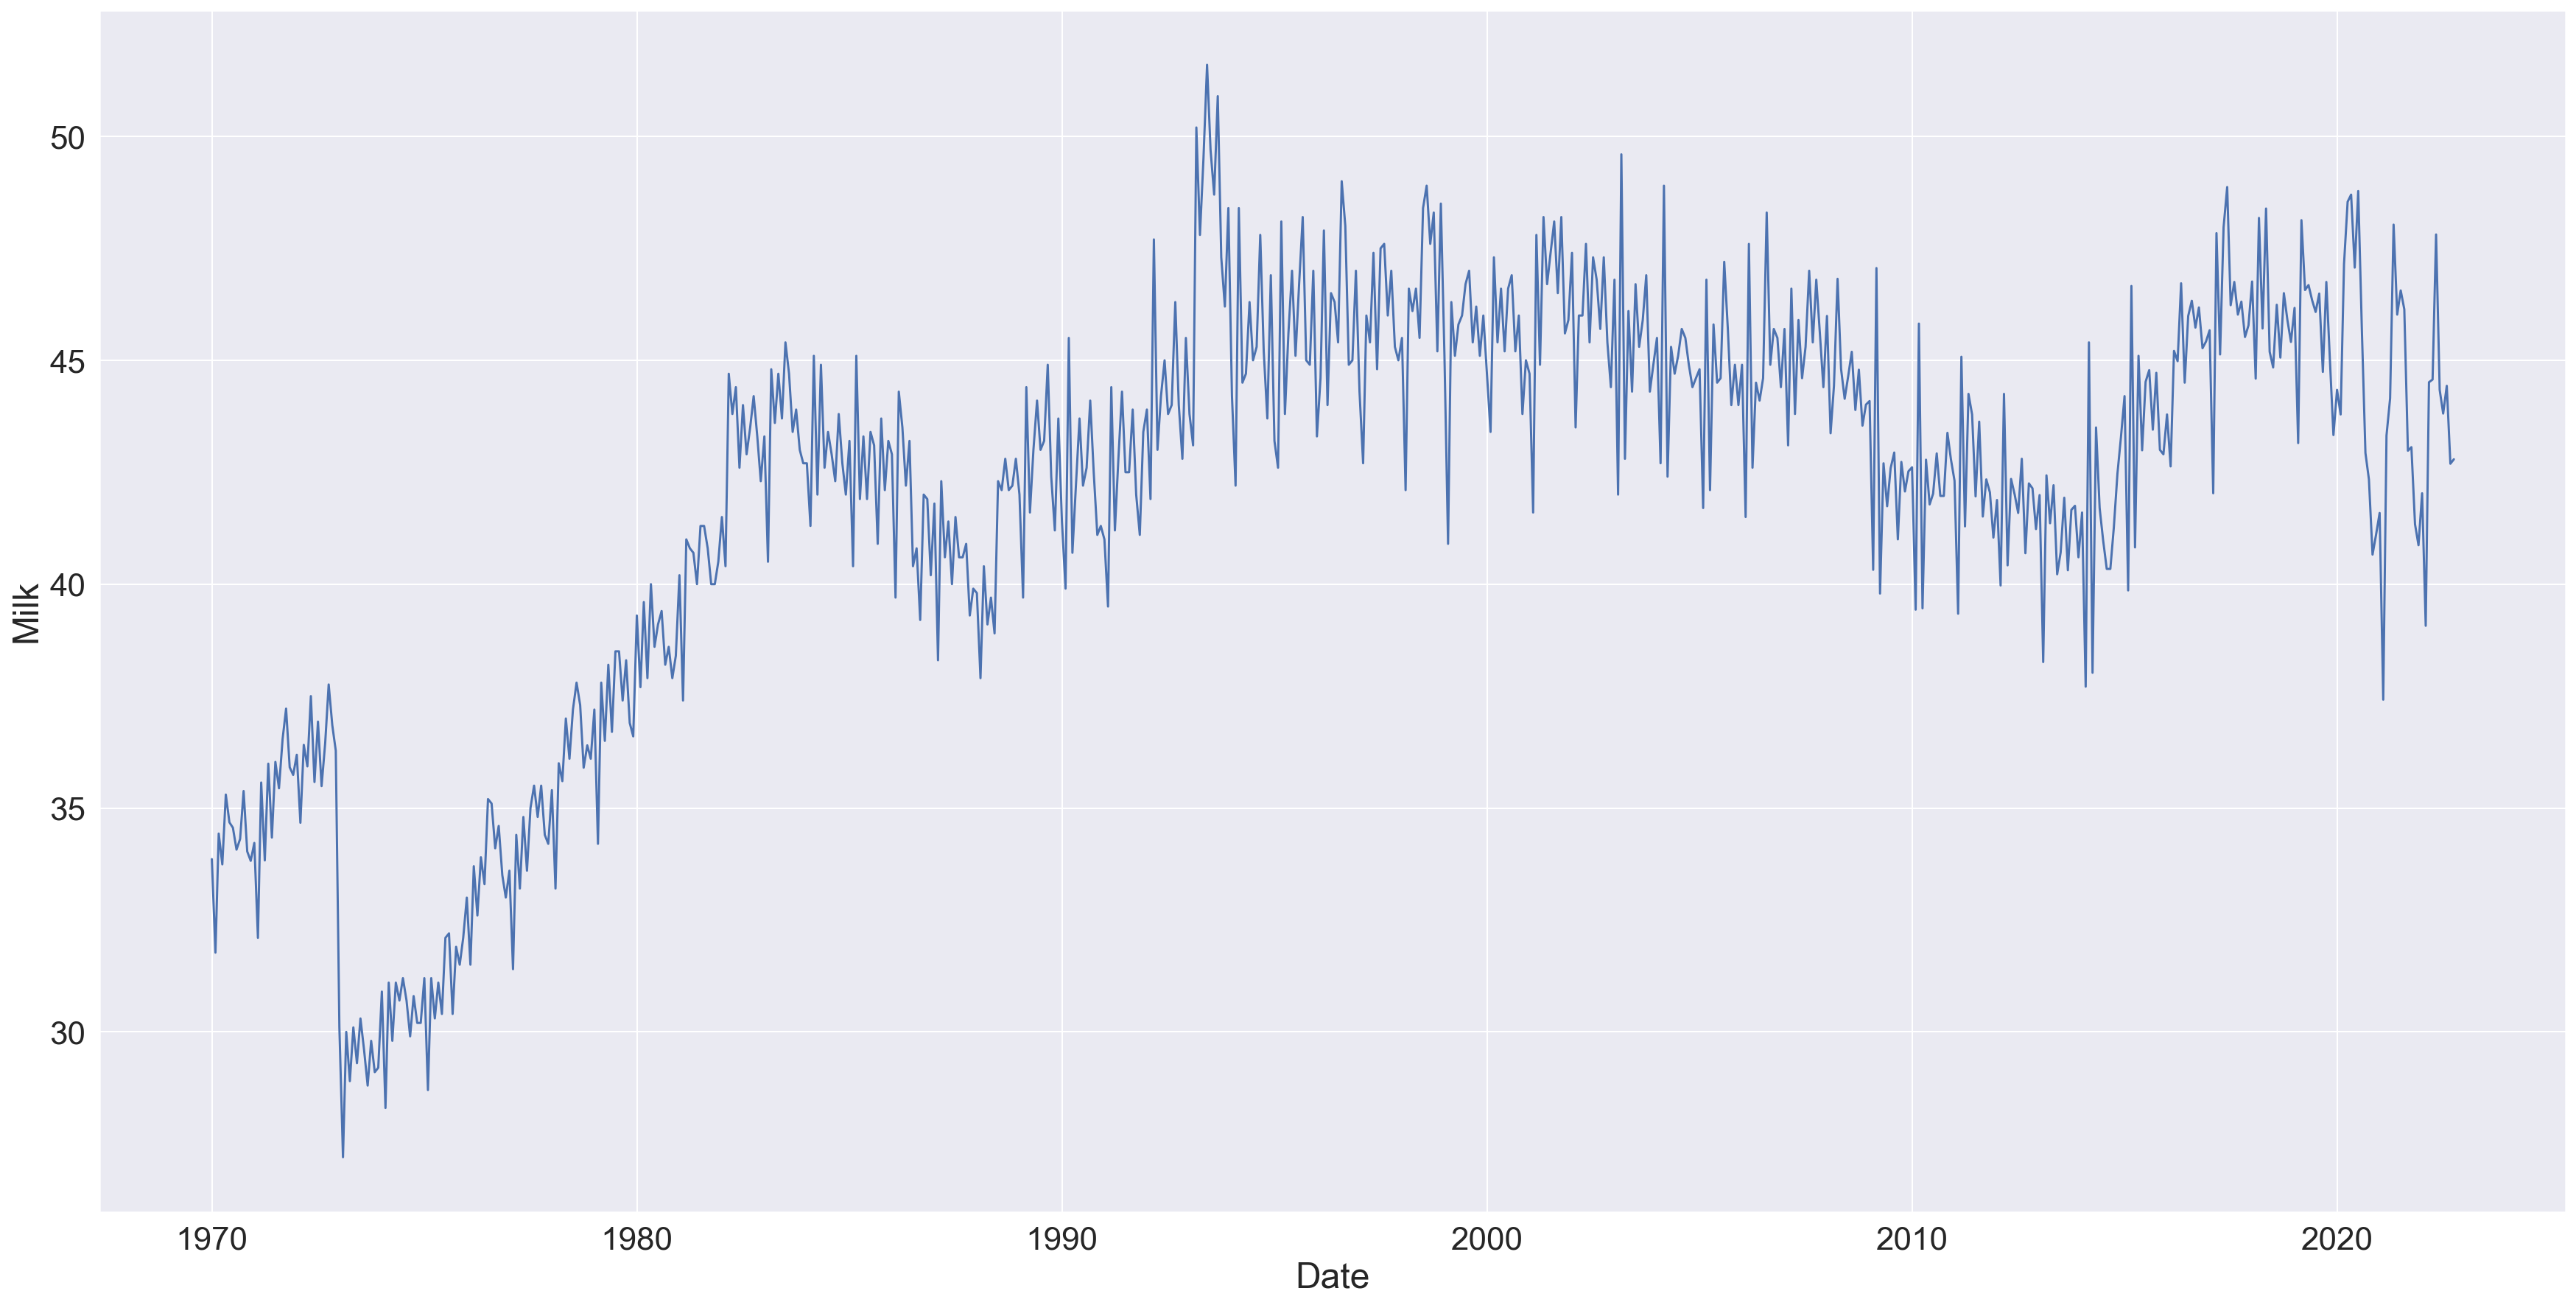

In [265]:
#Plot of Cream produced monthly data Ireland

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Date', y = 'Milk', data = df_MilkCollected_Monthly_Ireland)
plt.show()

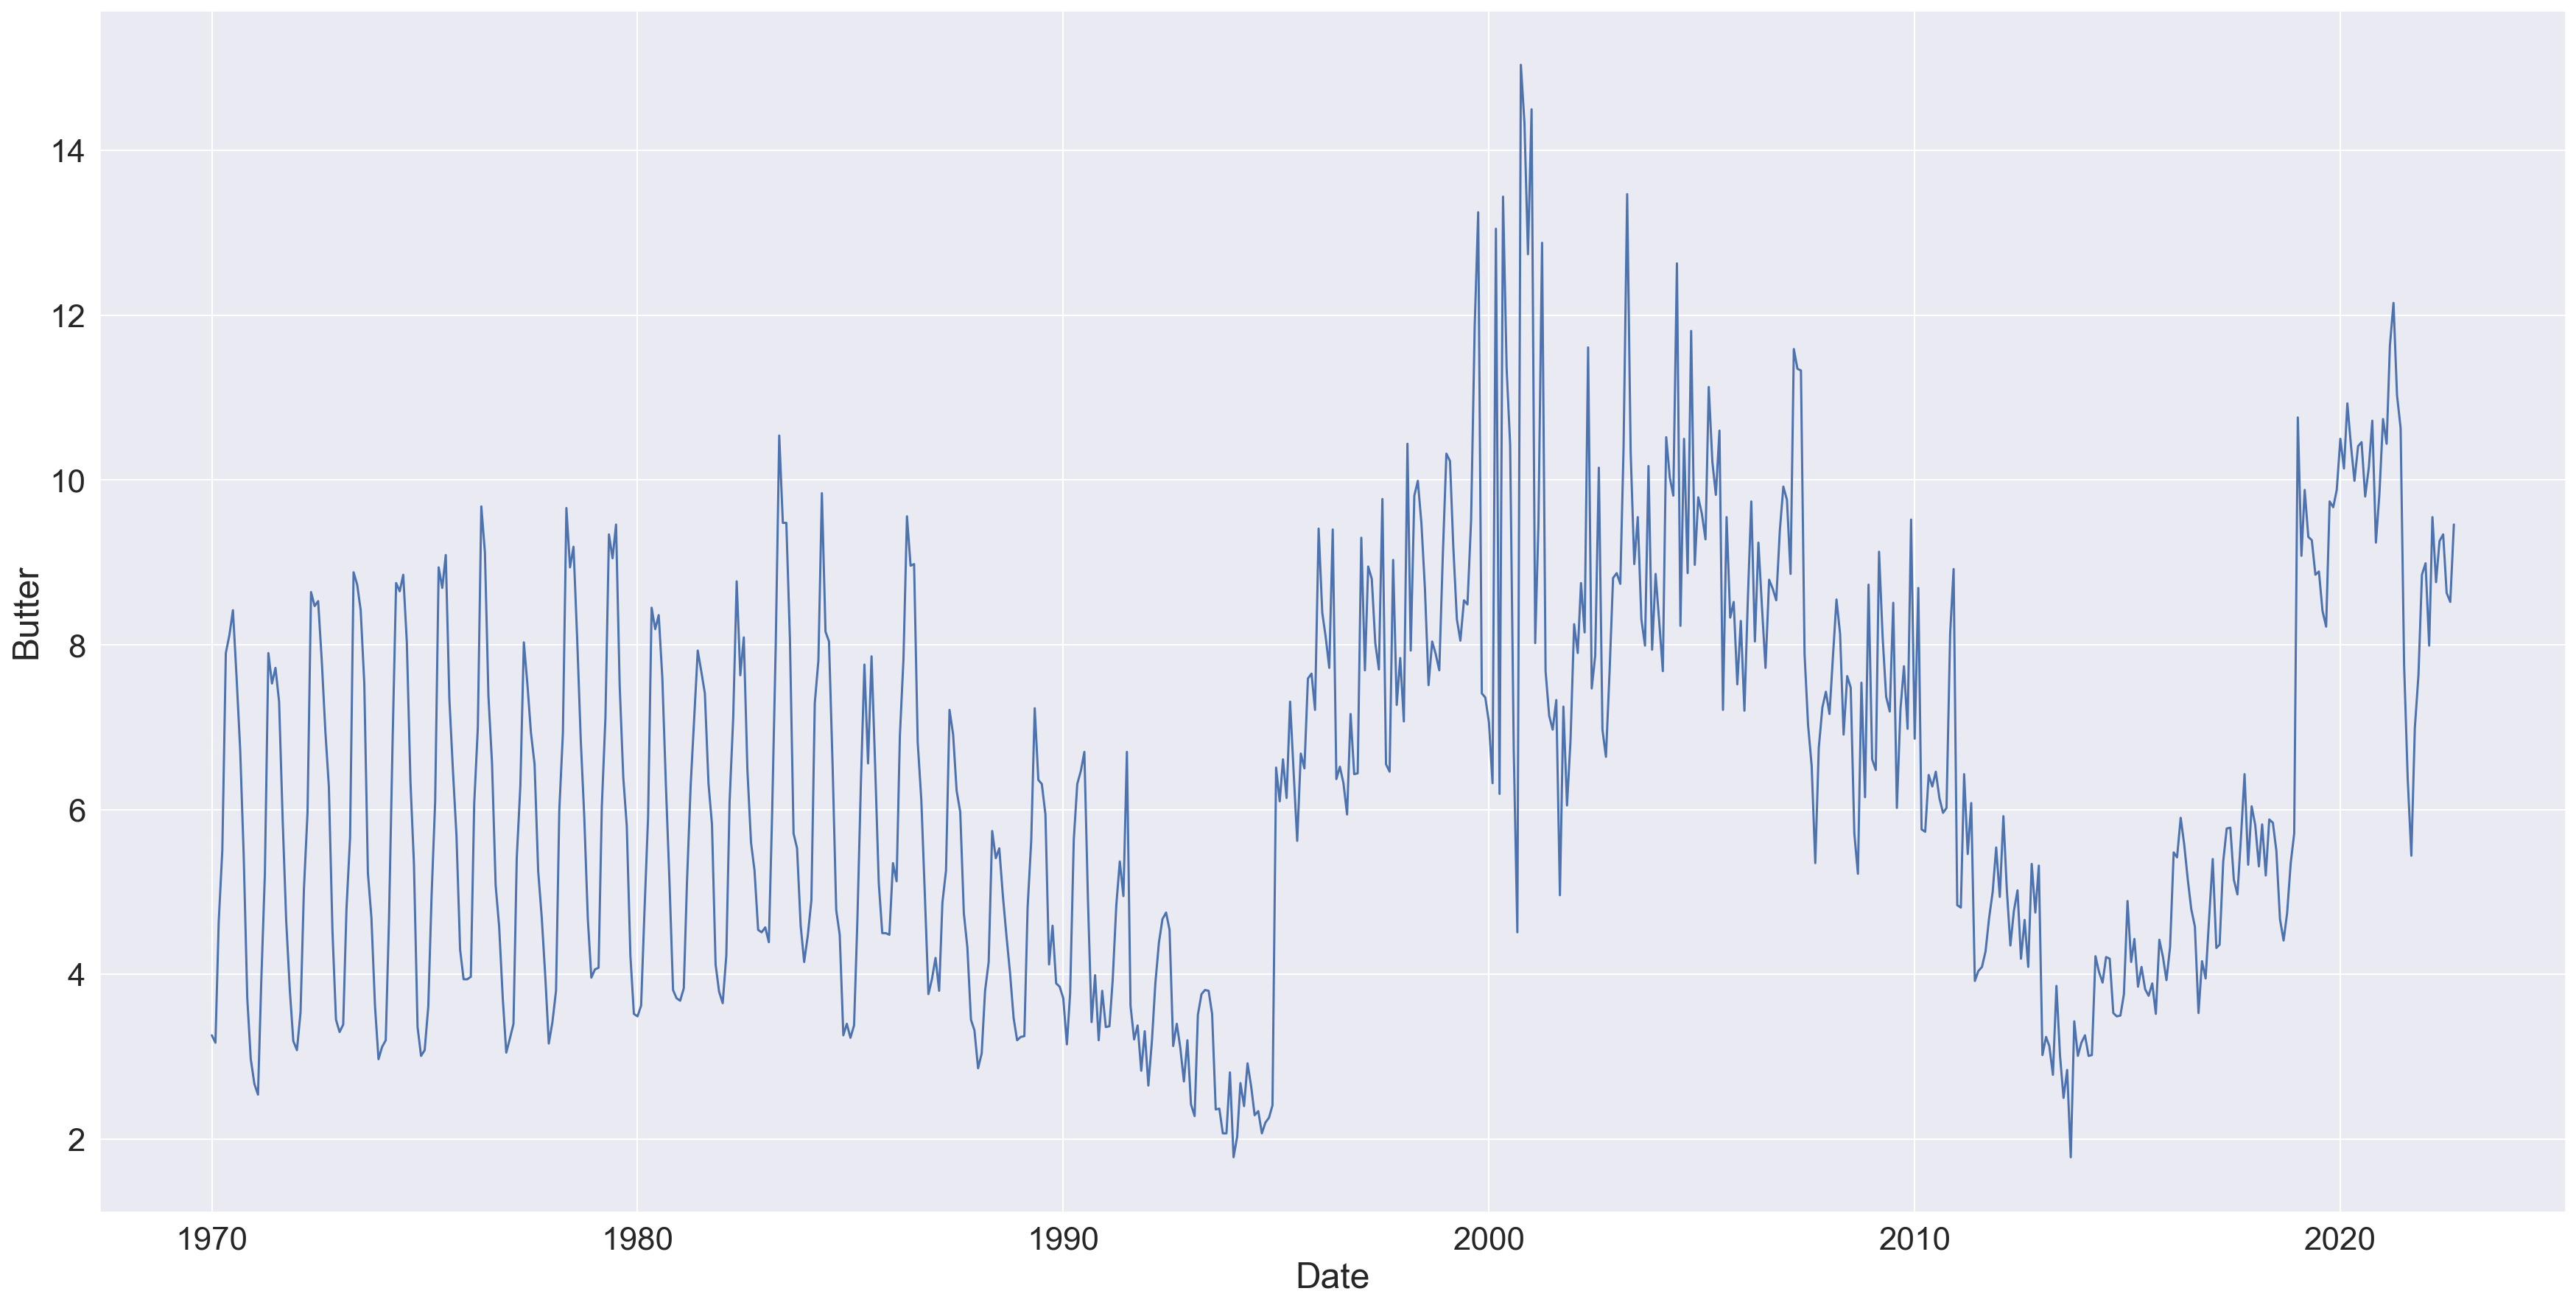

In [266]:
#Plot of Raw Milk collected monthly data Belgium

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Date', y = 'Butter', data = df_MilkCollected_Monthly_Belgium)
plt.show()

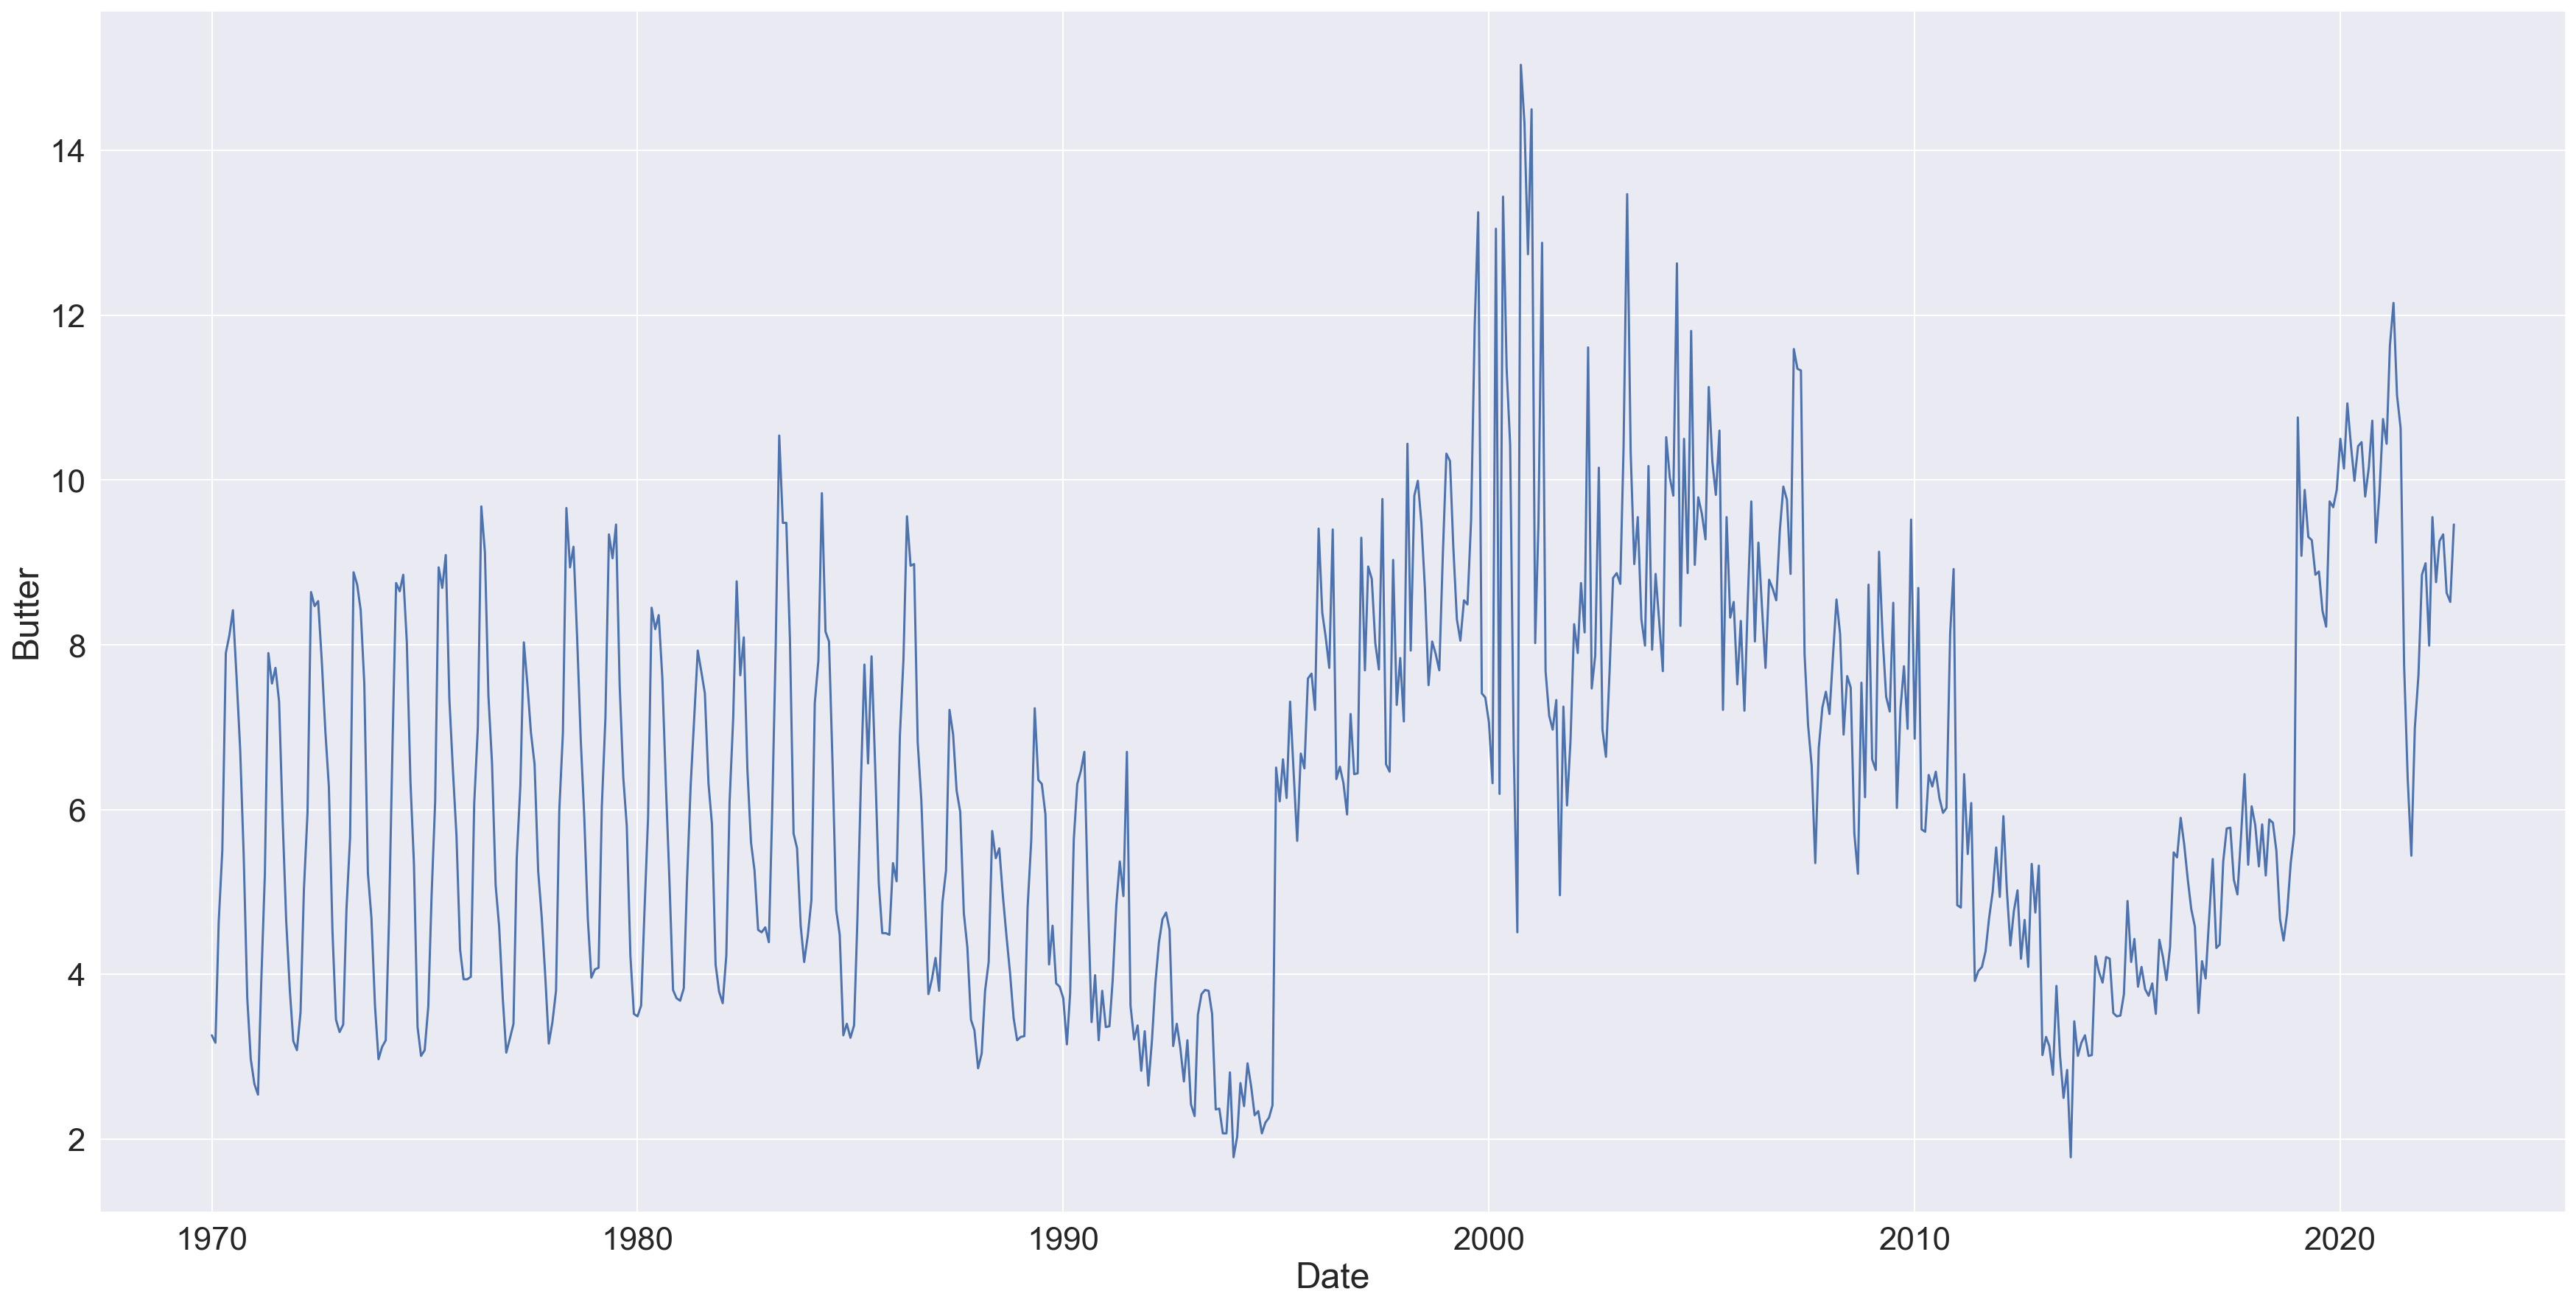

In [267]:
#Plot of Butter Produced monthly data Belgium

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Date', y = 'Butter', data = df_MilkCollected_Monthly_Belgium)
plt.show()

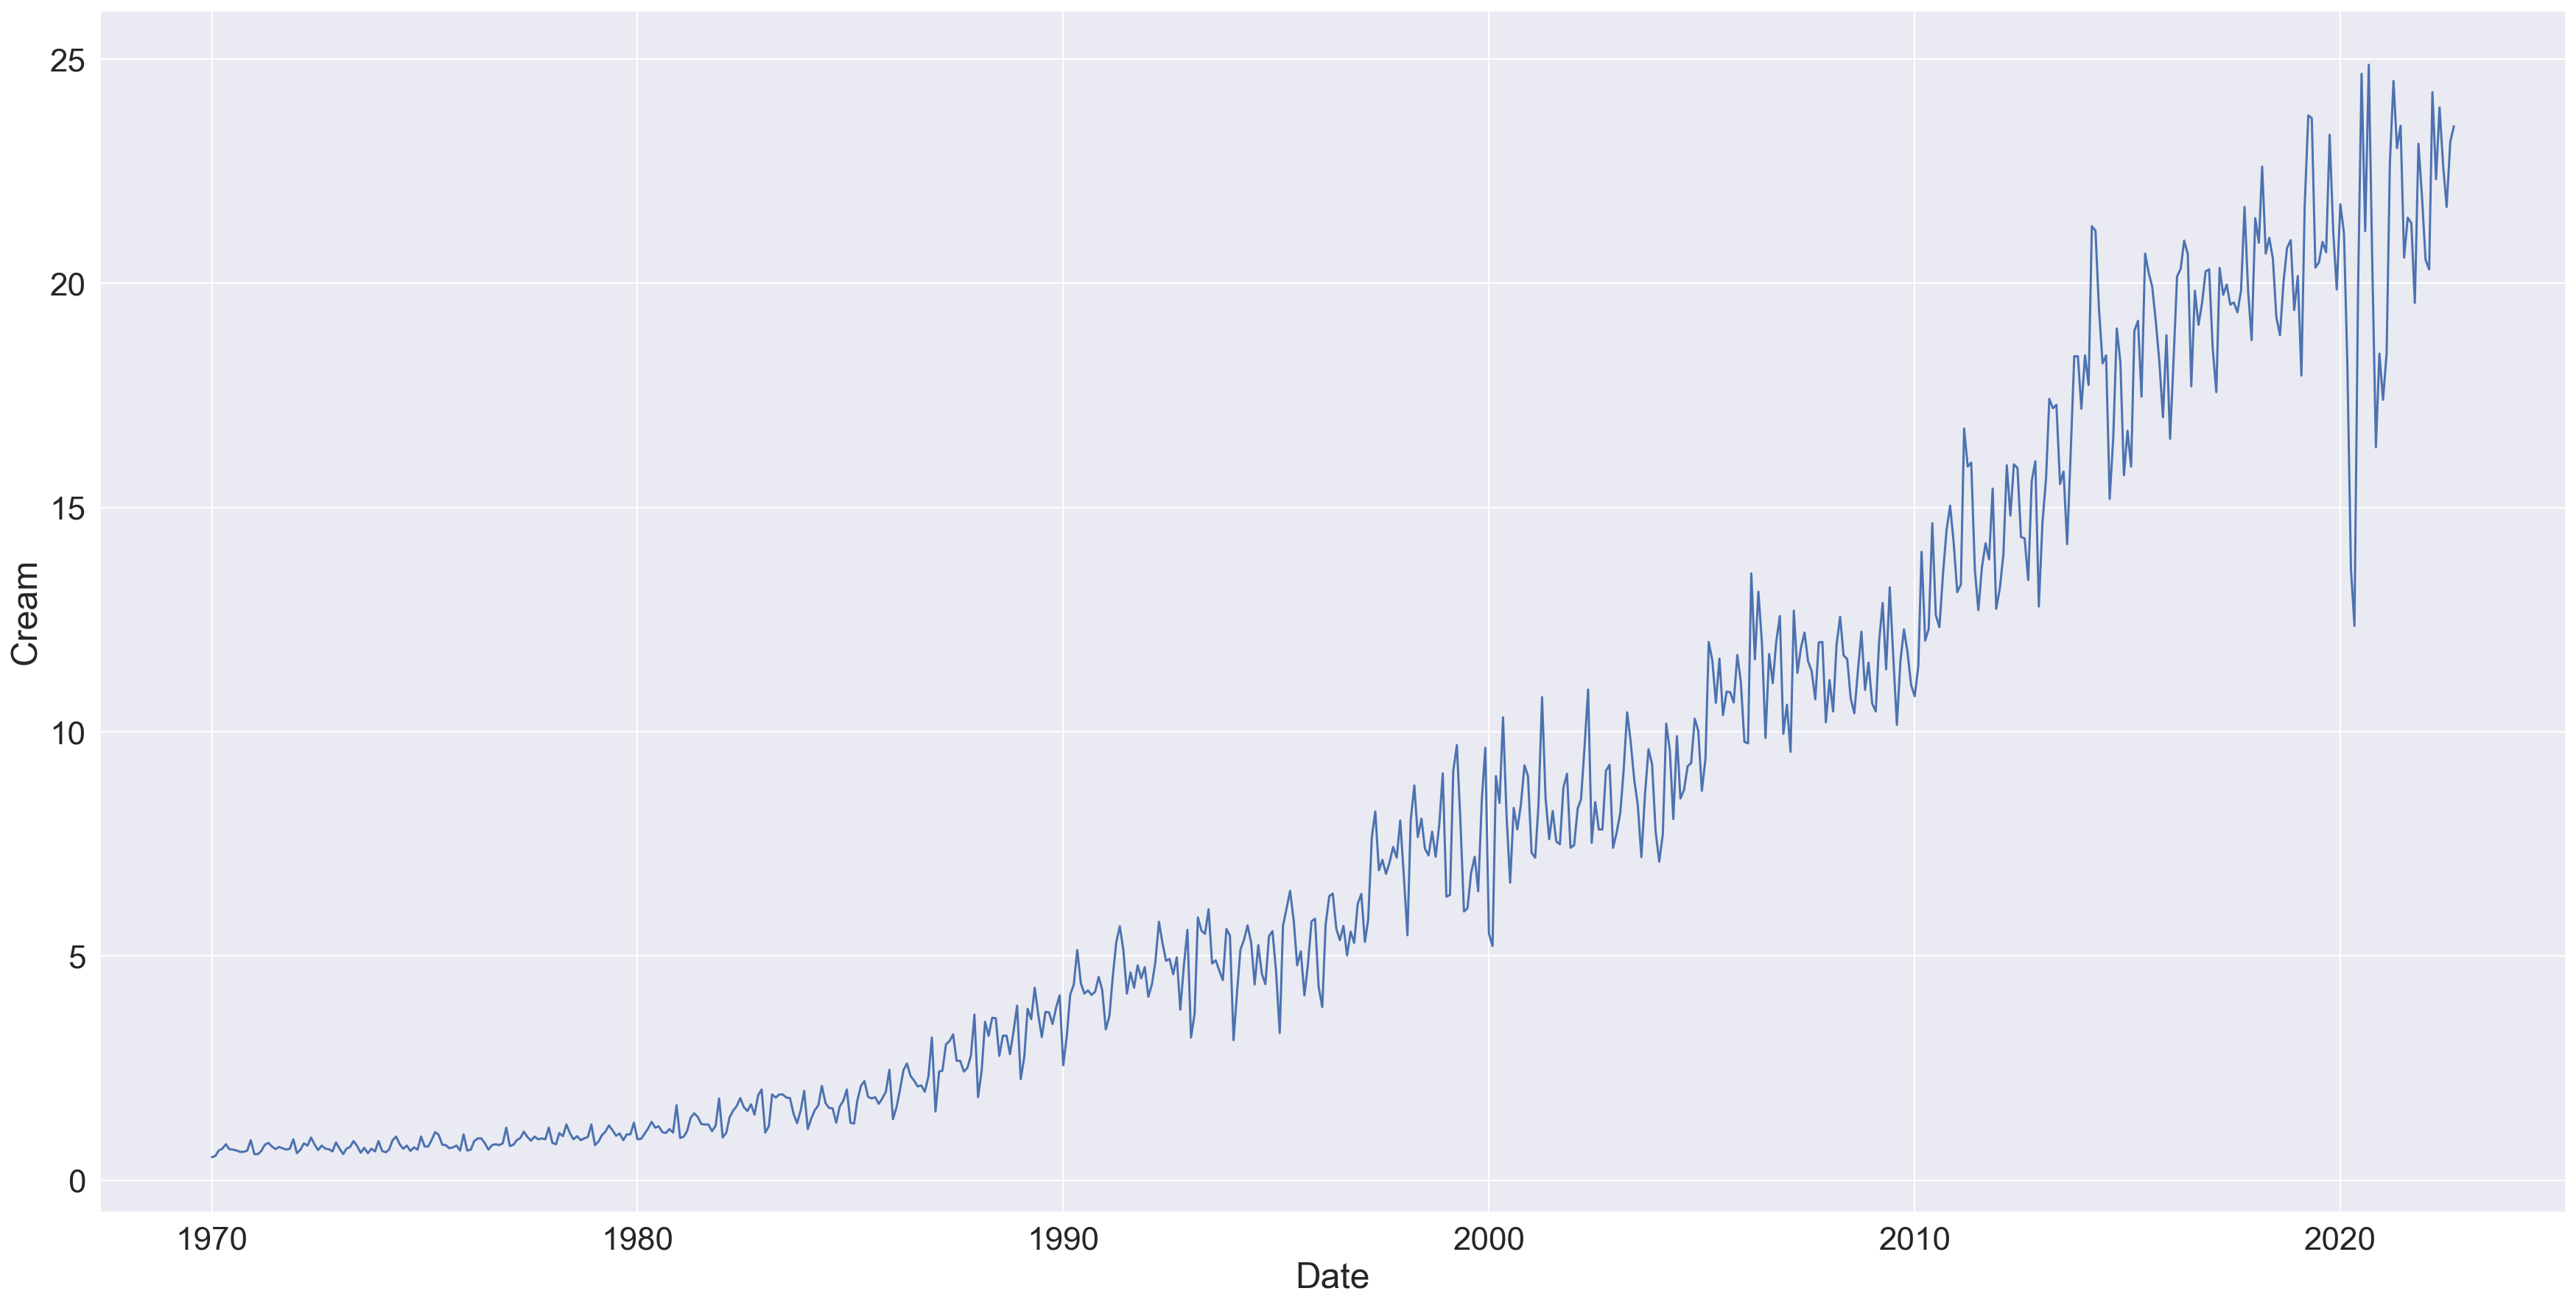

In [268]:
#Plot of Cream Produced monthly data Belgium

sns.set(rc = {'figure.figsize':(30,15)})
sns.set(font_scale=2)
myfig  = sns.lineplot(x = 'Date', y = 'Cream', data = df_MilkCollected_Monthly_Belgium)
plt.show()

### Descriptive Statistics

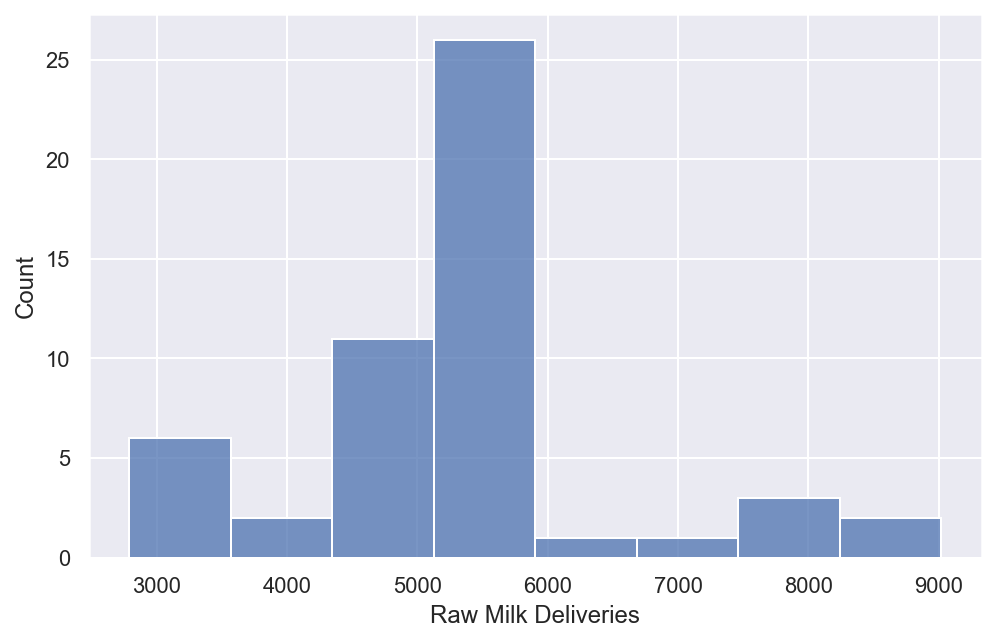

In [269]:
#Histogram of Raw Milk collected Ireland

sns.set(rc = {'figure.figsize':(8,5)})
sns.set(font_scale=1)

ax = sns.histplot(df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'],bins=8) 
plt.show()

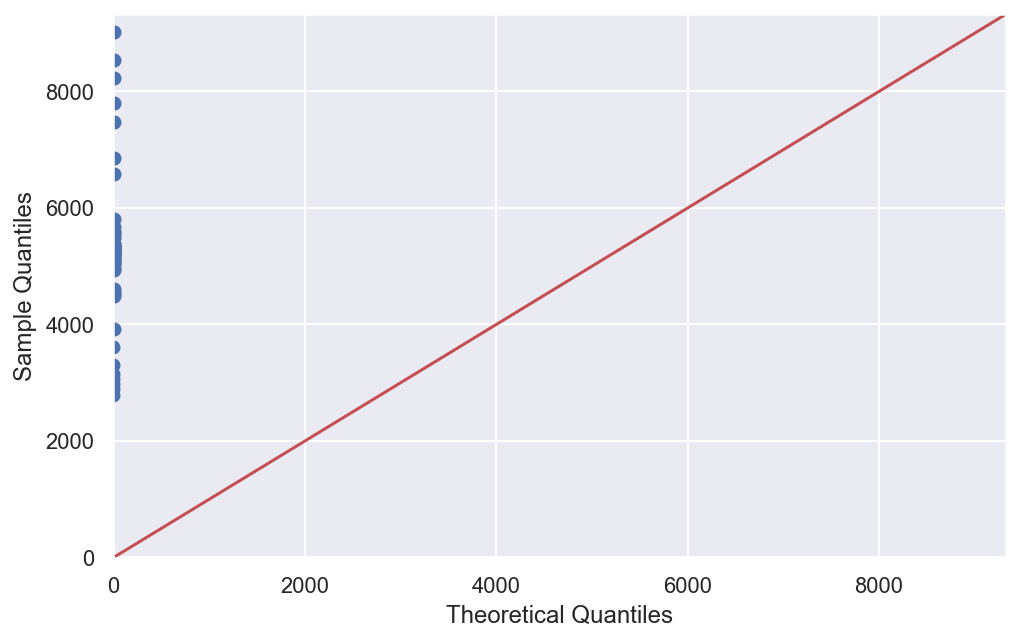

In [270]:
#Checking for normal distribution Q Q plot
fig = sm.qqplot(df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'], line='45')

In [271]:
#Checking for normal distribution Shapiro Wilk test
shapiro(df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'])

ShapiroResult(statistic=0.8696088790893555, pvalue=4.028079638374038e-05)

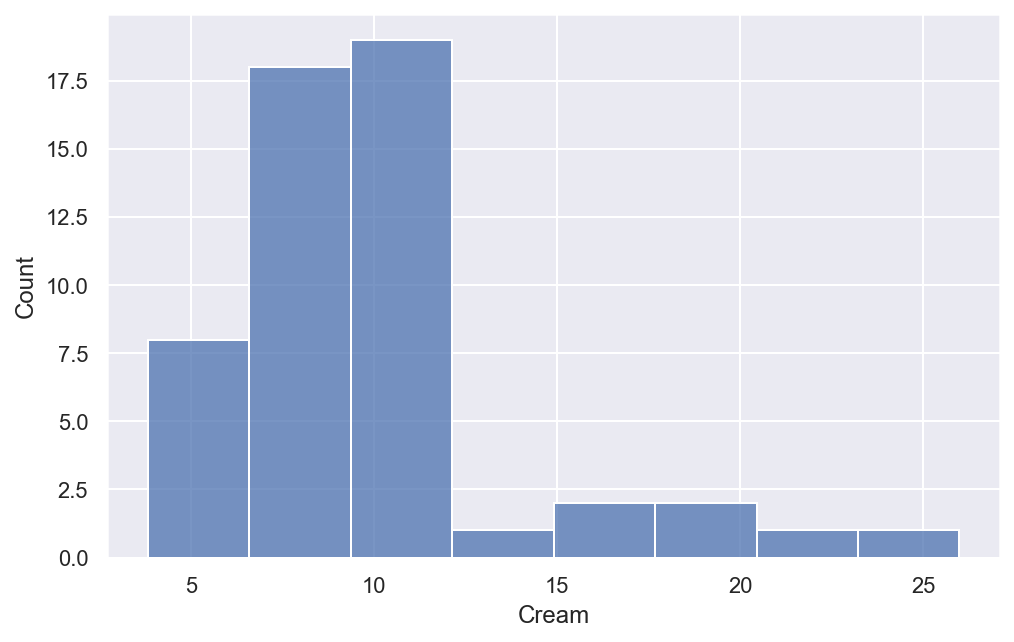

In [272]:
#Histogram of Annual Cream production Ireland

sns.set(rc = {'figure.figsize':(8,5)})
sns.set(font_scale=1)

ax = sns.histplot(df_MilkCollected_Annual_Ireland['Cream'],bins=8) 
plt.show()

In [273]:
#Checking for normal distribution Shapiro Wilk test
shapiro(df_MilkCollected_Annual_Ireland['Cream'])

ShapiroResult(statistic=0.8378015160560608, pvalue=5.184936526347883e-06)

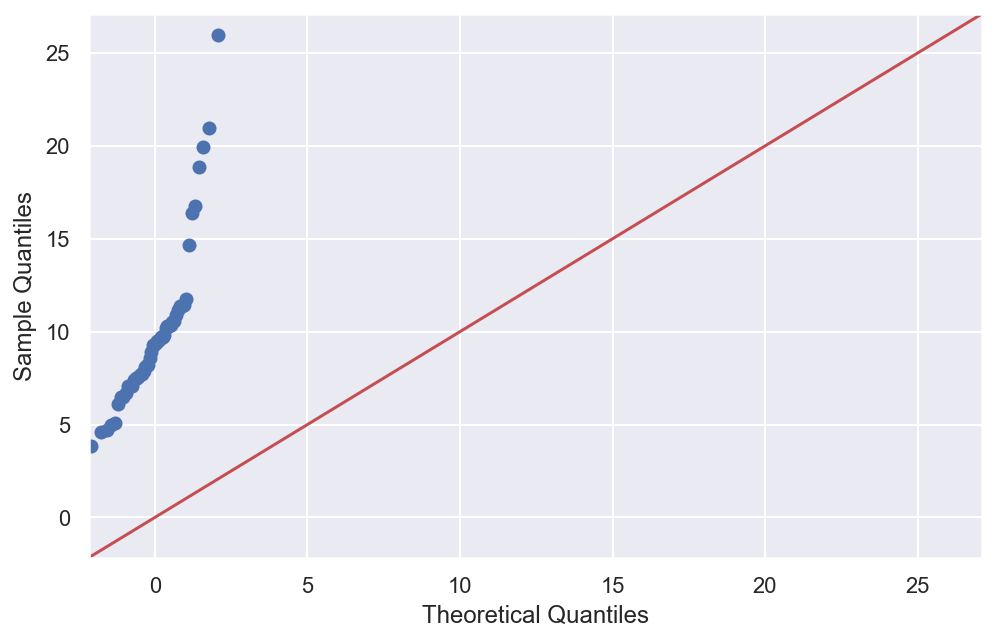

In [274]:
#Checking for normal distribution Q Q plot
fig = sm.qqplot(df_MilkCollected_Annual_Ireland['Cream'], line='45')

In [275]:
#Calculating Mean Raw Milk Deliveries Ireland
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].mean()

5246.017307692308

In [276]:
#Calculating Median Raw Milk Deliveries Ireland
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].median()

5254.15

In [277]:
#Calculating Mode Raw Milk Deliveries Ireland
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].mode()

0     2790.65
1     2891.01
2     2981.80
3     3061.48
4     3148.39
5     3308.10
6     3608.40
7     3922.70
8     4492.30
9     4525.40
10    4556.10
11    4610.90
12    4927.53
13    4948.50
14    5018.90
15    5061.20
16    5089.94
17    5091.20
18    5121.00
19    5160.30
20    5181.60
21    5196.40
22    5201.70
23    5224.50
24    5224.70
25    5252.10
26    5256.20
27    5267.80
28    5268.30
29    5271.40
30    5271.60
31    5288.40
32    5297.10
33    5310.00
34    5327.02
35    5338.10
36    5341.10
37    5379.70
38    5388.20
39    5478.30
40    5536.68
41    5583.69
42    5585.00
43    5681.60
44    5816.23
45    6585.13
46    6851.63
47    7475.42
48    7810.24
49    8226.62
50    8542.27
51    9018.37
Name: Raw Milk Deliveries, dtype: float64

In [278]:
#Converting to int and then Calculating Mode Raw Milk Deliveries Ireland 
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].astype(int).mode()

0    5224
1    5271
Name: Raw Milk Deliveries, dtype: int32

In [279]:
#Calculating Standard Deviation for Raw Milk Deliveries Ireland
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].std()

1307.875507565857

In [280]:
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].max()

9018.37

In [281]:
df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'].min()

2790.65

In [282]:
#Calculating Mean Butter produced Ireland
df_MilkCollected_Annual_Ireland['Butter'].mean()

144.24038461538458

In [283]:
#Calculating Median Butter produced Ireland
df_MilkCollected_Annual_Ireland['Butter'].median()

141.35

In [284]:
#Calculating Mode Butter produced Ireland
df_MilkCollected_Annual_Ireland['Butter'].mode()

0      70.74
1      72.60
2      73.45
3      75.56
4      83.30
5      83.41
6      98.50
7     101.70
8     111.00
9     112.10
10    118.80
11    122.30
12    122.76
13    123.90
14    126.32
15    132.90
16    133.50
17    134.30
18    135.60
19    137.20
20    137.83
21    139.00
22    139.10
23    139.70
24    140.10
25    140.50
26    142.20
27    142.80
28    143.20
29    143.50
30    143.70
31    144.90
32    145.01
33    145.91
34    147.20
35    148.40
36    148.50
37    151.80
38    152.05
39    152.30
40    153.40
41    158.30
42    160.70
43    165.00
44    166.38
45    187.48
46    198.70
47    223.67
48    237.84
49    251.07
50    264.72
51    275.60
Name: Butter, dtype: float64

In [285]:
#Converting to int and then Calculating Mode Butter produced Ireland 
df_MilkCollected_Annual_Ireland['Butter'].astype(int).mode()

0    139
1    143
Name: Butter, dtype: int32

In [286]:
#Calculating Standard Deviarion Butter Produced Ireland
df_MilkCollected_Annual_Ireland['Butter'].std()

44.60216058960524

In [287]:
df_MilkCollected_Annual_Ireland['Butter'].max()

275.6

In [288]:
df_MilkCollected_Annual_Ireland['Butter'].min()

70.74

In [289]:
df_MilkCollected_Annual_Ireland['Cream'].mean()

9.909230769230769

In [290]:
df_MilkCollected_Annual_Ireland['Cream'].astype(int).mode()

0    7
Name: Cream, dtype: int32

In [291]:
df_MilkCollected_Annual_Ireland['Cream'].median()

9.350000000000001

In [292]:
df_MilkCollected_Annual_Ireland['Cream'].std()

4.3120291598171185

In [293]:
df_MilkCollected_Annual_Ireland['Cream'].max()

25.99

In [294]:
df_MilkCollected_Annual_Ireland['Cream'].min()

3.82

In [295]:
#Calculating Skewness for Raw Milk Deliveries Ireland
skew(df_MilkCollected_Annual_Ireland['Raw Milk Deliveries'])

0.6749221815285303

In [296]:
#Calculating Skewness for Butter Produced Ireland
skew(df_MilkCollected_Annual_Ireland['Butter'])

1.0339301504225076

In [297]:
#Calculating Skewness for Cream Produced Ireland
skew(df_MilkCollected_Annual_Ireland['Cream'])

1.6946852927690197

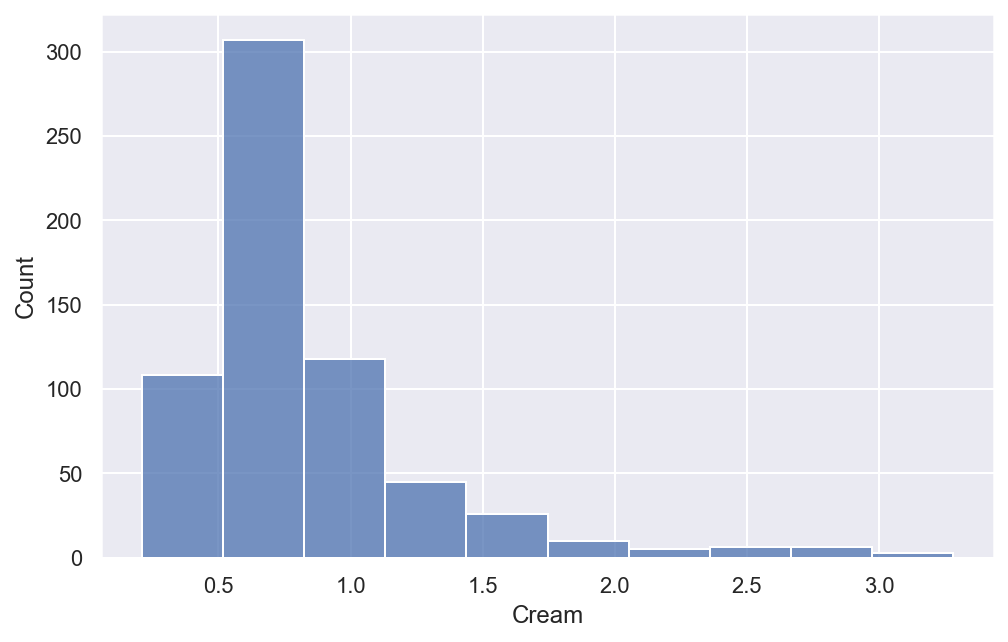

In [298]:
#Histogram of Butter collected Ireland Monthly

sns.set(rc = {'figure.figsize':(8,5)})
sns.set(font_scale=1)

ax = sns.histplot(df_MilkCollected_Monthly_Ireland['Cream'],bins=10) 
plt.show()

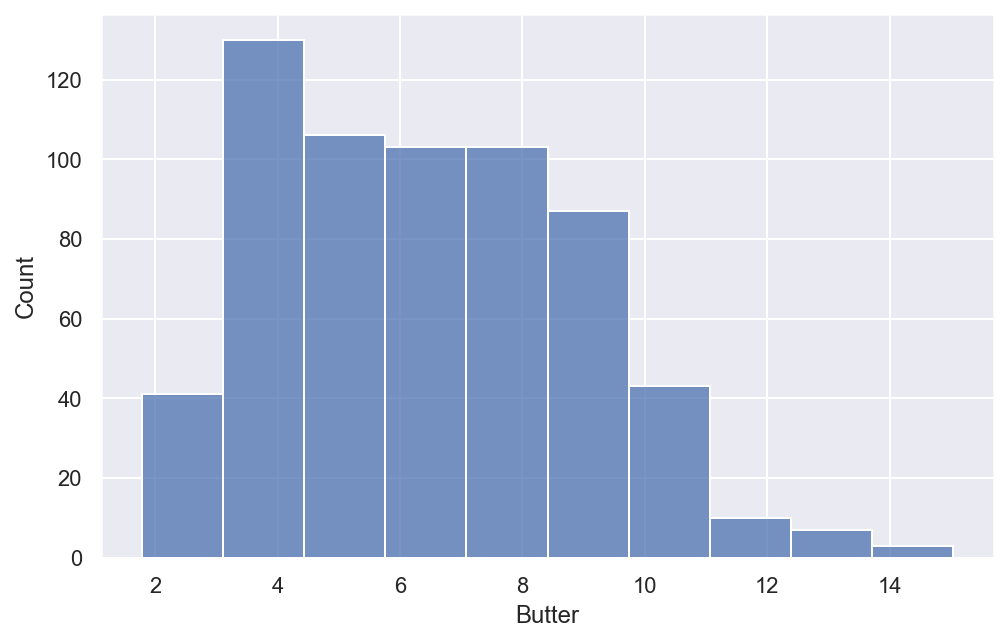

In [299]:
#Histogram of Butter collected Belgium Monthly

sns.set(rc = {'figure.figsize':(8,5)})
sns.set(font_scale=1)

ax = sns.histplot(df_MilkCollected_Monthly_Belgium['Butter'],bins=10) 
plt.show()

In [300]:
df_MilkCollected_Monthly_Ireland.head()

Country Geo Code  Year  Raw Milk Deliveries   Milk  Cream  Butter  \
5251  Ireland  IE  IRL  1970                63.74  33.86   0.21    1.01   
5252  Ireland  IE  IRL  1970                76.61  31.77   0.24    1.29   
5253  Ireland  IE  IRL  1970               149.14  34.43   0.32    3.04   
5254  Ireland  IE  IRL  1970               232.22  33.74   0.32    5.28   
5255  Ireland  IE  IRL  1970               366.30  35.30   0.41   10.03   

      Month       Date  
5251      1 1970-01-01  
5252      2 1970-02-01  
5253      3 1970-03-01  
5254      4 1970-04-01  
5255      5 1970-05-01

In [304]:
# Create a dataset for each country for year 2000

#df_Milk_2020_I = df_Milk_Monthly_Ireland.query("Year==2000")
#df_Milk_2020_F = df_Milk_Monthly_France.query("Year==2000")
#df_Milk_2020_B = df_Milk_Monthly_Belgium.query("Year==2000")



df_Milk_2020_I = df_MilkCollected_Monthly_Ireland.query("Year==2000")
df_Milk_2020_F = df_MilkCollected_Monthly_France.query("Year==2000")
df_Milk_2020_B = df_MilkCollected_Monthly_Belgium.query("Year==2000")



In [305]:
df_Milk_2020_I.head(12)

Country Geo Code  Year  Raw Milk Deliveries  Milk  Cream  Butter  Month  \
5611  Ireland  IE  IRL  2000                122.4  44.7    0.7     3.6      1   
5612  Ireland  IE  IRL  2000                193.4  43.4    0.7     5.5      2   
5613  Ireland  IE  IRL  2000                369.4  47.3    0.8    10.9      3   
5614  Ireland  IE  IRL  2000                629.5  45.4    0.8    16.0      4   
5615  Ireland  IE  IRL  2000                716.5  46.6    0.8    20.4      5   
5616  Ireland  IE  IRL  2000                696.4  45.2    0.8    19.4      6   
5617  Ireland  IE  IRL  2000                657.7  46.6    0.8    17.7      7   
5618  Ireland  IE  IRL  2000                587.8  46.9    0.9    16.4      8   
5619  Ireland  IE  IRL  2000                490.9  45.2    0.8    13.7      9   
5620  Ireland  IE  IRL  2000                370.6  46.0    0.8    11.8     10   
5621  Ireland  IE  IRL  2000                196.9  43.8    0.7     5.0     11   
5622  Ireland  IE  IRL  2000                128.8  45.0    1.1     3.3     12   

           Date  
5611 2000-01-01  
5612 2000-02-01  
5613 2000-03-01  
5614 2000-04-01  
5615 2000-05-01  
5616 2000-06-01  
5617 2000-07-01  
5618 2000-08-01  
5619 2000-09-01  
5620 2000-10-01  
5621 2000-11-01  
5622 2000-12-01

In [306]:
df_Milk_2020_B.head(12)

Country Geo Code  Year  Raw Milk Deliveries   Milk  Cream  Butter  Month  \
798  Belgium  BE  BEL  2000               260.02  53.93   5.50    7.06      1   
799  Belgium  BE  BEL  2000               254.91  54.21   5.22    6.32      2   
800  Belgium  BE  BEL  2000               276.15  59.00   9.01   13.05      3   
801  Belgium  BE  BEL  2000               284.98  49.02   8.41    6.19      4   
802  Belgium  BE  BEL  2000               304.11  52.93  10.32   13.44      5   
803  Belgium  BE  BEL  2000               269.17  48.42   8.08   11.35      6   
804  Belgium  BE  BEL  2000               262.60  51.17   6.63   10.43      7   
805  Belgium  BE  BEL  2000               249.38  56.46   8.30    6.72      8   
806  Belgium  BE  BEL  2000               238.42  57.94   7.82    4.51      9   
807  Belgium  BE  BEL  2000               239.32  61.61   8.37   15.04     10   
808  Belgium  BE  BEL  2000               231.16  60.87   9.25   14.33     11   
809  Belgium  BE  BEL  2000               254.27  58.23   9.01   12.74     12   

          Date  
798 2000-01-01  
799 2000-02-01  
800 2000-03-01  
801 2000-04-01  
802 2000-05-01  
803 2000-06-01  
804 2000-07-01  
805 2000-08-01  
806 2000-09-01  
807 2000-10-01  
808 2000-11-01  
809 2000-12-01

In [307]:
df_Milk_2020_F.head(12)

Country Geo Code  Year  Raw Milk Deliveries    Milk  Cream  Butter  \
3812  France  FR  FRA  2000              2066.53  325.60  25.30   44.08   
3813  France  FR  FRA  2000              1999.67  326.89  30.42   41.71   
3814  France  FR  FRA  2000              2175.30  350.94  35.43   44.13   
3815  France  FR  FRA  2000              2178.46  303.51  31.20   42.48   
3816  France  FR  FRA  2000              2213.14  321.52  32.79   42.92   
3817  France  FR  FRA  2000              1907.74  293.01  28.97   37.28   
3818  France  FR  FRA  2000              1771.99  282.37  26.55   33.21   
3819  France  FR  FRA  2000              1679.09  295.53  30.19   30.27   
3820  France  FR  FRA  2000              1662.54  307.09  29.88   29.57   
3821  France  FR  FRA  2000              1820.11  330.79  31.24   32.81   
3822  France  FR  FRA  2000              1808.93  329.08  32.74   34.48   
3823  France  FR  FRA  2000              1998.63  347.10  32.29   38.76   

      Month       Date  
3812      1 2000-01-01  
3813      2 2000-02-01  
3814      3 2000-03-01  
3815      4 2000-04-01  
3816      5 2000-05-01  
3817      6 2000-06-01  
3818      7 2000-07-01  
3819      8 2000-08-01  
3820      9 2000-09-01  
3821     10 2000-10-01  
3822     11 2000-11-01  
3823     12 2000-12-01

In [308]:
x = np.random.normal(size=300) 
shapiro(x) 

ShapiroResult(statistic=0.9960346221923828, pvalue=0.6538919806480408)

In [309]:
shapiro(df_Milk_2020_I['Milk'])

ShapiroResult(statistic=0.9581571817398071, pvalue=0.7572346925735474)

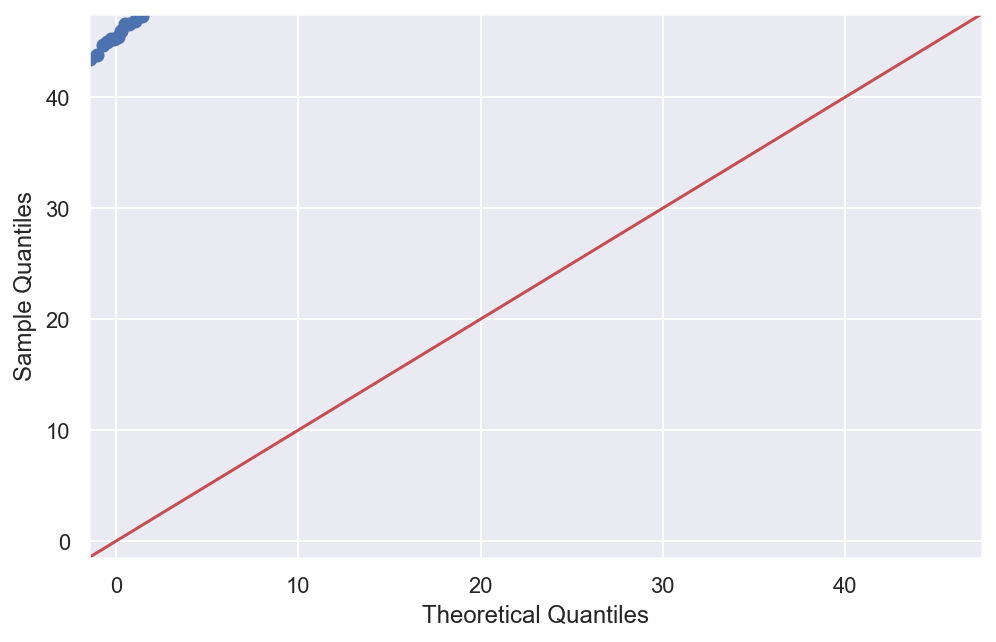

In [310]:
#Checking for normal distribution Q Q plot
fig = sm.qqplot(df_Milk_2020_I['Milk'], line='45')

In [311]:
Butter_Ireland = [3.6, 5.5, 10.9, 16, 20.4, 19.4, 17.7, 16.4, 13.7 , 11.8, 5, 3.3]
Butter_Belgium = [7.06, 6.32, 13.05 , 6.19, 13.44, 11.35, 10.43, 6.72, 4.51, 15.04, 14.33, 12.74]
Butter_France = [44.08, 41.71, 44.13, 42.48, 42.92, 37.28, 33.21, 30.27, 29.57, 32.81, 34.48, 38.76]

In [312]:
#Levene's test centered at the median
stats.levene(Butter_Ireland, Butter_Belgium, Butter_France, center='median')

LeveneResult(statistic=2.218015137130159, pvalue=0.12479537087123128)

In [313]:
#Levene's test centered at the median
stats.levene(Butter_Ireland, Butter_Belgium, Butter_France, center='mean')

LeveneResult(statistic=2.3315902875587047, pvalue=0.11294048079527529)

In [314]:
# Conduct the one-way ANOVA
f_oneway(Butter_Ireland, Butter_Belgium, Butter_France)

F_onewayResult(statistic=102.79514626010791, pvalue=6.6712821543493e-15)

### Hypothesis testing

Raw Milk Deliveries Ireland vs Belgium for Year 2000

In [315]:
#Perform Shapiro-Wilk test 
shapiro(df_Milk_2020_I['Raw Milk Deliveries'])

ShapiroResult(statistic=0.8884272575378418, pvalue=0.11246637254953384)

In [316]:
#Perform Shapiro-Wilk test 
shapiro(df_Milk_2020_B['Raw Milk Deliveries'])

ShapiroResult(statistic=0.9636621475219727, pvalue=0.8345453143119812)

In [317]:
#Perform t-test
stats.ttest_ind(df_Milk_2020_I['Raw Milk Deliveries'],df_Milk_2020_B['Raw Milk Deliveries'])

Ttest_indResult(statistic=2.557186763492045, pvalue=0.017966561865284413)

Butter Produced Ireland vs Belgium for Year 2000

In [318]:
#Perform Shapiro-Wilk test 
shapiro(df_Milk_2020_I['Butter'])

ShapiroResult(statistic=0.9066749215126038, pvalue=0.1933693140745163)

In [319]:
#Perform Shapiro-Wilk test 
shapiro(df_Milk_2020_B['Butter'])

ShapiroResult(statistic=0.8989026546478271, pvalue=0.15352949500083923)

In [320]:
#Perform t-test
stats.ttest_ind(df_Milk_2020_I['Butter'],df_Milk_2020_B['Butter'])

Ttest_indResult(statistic=0.8898611722103216, pvalue=0.3831682731711141)

Milk Produced Ireland vs Belgium for Year 2000

In [321]:
#Perform Shapiro-Wilk test 
shapiro(df_Milk_2020_I['Milk'])

ShapiroResult(statistic=0.9581571817398071, pvalue=0.7572346925735474)

In [322]:
#Perform Shapiro-Wilk test 
shapiro(df_Milk_2020_B['Milk'])

ShapiroResult(statistic=0.9530268907546997, pvalue=0.6815672516822815)

In [323]:
#Perform t-test
stats.ttest_ind(df_Milk_2020_I['Milk'],df_Milk_2020_B['Milk'])

Ttest_indResult(statistic=-7.426824012787325, pvalue=1.982420533041643e-07)

Butter Produced 3 Countries (Ireland, Belgium, France)

In [324]:
#Perform Shapiro-Wilk test 
shapiro(df_Milk_2020_I['Butter'])

ShapiroResult(statistic=0.9066749215126038, pvalue=0.1933693140745163)

In [325]:
#Perform Shapiro-Wilk test 
shapiro(df_Milk_2020_B['Butter'])

ShapiroResult(statistic=0.8989026546478271, pvalue=0.15352949500083923)

In [326]:
#Perform Shapiro-Wilk test 
shapiro(df_Milk_2020_F['Butter'])

ShapiroResult(statistic=0.9012460112571716, pvalue=0.1646021008491516)

In [327]:
#Levene's test centered at the median
stats.levene(df_Milk_2020_I['Butter'], df_Milk_2020_B['Butter'], df_Milk_2020_F['Butter'], center='median')

LeveneResult(statistic=2.218015137130159, pvalue=0.12479537087123128)

In [328]:
#Levene's test centered at the mean
stats.levene(df_Milk_2020_I['Butter'], df_Milk_2020_B['Butter'], df_Milk_2020_F['Butter'], center='mean')

LeveneResult(statistic=2.3315902875587047, pvalue=0.11294048079527529)

In [329]:
# Conduct the one-way ANOVA
f_oneway(df_Milk_2020_I['Butter'], df_Milk_2020_B['Butter'], df_Milk_2020_F['Butter'])

F_onewayResult(statistic=102.79514626010791, pvalue=6.6712821543493e-15)

Raw Milk Collected 3 Countries (Ireland, Belgium, France)

In [330]:
#Perform Shapiro-Wilk test 
shapiro(df_Milk_2020_I['Raw Milk Deliveries'])

ShapiroResult(statistic=0.8884272575378418, pvalue=0.11246637254953384)

In [331]:
#Perform Shapiro-Wilk test 
shapiro(df_Milk_2020_B['Raw Milk Deliveries'])

ShapiroResult(statistic=0.9636621475219727, pvalue=0.8345453143119812)

In [332]:
#Perform Shapiro-Wilk test 
shapiro(df_Milk_2020_F['Raw Milk Deliveries'])

ShapiroResult(statistic=0.931726336479187, pvalue=0.3987703323364258)

In [333]:
#Levene's test centered at the median
stats.levene(df_Milk_2020_I['Raw Milk Deliveries'], df_Milk_2020_B['Raw Milk Deliveries'], df_Milk_2020_F['Raw Milk Deliveries'], center='median')

LeveneResult(statistic=19.942001423913673, pvalue=2.0991739923035968e-06)

In [334]:
#Levene's test centered at the mean
stats.levene(df_Milk_2020_I['Raw Milk Deliveries'], df_Milk_2020_B['Raw Milk Deliveries'], df_Milk_2020_F['Raw Milk Deliveries'], center='mean')

LeveneResult(statistic=20.15780950065625, pvalue=1.9043100729445404e-06)

In [335]:
#perform Kruskal-Wallis Test 
stats.kruskal(df_Milk_2020_I['Raw Milk Deliveries'], df_Milk_2020_B['Raw Milk Deliveries'], df_Milk_2020_F['Raw Milk Deliveries'])

KruskalResult(statistic=24.216216216216225, pvalue=5.514618359491551e-06)

Supermarket Sample Hypothesis testing.
This data was collected by me at 2 different supermarkets in Dublin

In [336]:
tesco = [149,116,70,89,138,95] 
aldi = [109,88,92,116,75,113] 

In [337]:
#Perform Shapiro-Wilk test 
shapiro(tesco)

ShapiroResult(statistic=0.9574099779129028, pvalue=0.7995737791061401)

In [338]:
#Perform Shapiro-Wilk test 
shapiro(aldi)

ShapiroResult(statistic=0.9141708016395569, pvalue=0.464398592710495)

In [339]:
#Perform t-test
stats.ttest_ind(tesco,aldi)

Ttest_indResult(statistic=0.7582810649803788, pvalue=0.4657779706516897)

### Central Limit Theorem

In [340]:
def sample_mean_calculator(population_array, sample_size, n_samples):
  sample_means = []
  for i in range(n_samples):
    sample = np.random.choice(population_array, size=sample_size, replace=False)
    sample_mean = stat.mean(sample)
    sample_means.append(sample_mean)
  return sample_means

In [341]:
ireland_butter = df_MilkCollected_Annual_Ireland['Butter']
ireland_butter = sample_mean_calculator(ireland_butter,10,50)

belgium_butter = df_MilkCollected_Monthly_Belgium['Butter']
belgium_butter = sample_mean_calculator(belgium_butter,10,50)



C:\Users\tonyw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

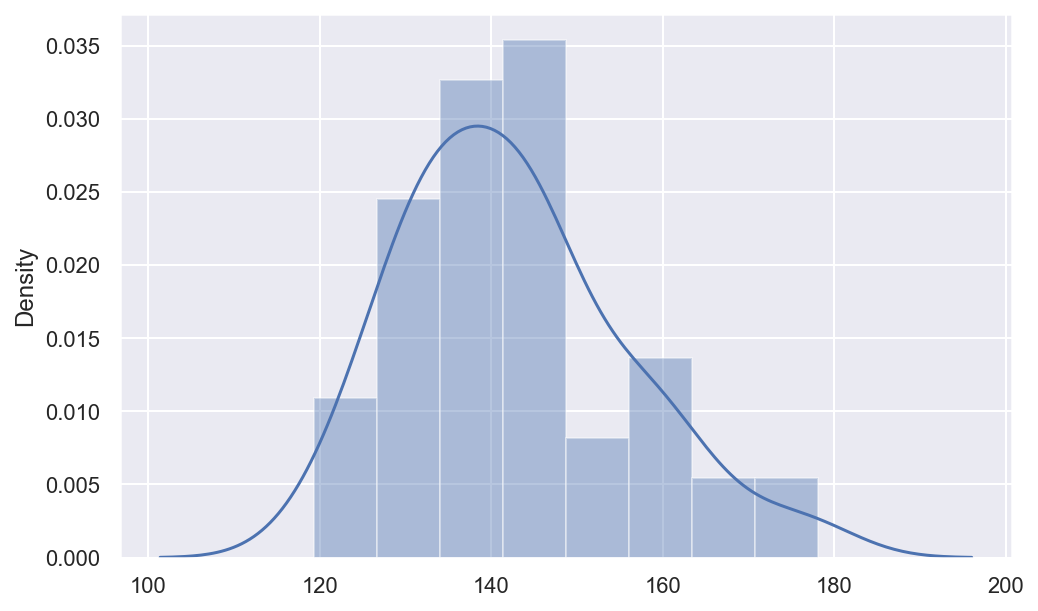

In [342]:
sns.distplot(ireland_butter)

C:\Users\tonyw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

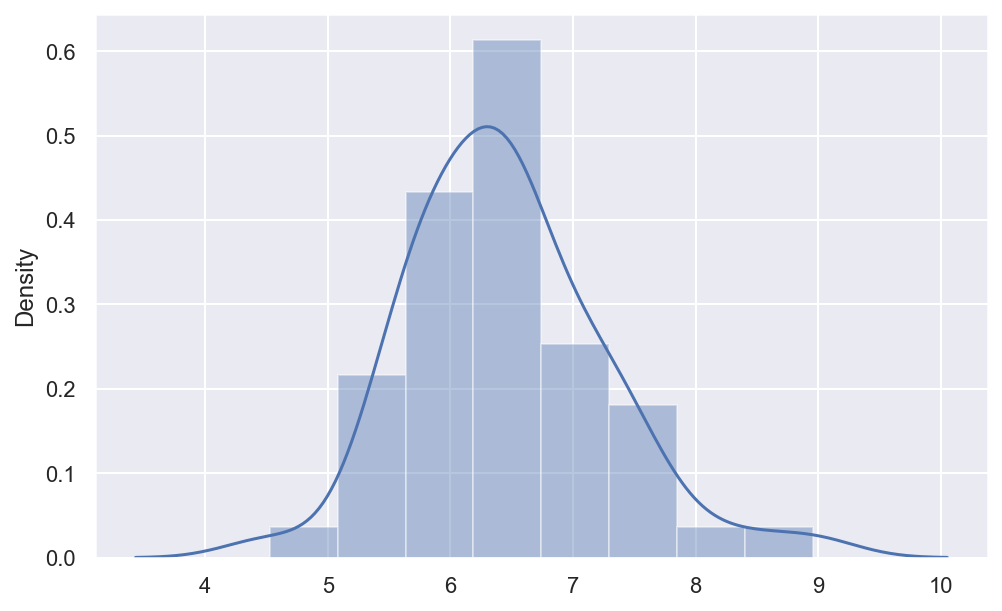

In [343]:
sns.distplot(belgium_butter)

In [344]:
#Checking for normal distribution Shapiro Wilk test
shapiro(ireland_butter)

ShapiroResult(statistic=0.9632934331893921, pvalue=0.1221393346786499)

In [345]:
#Checking for normal distribution Shapiro Wilk test
shapiro(belgium_butter)

ShapiroResult(statistic=0.9617906212806702, pvalue=0.10566240549087524)

In [346]:
sum(belgium_butter) / len(belgium_butter)

6.453419999999999

In [347]:
sum(ireland_butter) / len(ireland_butter)

142.50068

In [348]:
ireland_butter = df_MilkCollected_Annual_Ireland['Butter']
belgium_butter = df_MilkCollected_Annual_Belgium['Butter']
france_butter = df_MilkCollected_Annual_France['Butter']

In [349]:
stats.mannwhitneyu(ireland_butter, belgium_butter, alternative='two-sided')

MannwhitneyuResult(statistic=2536.0, pvalue=1.4243307436295085e-14)

In [350]:
stats.kruskal(ireland_butter, belgium_butter, france_butter)

KruskalResult(statistic=129.75479591452154, pvalue=6.669665705569829e-29)

## Machine Learning Section

In [351]:
df_MilkCollected_Monthly_Ireland.head()

Country Geo Code  Year  Raw Milk Deliveries   Milk  Cream  Butter  \
5251  Ireland  IE  IRL  1970                63.74  33.86   0.21    1.01   
5252  Ireland  IE  IRL  1970                76.61  31.77   0.24    1.29   
5253  Ireland  IE  IRL  1970               149.14  34.43   0.32    3.04   
5254  Ireland  IE  IRL  1970               232.22  33.74   0.32    5.28   
5255  Ireland  IE  IRL  1970               366.30  35.30   0.41   10.03   

      Month       Date  
5251      1 1970-01-01  
5252      2 1970-02-01  
5253      3 1970-03-01  
5254      4 1970-04-01  
5255      5 1970-05-01

In [352]:
df_Milk_Monthly_Ireland_77.head()

Country Geo Code  Year  Raw Milk Deliveries  Milk  Cream  Butter  Month  \
0  Ireland  IE  IRL  1977                 68.7  33.6    0.3     1.1      1   
1  Ireland  IE  IRL  1977                117.1  31.4    0.4     2.6      2   
2  Ireland  IE  IRL  1977                244.0  34.4    0.5     5.9      3   
3  Ireland  IE  IRL  1977                411.7  33.2    0.6    10.0      4   
4  Ireland  IE  IRL  1977                583.9  34.8    0.6    14.8      5   

        Date  Milk Selling Price  
0 1977-01-01               14.62  
1 1977-02-01               15.05  
2 1977-03-01               14.12  
3 1977-04-01               14.19  
4 1977-05-01               14.61

#### Linear Regression Model

### Investigating Raw Milk collected and Milk selling price on Butter production

In [353]:


dfLinearRegression = df_Milk_Monthly_Ireland_77.copy()

#Drop unwanted columns
dfLinearRegression = dfLinearRegression.drop(dfLinearRegression.columns[[0,1,2,3,5,6,8,9,10]], axis = 1,)

#dfTimeSeries.drop(['Country','Geo','Year','Raw Milk Deliveries','Milk','Cream','Year Month'], axis=1,inplace=True)

#dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,9]], axis = 1,)


#Add dummy values for Hour to the machine learning dataframe
#dfLinearRegression = pd.get_dummies(dfLinearRegression, prefix = ['Month'], columns = ['Month'], drop_first = True)

# X and y are the array variables that store the independent and dependent variables
y = dfLinearRegression['Butter']
X = dfLinearRegression.drop(columns=['Butter'])

# Split the dataset by using train_test_splitting to 25% and 75% for training and a seed of 42
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_Train, y_Train)

# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_Train, y_Train)))
print("Test set score: {:.2f}".format(lr.score(X_Test, y_Test)))


Training set score: 0.95
Test set score: 0.96


#### Ridge Regression

In [354]:
# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_Train, y_Train)

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_Train, y_Train)))
print("Test set score: {:.2f}".format(ridge.score(X_Test, y_Test)))

Training set score: 0.95
Test set score: 0.96


#### GridSearchCV

In [355]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_Train, y_Train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.9440289635350465
Best Params:  {'alpha': 1000}


In [356]:
# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 10).fit(X_Train, y_Train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_Train, y_Train)))
print("Test set score: {:.2f}".format(ridge10.score(X_Test, y_Test)))

Training set score: 0.95
Test set score: 0.96


#### Polynomial Regression

In [357]:
#Set the degree to use (Degree 2 = x**2)
poly_reg = PolynomialFeatures(degree = 2)

#Transform and fit to data
xPoly = poly_reg.fit_transform(X)

# Split the dataset by using train_test_splitting to 25% and 75% for training and a seed of 42
X_Train, X_Test, y_Train, y_Test = train_test_split(xPoly, y, random_state = 42)

lr = LinearRegression().fit(X_Train, y_Train)

# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_Train, y_Train)))
print("Test set score: {:.2f}".format(lr.score(X_Test, y_Test)))

Training set score: 0.95
Test set score: 0.96


#### k-fold Cross Validation

In [358]:
# k-fold Cross Validation for Linear Regression
# k-fold Cross Validation with 8 splits
splitScores = cross_val_score(lr, X_Train, y_Train, scoring = 'r2', cv = 8)

# Display the score values
print(f'k-fold Cross Validation scores: {splitScores}')
print(f'Mean of Cross Validation scores: {round(np.mean(splitScores),2)}')

k-fold Cross Validation scores: [0.95192222 0.96489125 0.94135734 0.94445269 0.96052637 0.86664357
 0.95561176 0.95416305]
Mean of Cross Validation scores: 0.94


#### Autoregressive model

C:\Users\tonyw\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



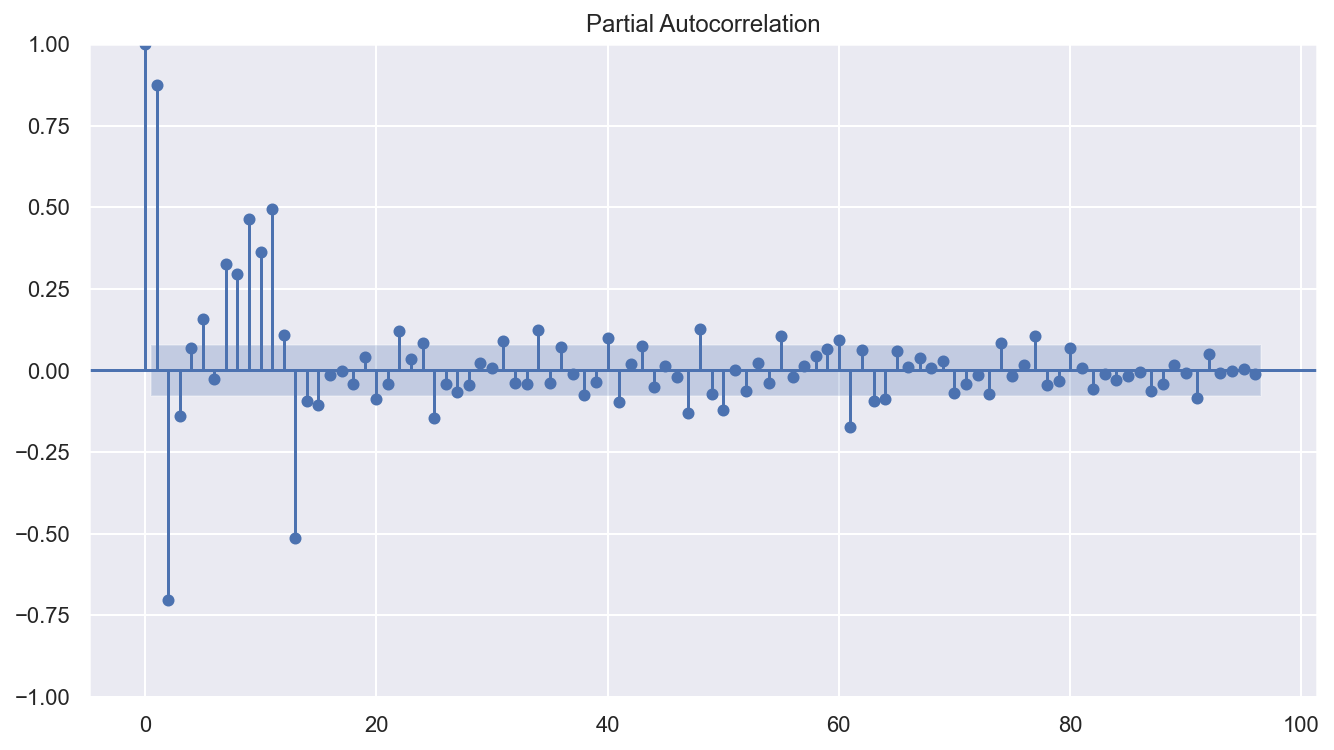

In [426]:
dfTimeSeries = df_MilkCollected_Monthly_Ireland.copy()
#Plot of Partial Autocorrelation for North Strand Rd S/B
sns.set(rc = {'figure.figsize':(11,6)})
sns.set(font_scale=1)
acf_plot = plot_pacf(dfTimeSeries['Butter'], lags =96)

In [360]:
dfTimeSeries = df_Milk_Monthly_Ireland_77.copy()

#Drop all columns excet for Butter
dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,3,4,6,7,8,9,10]], axis = 1,)
                                                
#dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,9]], axis = 1,)

#Set the size of the training data and test data. 
dfTrainData = dfTimeSeries[0:84]
dfTestData = dfTimeSeries[75:108]

#Convert dataframes to a series  
trainData = dfTrainData.squeeze()
testData = dfTestData.squeeze()

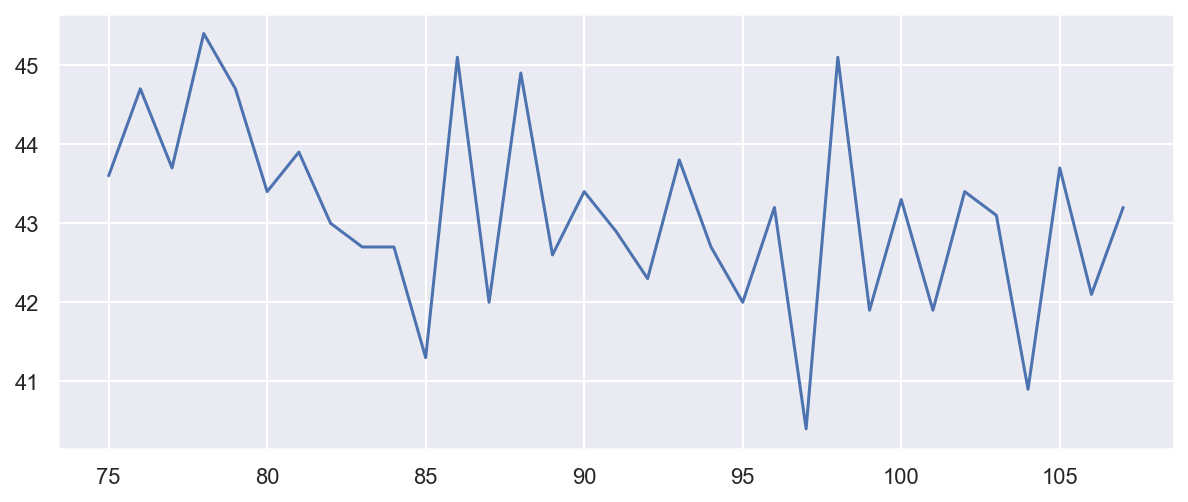

In [361]:
#Plot the pattern of the test data
plt.figure(figsize=(10,4))
sns.set(font_scale=1)
plt.plot(testData)

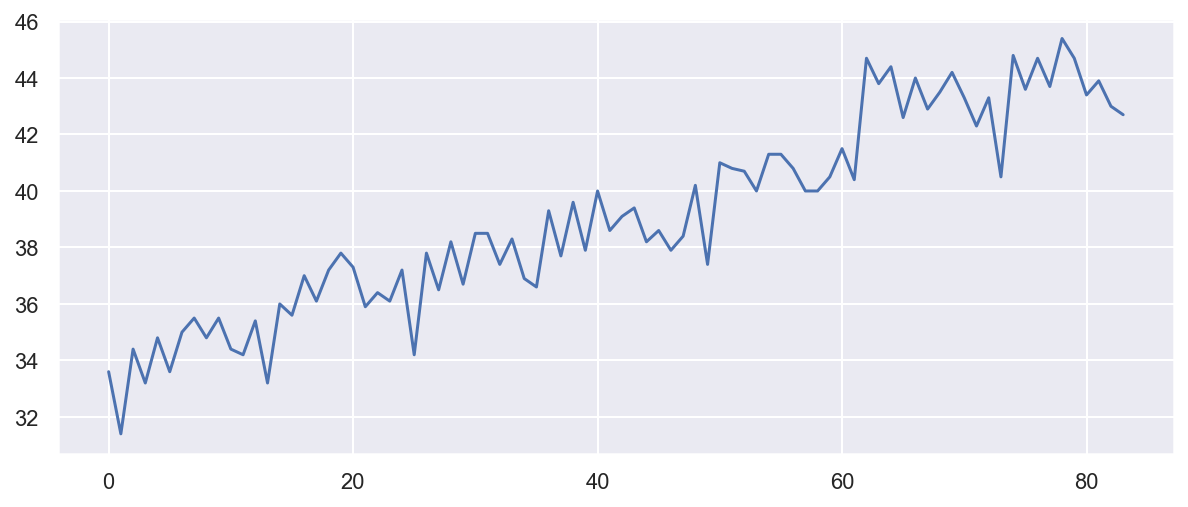

In [362]:
#Plot the pattern of the training data
plt.figure(figsize=(10,4))
sns.set(font_scale=1)
plt.plot(trainData)

In [363]:
#Run the AutoReg function with 16 lags
model = AutoReg(trainData, 16)

#Estimate the model parameters 
modelFit = model.fit()

#Print Model Results
print(modelFit.summary())

                            AutoReg Model Results                             
Dep. Variable:                   Milk   No. Observations:                   84
Model:                    AutoReg(16)   Log Likelihood                 -78.241
Method:               Conditional MLE   S.D. of innovations              0.765
Date:                Wed, 28 Dec 2022   AIC                            192.481
Time:                        14:14:41   BIC                            232.432
Sample:                            16   HQIC                           208.311
                                   84                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4722      1.373      1.072      0.284      -1.219       4.164
Milk.L1        0.4558      0.119      3.824      0.000       0.222       0.689
Milk.L2        0.1223      0.132      0.923      0.3

In [364]:
#Use the model to predict the test data size into the future

#Set parameters for start and end predictions
predictionStart = testData.index[0]
predictionEnd = testData.index[-1]

#Call the model to make predictions
predictions = modelFit.predict(start=predictionStart, end=predictionEnd)

#Difference between test and predictions
residuals = testData - predictions

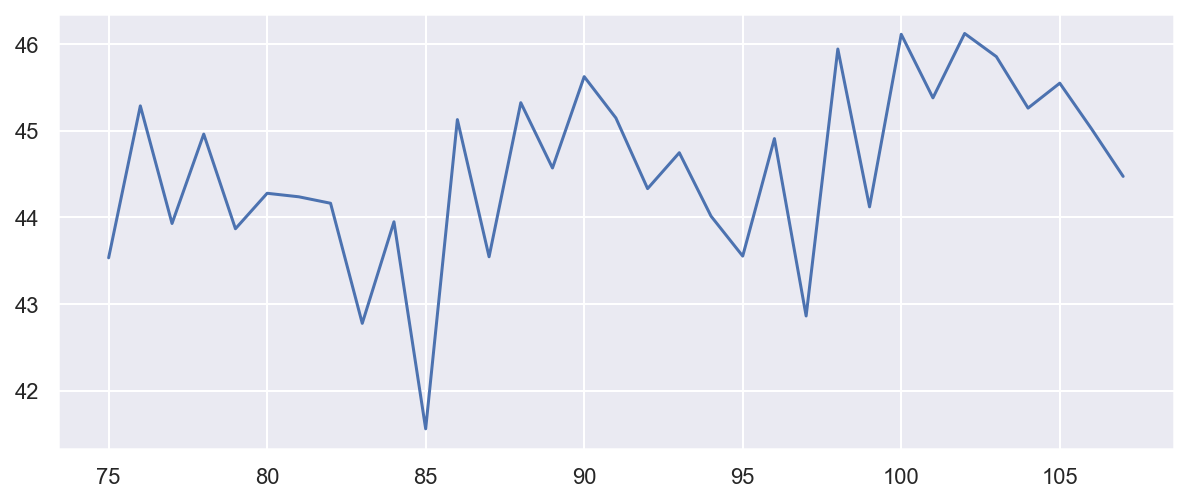

In [365]:
#Plot the pattern of the predictions
plt.figure(figsize=(10,4))
sns.set(font_scale=1)
plt.plot(predictions)

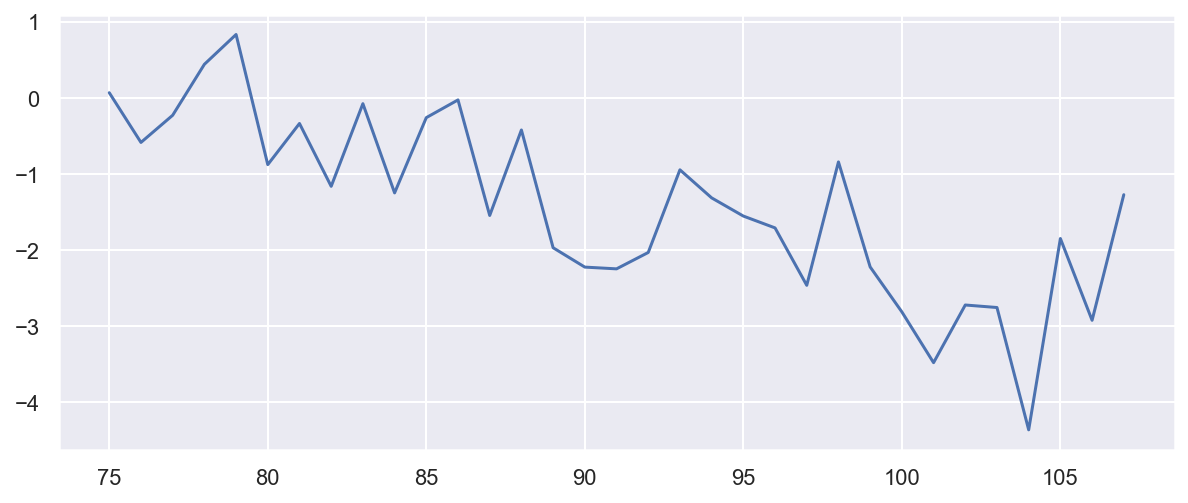

In [366]:
#Plot the pattern of the residuals
plt.figure(figsize=(10,4))
sns.set(font_scale=1)
plt.plot(residuals)

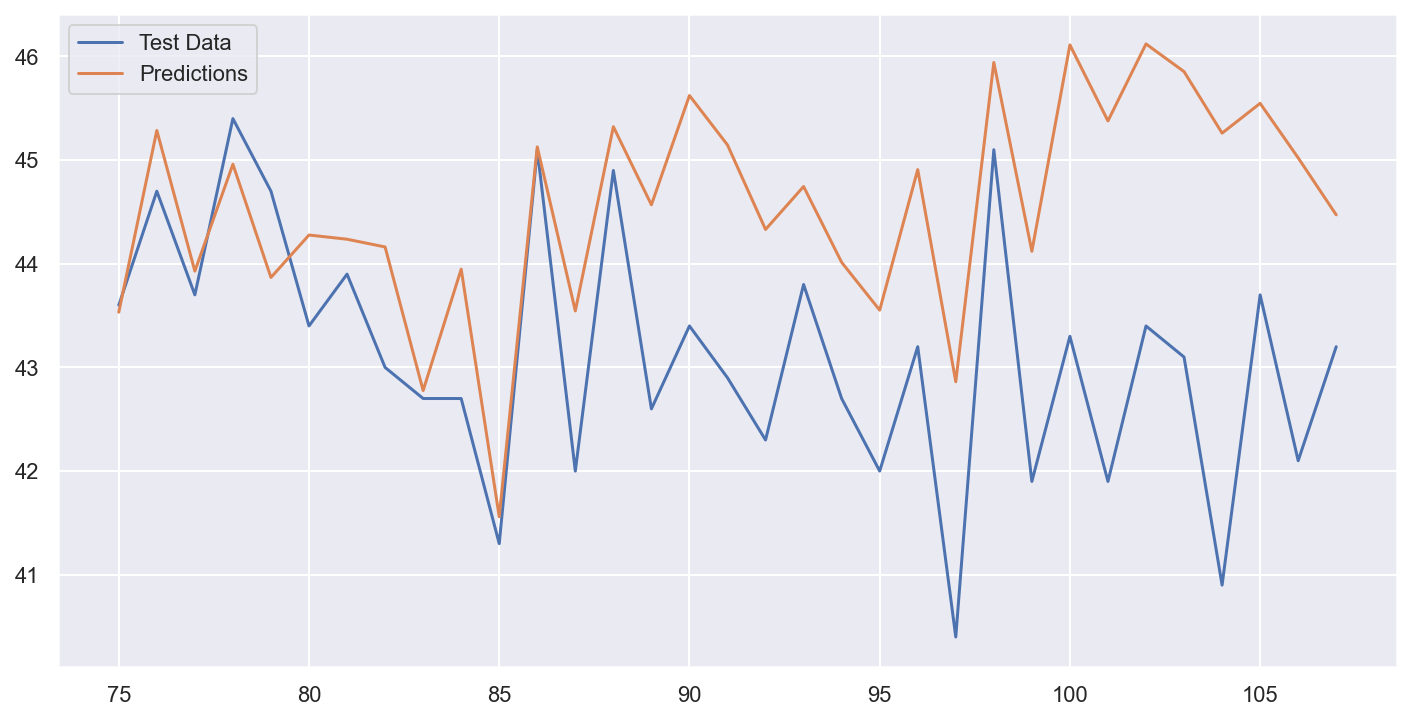

In [367]:
#Plot the graph of the Test Data vs Predictions 
plt.figure(figsize=(12,6))
#sns.set(font_scale=1)

plt.plot(testData)
plt.plot(predictions)
plt.legend(('Test Data','Predictions'))

In [368]:
#Calculate Root Mean Squared error
print(f'Root Mean Squared error is: {round(np.sqrt(np.mean(residuals**2)),2)}')

Root Mean Squared error is: 1.85


In [369]:
#Month and Butter only

dfTimeSeries = df_Milk_Monthly_Ireland_77.copy()

#Drop unwanted columns
#dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,3,4,5,6,9]], axis = 1,)

dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0, 1, 2, 3,  5, 6, 7,9, 10]], axis = 1,)


#Add dummy values for Hour to the machine learning dataframe
dfTimeSeries = pd.get_dummies(dfTimeSeries, prefix = ['Month'], columns = ['Month'], drop_first = True)

# X and y are the array variables that store the independent and dependent variables
y = dfTimeSeries['Raw Milk Deliveries']
X = dfTimeSeries.drop(columns=['Raw Milk Deliveries'])

# Split the dataset by using train_test_splitting to 25% and 75% for training and a seed of 42
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_Train, y_Train)

# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_Train, y_Train)))
print("Test set score: {:.2f}".format(lr.score(X_Test, y_Test)))


Training set score: 0.85
Test set score: 0.75


In [370]:
dfTimeSeries = df_Milk_Monthly_Ireland_77.copy()

#Drop all columns excet for Butter
dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,3,4,6,7,8,9,10]], axis = 1,)
                                                
#Convert dataframes to a series  
timeSeries = dfTimeSeries.squeeze()

#Set up the size of the splits. We will have 10 splits returned
X, y = split_train_variableInput(timeSeries, 48, 12, 48)

#splitScores will be used to hold the sum of Root Mean Squared error
splitScores = 0 

#iterate through the list for each split
for i in range (10):
    
    train = X[i]
    #We want each index to start from 0 for AutoReg function
    train.reset_index(drop=True, inplace=True)

    test = y[i]
    #We want each index to start from 0 for AutoReg function 
    train.reset_index(drop=True, inplace=True)


    #Run the AutoReg function with 16 lags
    model = AutoReg(train, 16)
    modelFit = model.fit()

    #Set parameters for start and end predictions
    predictionStart = test.index[0]
    predictionEnd = test.index[-1]

    #Call the model to make predictions
    predictions = modelFit.predict(start=predictionStart, end=predictionEnd)
    
    #Difference between test and predictions
    residuals = test - predictions
    
    #sum Root Mean Squared error
    splitScores = splitScores + np.sqrt(np.mean(residuals**2))
    
    
    #Print Root Mean Squared error
    print(f'Root Mean Squared error is: {round(np.sqrt(np.mean(residuals**2)),2)} for Split: {i}')

Root Mean Squared error is: 1.3 for Split: 0
Root Mean Squared error is: 0.76 for Split: 1
Root Mean Squared error is: 1.39 for Split: 2
Root Mean Squared error is: 4.08 for Split: 3
Root Mean Squared error is: 1.66 for Split: 4
Root Mean Squared error is: 1.8 for Split: 5
Root Mean Squared error is: 0.76 for Split: 6
Root Mean Squared error is: 2.6 for Split: 7
Root Mean Squared error is: 1.31 for Split: 8
Root Mean Squared error is: 1.43 for Split: 9


In [371]:
#Print Average Root Mean Squared error
print(f'Average Root Mean Squared error is: {round((splitScores/10),2)}')

Average Root Mean Squared error is: 1.71


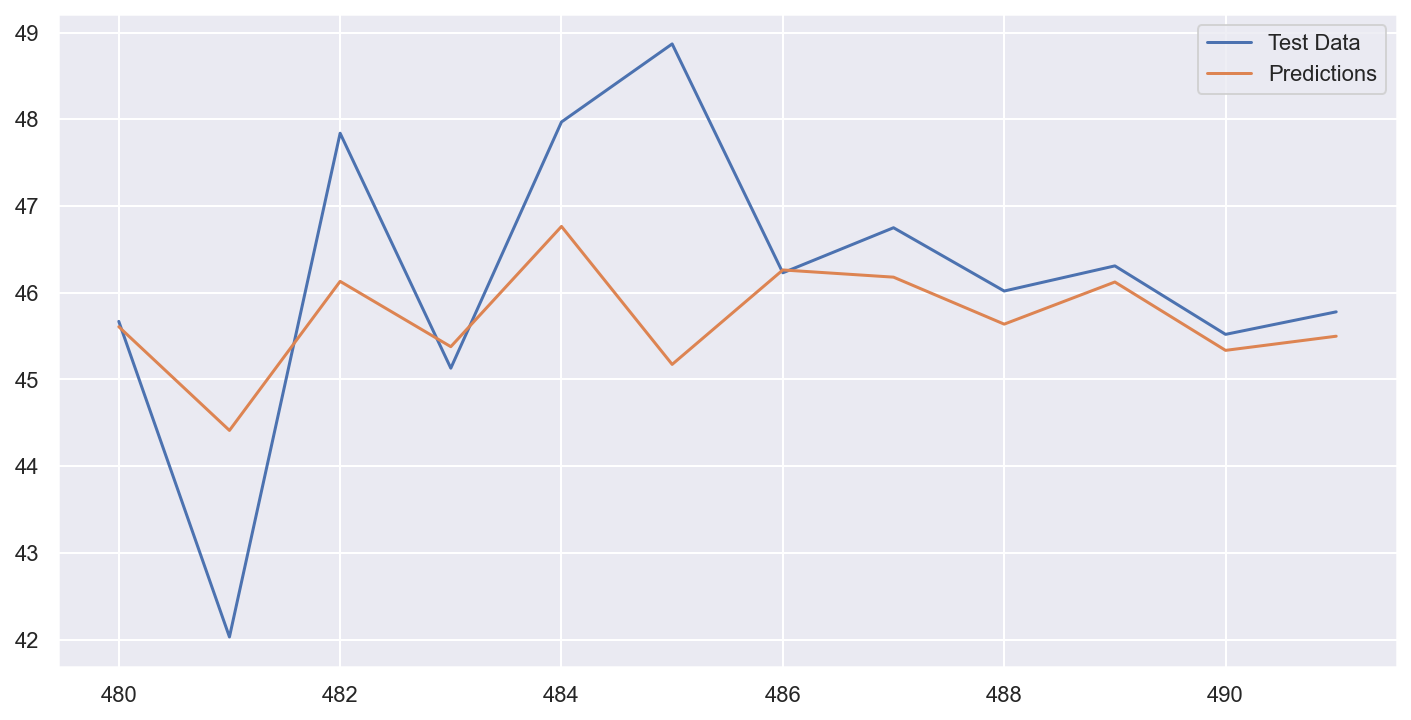

In [372]:
#Plot the graph of the Test Data vs Predictions for the last split
plt.figure(figsize=(12,6))
sns.set(font_scale=1)
plt.plot(test)
plt.plot(predictions)
plt.legend(('Test Data','Predictions'))

In [373]:
#Milk Prices

dfTimeSeries = df_Milk_Monthly_Ireland_77.copy()

#Drop unwanted columns
#dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,3,4,5,6,9]], axis = 1,)

dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0, 1, 2, 3, 5, 7, 8,9,10]], axis = 1,)


#Add dummy values for Hour to the machine learning dataframe
#dfTimeSeries = pd.get_dummies(dfTimeSeries, prefix = ['Month'], columns = ['Month'], drop_first = True)

# X and y are the array variables that store the independent and dependent variables
y = dfTimeSeries['Cream']
X = dfTimeSeries.drop(columns=['Cream'])

# Split the dataset by using train_test_splitting to 25% and 75% for training and a seed of 42
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_Train, y_Train)

# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_Train, y_Train)))
print("Test set score: {:.2f}".format(lr.score(X_Test, y_Test)))

Training set score: 0.09
Test set score: 0.17


### Forcasting

In [374]:
# Keeping Year, Month and Butter Produced
dfTimeSeries = df_Milk_Monthly_Ireland_77.copy()
dfTimeSeries = dfTimeSeries.drop(dfTimeSeries.columns[[0,1,2,4,5,6,9,10]], axis = 1,)

In [375]:
dfTimeSeries

Year  Butter  Month
0    1977    1.10      1
1    1977    2.60      2
2    1977    5.90      3
3    1977   10.00      4
4    1977   14.80      5
..    ...     ...    ...
545  2022   29.09      6
546  2022   29.26      7
547  2022   28.60      8
548  2022   23.68      9
549  2022   21.57     10

[550 rows x 3 columns]

In [376]:
df = pd.DataFrame({'Year': [2022,2022,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023],'Month': [11,12,1,2,3,4,5,6,7,8,9,10]})

In [377]:
dfTimeSeries = dfTimeSeries.append(df, ignore_index = True)

C:\Users\tonyw\AppData\Local\Temp\ipykernel_15824\327690867.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [378]:
dfTimeSeries.tail(24)

Year  Butter  Month
538  2021   17.79     11
539  2021   12.17     12
540  2022    6.71      1
541  2022   11.62      2
542  2022   24.43      3
543  2022   29.60      4
544  2022   32.01      5
545  2022   29.09      6
546  2022   29.26      7
547  2022   28.60      8
548  2022   23.68      9
549  2022   21.57     10
550  2022     NaN     11
551  2022     NaN     12
552  2023     NaN      1
553  2023     NaN      2
554  2023     NaN      3
555  2023     NaN      4
556  2023     NaN      5
557  2023     NaN      6
558  2023     NaN      7
559  2023     NaN      8
560  2023     NaN      9
561  2023     NaN     10

In [379]:
dfTimeSeries['time'] = dfTimeSeries.index+1
dfTimeSeries['time2'] = dfTimeSeries['time']**2
dfTimeSeries['time3'] = dfTimeSeries['time']**3
dfTimeSeries['m12'] = dfTimeSeries['Month'].astype(str)

In [380]:
dfTimeSeries = pd.get_dummies(dfTimeSeries, prefix=['m12'],columns=['m12'], drop_first=True)

In [381]:
dfTimeSeries = dfTimeSeries.drop(columns=['Year','Month'])

In [382]:
dfTimeSeries.shape

(562, 15)

In [383]:
training = dfTimeSeries.loc[478:537]

validation = dfTimeSeries.loc[538:549]

train_plus_valid = dfTimeSeries.loc[478:549]

forcast = dfTimeSeries.loc[550:561]

In [384]:
training

Butter  time   time2      time3  m12_10  m12_11  m12_12  m12_2  m12_3  \
478   12.49   479  229441  109902239       0       1       0      0      0   
479    8.34   480  230400  110592000       0       0       1      0      0   
480    5.19   481  231361  111284641       0       0       0      0      0   
481    8.54   482  232324  111980168       0       0       0      1      0   
482   20.30   483  233289  112678587       0       0       0      0      1   
483   24.23   484  234256  113379904       0       0       0      0      0   
484   28.25   485  235225  114084125       0       0       0      0      0   
485   27.03   486  236196  114791256       0       0       0      0      0   
486   23.94   487  237169  115501303       0       0       0      0      0   
487   23.31   488  238144  116214272       0       0       0      0      0   
488   18.23   489  239121  116930169       0       0       0      0      0   
489   17.32   490  240100  117649000       1       0       0      0      0   
490   15.92   491  241081  118370771       0       1       0      0      0   
491   11.41   492  242064  119095488       0       0       1      0      0   
492    8.85   493  243049  119823157       0       0       0      0      0   
493    9.45   494  244036  120553784       0       0       0      1      0   
494   20.18   495  245025  121287375       0       0       0      0      1   
495   23.73   496  246016  122023936       0       0       0      0      0   
496   27.50   497  247009  122763473       0       0       0      0      0   
497   25.58   498  248004  123505992       0       0       0      0      0   
498   23.43   499  249001  124251499       0       0       0      0      0   
499   24.56   500  250000  125000000       0       0       0      0      0   
500   22.48   501  251001  125751501       0       0       0      0      0   
501   20.28   502  252004  126506008       1       0       0      0      0   
502   17.88   503  253009  127263527       0       1       0      0      0   
503   13.92   504  254016  128024064       0       0       1      0      0   
504    8.18   505  255025  128787625       0       0       0      0      0   
505   10.60   506  256036  129554216       0       0       0      1      0   
506   22.21   507  257049  130323843       0       0       0      0      1   
507   28.41   508  258064  131096512       0       0       0      0      0   
508   31.04   509  259081  131872229       0       0       0      0      0   
509   28.10   510  260100  132651000       0       0       0      0      0   
510   28.24   511  261121  133432831       0       0       0      0      0   
511   25.46   512  262144  134217728       0       0       0      0      0   
512   22.32   513  263169  135005697       0       0       0      0      0   
513   20.23   514  264196  135796744       1       0       0      0      0   
514   15.04   515  265225  136590875       0       1       0      0      0   
515   11.24   516  266256  137388096       0       0       1      0      0   
516    7.20   517  267289  138188413       0       0       0      0      0   
517   11.24   518  268324  138991832       0       0       0      1      0   
518   22.56   519  269361  139798359       0       0       0      0      1   
519   28.99   520  270400  140608000       0       0       0      0      0   
520   29.81   521  271441  141420761       0       0       0      0      0   
521   30.26   522  272484  142236648       0       0       0      0      0   
522   30.90   523  273529  143055667       0       0       0      0      0   
523   26.16   524  274576  143877824       0       0       0      0      0   
524   24.02   525  275625  144703125       0       0       0      0      0   
525   22.93   526  276676  145531576       1       0       0      0      0   
526   17.64   527  277729  146363183       0       1       0      0      0   
527   13.01   528  278784  147197952       0       0       1      0      0   
528    6.53   529  279841  

In [385]:
forcast

Butter  time   time2      time3  m12_10  m12_11  m12_12  m12_2  m12_3  \
550     NaN   551  303601  167284151       0       1       0      0      0   
551     NaN   552  304704  168196608       0       0       1      0      0   
552     NaN   553  305809  169112377       0       0       0      0      0   
553     NaN   554  306916  170031464       0       0       0      1      0   
554     NaN   555  308025  170953875       0       0       0      0      1   
555     NaN   556  309136  171879616       0       0       0      0      0   
556     NaN   557  310249  172808693       0       0       0      0      0   
557     NaN   558  311364  173741112       0       0       0      0      0   
558     NaN   559  312481  174676879       0       0       0      0      0   
559     NaN   560  313600  175616000       0       0       0      0      0   
560     NaN   561  314721  176558481       0       0       0      0      0   
561     NaN   562  315844  177504328       1       0       0      0      0   

     m12_4  m12_5  m12_6  m12_7  m12_8  m12_9  
550      0      0      0      0      0      0  
551      0      0      0      0      0      0  
552      0      0      0      0      0      0  
553      0      0      0      0      0      0  
554      0      0      0      0      0      0  
555      1      0      0      0      0      0  
556      0      1      0      0      0      0  
557      0      0      1      0      0      0  
558      0      0      0      1      0      0  
559      0      0      0      0      1      0  
560      0      0      0      0      0      1  
561      0      0      0      0      0      0

In [386]:
y_train = training['Butter']
x_train = training.drop(columns=['Butter'])

y_valid = validation['Butter']
x_valid = validation.drop(columns=['Butter'])

y_train_plus_valid = train_plus_valid['Butter']
x_train_plus_valid = train_plus_valid.drop(columns=['Butter'])

x_forcast = forcast.drop(columns=['Butter'])

In [387]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [388]:
#X2 = sm.add_constant(x_train)

In [389]:
X2 = x_train

In [390]:
est = sm.OLS(y_train, X2)
est2 = est.fit()

In [391]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Butter   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              971.9
Date:                Wed, 28 Dec 2022   Prob (F-statistic):                    6.34e-52
Time:                        14:14:42   Log-Likelihood:                         -100.14
No. Observations:                  60   AIC:                                      228.3
Df Residuals:                      46   BIC:                                      257.6
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time          -0.1334      0.360     -0.371      0.713      -0.858       0.591
time2          0.0004      0.001      0.292      0.772      -0.002       0.003
time3        -2.4e-07   1.39e-06     -0.173      0.864   -3.04e-06    2.56e-06
m12_10        12.4643      0.933     13.358      0.000      10.586      14.343
m12_11         8.8046      0.928      9.489      0.000       6.937      10.672
m12_12         4.4943      0.928      4.845      0.000       2.627       6.361
m12_2          2.8215      0.928      3.042      0.004       0.954       4.689
m12_3         15.0389      0.928     16.209      0.000      13.171      16.906
m12_4         19.6862      0.928     21.210      0.000      17.818      21.554
m12_5         21.9995      0.929     23.691      0.000      20.130      23.869
m12_6         20.7906      0.929     22.375      0.000      18.920      22.661
m12_7         19.6617      0.930     21.143      0.000      17.790      21.534
m12_8         17.7687      0.931     19.090      0.000      15.895      19.642
m12_9         14.7115      0.932     15.788      0.000      12.836      16.587
==============================================================================
Omnibus:                        0.364   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.525
Skew:                          -0.143   Prob(JB):                        0.769
Kurtosis:                       2.642   Cond. No.                     1.59e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.59e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [392]:
y_pred = lr.predict(x_valid)

In [393]:
y_pred

array([20.07756051, 15.95554482, 11.65907338, 14.68814618, 27.12276322,
       31.99692451, 34.54663004, 33.58387982, 32.71067384, 31.0830121 ,
       28.3008946 , 26.33832136])

In [394]:
df = pd.DataFrame({'Actual':y_valid, 'Predicted':y_pred})

In [395]:
df.sort_index()

Actual  Predicted
538   17.79  20.077561
539   12.17  15.955545
540    6.71  11.659073
541   11.62  14.688146
542   24.43  27.122763
543   29.60  31.996925
544   32.01  34.546630
545   29.09  33.583880
546   29.26  32.710674
547   28.60  31.083012
548   23.68  28.300895
549   21.57  26.338321

In [396]:
R2 = sklearn.metrics.r2_score(y_valid, y_pred)
MAE = sklearn.metrics.mean_absolute_error(y_valid, y_pred)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_valid, y_pred))
print(R2)
print(MAE)
print(RMSE)

0.7980401642627215
3.4611186962669245
3.596964623065678


### Possible over fitting
### Drop time*3 from dataset and run results again

In [397]:
# Drop for both training and validation 
x_train_no_3 = x_train.drop(columns=['time3'])
x_valid_no_3 = x_valid.drop (columns=['time3'])

In [398]:
lr.fit(x_train_no_3 ,y_train)

LinearRegression()

In [399]:
# Get the regression co-efficients and p-values for the model

X2 = sm.add_constant(x_train_no_3)
est = sm.OLS(y_train, X2)
est2 = est.fit()

In [400]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Butter   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     124.5
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           2.71e-31
Time:                        14:14:42   Log-Likelihood:                -100.13
No. Observations:                  60   AIC:                             228.3
Df Residuals:                      46   BIC:                             257.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.2547    182.568     -0.199      0.843    -403.744     331.235
time           0.0714      0.719      0.099      0.921      -1.375       1.518
time2       2.897e-05      0.001      0.041      0.967      -0.001       0.001
m12_10        12.4639      0.933     13.360      0.000      10.586      14.342
m12_11         8.8052      0.928      9.491      0.000       6.938      10.673
m12_12         4.4946      0.927      4.846      0.000       2.628       6.362
m12_2          2.8213      0.927      3.042      0.004       0.954       4.688
m12_3         15.0386      0.928     16.211      0.000      13.171      16.906
m12_4         19.6858      0.928     21.212      0.000      17.818      21.554
m12_5         21.9990      0.929     23.693      0.000      20.130      23.868
m12_6         20.7901      0.929     22.376      0.000      18.920      22.660
m12_7         19.6611      0.930     21.145      0.000      17.789      21.533
m12_8         17.7681      0.931     19.091      0.000      15.895      19.641
m12_9         14.7110      0.932     15.789      0.000      12.836      16.586
==============================================================================
Omnibus:                        0.374   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.533
Skew:                          -0.145   Prob(JB):                        0.766
Kurtosis:                       2.641   Cond. No.                     2.50e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [401]:
# the model is trained 
# I will now ues it to predict the values from the validation data
y_pred = lr.predict(x_valid_no_3)
y_pred 

array([19.44223201, 15.23431813, 10.84240425, 13.76649037, 26.08657649,
       30.83666261, 33.25274873, 32.14683485, 31.12092097, 29.33100709,
       26.37709321, 24.23317933])

In [402]:
#Show a table comparing Actual values vs Predicted values
df = pd.DataFrame({'Actual':y_valid, 'Predicted':y_pred})
df.sort_index()

Actual  Predicted
538   17.79  19.442232
539   12.17  15.234318
540    6.71  10.842404
541   11.62  13.766490
542   24.43  26.086576
543   29.60  30.836663
544   32.01  33.252749
545   29.09  32.146835
546   29.26  31.120921
547   28.60  29.331007
548   23.68  26.377093
549   21.57  24.233179

In [403]:
#Check the metrics for when I drop time*3
R2 = sklearn.metrics.r2_score(y_valid, y_pred)
MAE = sklearn.metrics.mean_absolute_error(y_valid, y_pred)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_valid, y_pred))
print(R2)
print(MAE)
print(RMSE)

0.9124161997781819
2.178372336629604
2.368729968285379


### Possible over fitting
### Drop time*2 from dataset and run results again

In [404]:
# Drop for both training and validation 
x_train_no_2 = x_train.drop(columns=['time2'])
x_valid_no_2 = x_valid.drop (columns=['time2'])

In [405]:
lr.fit(x_train_no_2 ,y_train)

LinearRegression()

In [406]:
# Get the regression co-efficients and p-values for the model

X2 = sm.add_constant(x_train_no_2)
est = sm.OLS(y_train, X2)
est2 = est.fit()

In [407]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Butter   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     124.5
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           2.71e-31
Time:                        14:14:42   Log-Likelihood:                -100.13
No. Observations:                  60   AIC:                             228.3
Df Residuals:                      46   BIC:                             257.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.6969    121.832     -0.309      0.758    -282.932     207.538
time           0.0830      0.360      0.231      0.819      -0.641       0.807
time3       2.299e-08   4.63e-07      0.050      0.961   -9.09e-07    9.55e-07
m12_10        12.4637      0.933     13.360      0.000      10.586      14.342
m12_11         8.8051      0.928      9.491      0.000       6.938      10.673
m12_12         4.4946      0.927      4.846      0.000       2.628       6.362
m12_2          2.8214      0.927      3.042      0.004       0.954       4.688
m12_3         15.0386      0.928     16.211      0.000      13.171      16.906
m12_4         19.6859      0.928     21.212      0.000      17.818      21.554
m12_5         21.9990      0.929     23.693      0.000      20.130      23.868
m12_6         20.7901      0.929     22.377      0.000      18.920      22.660
m12_7         19.6611      0.930     21.145      0.000      17.789      21.533
m12_8         17.7680      0.931     19.091      0.000      15.895      19.641
m12_9         14.7109      0.932     15.789      0.000      12.835      16.586
==============================================================================
Omnibus:                        0.371   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.531
Skew:                          -0.145   Prob(JB):                        0.767
Kurtosis:                       2.641   Cond. No.                     8.54e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.54e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [408]:
# the model is trained 
# I will now ues it to predict the values from the validation data
y_pred = lr.predict(x_valid_no_2)
y_pred 

array([19.44629291, 15.23886259, 10.84743723, 13.77201684, 26.09260141,
       30.84319095, 33.25978545, 32.15438492, 31.12898935, 29.33959875,
       26.38621312, 24.24283245])

In [409]:
#Show a table comparing Actual values vs Predicted values
df = pd.DataFrame({'Actual':y_valid, 'Predicted':y_pred})
df.sort_index()

Actual  Predicted
538   17.79  19.446293
539   12.17  15.238863
540    6.71  10.847437
541   11.62  13.772017
542   24.43  26.092601
543   29.60  30.843191
544   32.01  33.259785
545   29.09  32.154385
546   29.26  31.128989
547   28.60  29.339599
548   23.68  26.386213
549   21.57  24.242832

In [410]:
#Check the metrics for when I drop time*3
R2 = sklearn.metrics.r2_score(y_valid, y_pred)
MAE = sklearn.metrics.mean_absolute_error(y_valid, y_pred)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_valid, y_pred))
print(R2)
print(MAE)
print(RMSE)

0.9119607325895838
2.1851838302660487
2.37488110452622


### Results between dropping time*2 vs time*3 are very very close
### Keeping time*3 as it is slightly better

### Now I will predict butter production for 12 months into the future

In [411]:
x_train_plus_valid_no_2 = x_train_plus_valid.drop(columns=['time2'])
x_forecast_no_2 = x_forcast.drop(columns=['time2'])

In [412]:
lr.fit(x_train_plus_valid_no_2, y_train_plus_valid)

LinearRegression()

In [413]:
X2 = sm.add_constant(x_train_no_2)
est = sm.OLS(y_train, X2)
est2 = est.fit()

In [414]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Butter   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     124.5
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           2.71e-31
Time:                        14:14:42   Log-Likelihood:                -100.13
No. Observations:                  60   AIC:                             228.3
Df Residuals:                      46   BIC:                             257.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.6969    121.832     -0.309      0.758    -282.932     207.538
time           0.0830      0.360      0.231      0.819      -0.641       0.807
time3       2.299e-08   4.63e-07      0.050      0.961   -9.09e-07    9.55e-07
m12_10        12.4637      0.933     13.360      0.000      10.586      14.342
m12_11         8.8051      0.928      9.491      0.000       6.938      10.673
m12_12         4.4946      0.927      4.846      0.000       2.628       6.362
m12_2          2.8214      0.927      3.042      0.004       0.954       4.688
m12_3         15.0386      0.928     16.211      0.000      13.171      16.906
m12_4         19.6859      0.928     21.212      0.000      17.818      21.554
m12_5         21.9990      0.929     23.693      0.000      20.130      23.868
m12_6         20.7901      0.929     22.377      0.000      18.920      22.660
m12_7         19.6611      0.930     21.145      0.000      17.789      21.533
m12_8         17.7680      0.931     19.091      0.000      15.895      19.641
m12_9         14.7109      0.932     15.789      0.000      12.835      16.586
==============================================================================
Omnibus:                        0.371   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.531
Skew:                          -0.145   Prob(JB):                        0.767
Kurtosis:                       2.641   Cond. No.                     8.54e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.54e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [415]:
y_pred = lr.predict(x_forecast_no_2)
y_pred

array([18.29292259, 13.75281389,  9.08585754, 12.2437202 , 24.54806854,
       29.27056923, 31.58788893, 30.08169431, 29.15698537, 27.45709544,
       24.07702453, 21.84010596])

In [416]:
df_Milk_Monthly_Ireland_77.head()

Country Geo Code  Year  Raw Milk Deliveries  Milk  Cream  Butter  Month  \
0  Ireland  IE  IRL  1977                 68.7  33.6    0.3     1.1      1   
1  Ireland  IE  IRL  1977                117.1  31.4    0.4     2.6      2   
2  Ireland  IE  IRL  1977                244.0  34.4    0.5     5.9      3   
3  Ireland  IE  IRL  1977                411.7  33.2    0.6    10.0      4   
4  Ireland  IE  IRL  1977                583.9  34.8    0.6    14.8      5   

        Date  Milk Selling Price  
0 1977-01-01               14.62  
1 1977-02-01               15.05  
2 1977-03-01               14.12  
3 1977-04-01               14.19  
4 1977-05-01               14.61

In [417]:
df_Milk_Monthly_Ireland_77.tail()

Country Geo Code  Year  Raw Milk Deliveries   Milk  Cream  Butter  Month  \
545  Ireland  IE  IRL  2022              1089.03  44.34   2.82   29.09      6   
546  Ireland  IE  IRL  2022              1053.16  43.81   3.28   29.26      7   
547  Ireland  IE  IRL  2022               946.30  44.43   3.12   28.60      8   
548  Ireland  IE  IRL  2022               808.95  42.69   2.47   23.68      9   
549  Ireland  IE  IRL  2022               719.23  42.79   2.93   21.57     10   

          Date  Milk Selling Price  
545 2022-06-01               55.45  
546 2022-07-01               57.78  
547 2022-08-01               59.73  
548 2022-09-01               64.29  
549 2022-10-01               68.47

In [418]:
Irl2000  = df_Milk_Monthly_Ireland_77.query("Year == 2000")

In [419]:
Irl2000.head(22)

Country Geo Code  Year  Raw Milk Deliveries  Milk  Cream  Butter  Month  \
276  Ireland  IE  IRL  2000                122.4  44.7    0.7     3.6      1   
277  Ireland  IE  IRL  2000                193.4  43.4    0.7     5.5      2   
278  Ireland  IE  IRL  2000                369.4  47.3    0.8    10.9      3   
279  Ireland  IE  IRL  2000                629.5  45.4    0.8    16.0      4   
280  Ireland  IE  IRL  2000                716.5  46.6    0.8    20.4      5   
281  Ireland  IE  IRL  2000                696.4  45.2    0.8    19.4      6   
282  Ireland  IE  IRL  2000                657.7  46.6    0.8    17.7      7   
283  Ireland  IE  IRL  2000                587.8  46.9    0.9    16.4      8   
284  Ireland  IE  IRL  2000                490.9  45.2    0.8    13.7      9   
285  Ireland  IE  IRL  2000                370.6  46.0    0.8    11.8     10   
286  Ireland  IE  IRL  2000                196.9  43.8    0.7     5.0     11   
287  Ireland  IE  IRL  2000                128.8  45.0    1.1     3.3     12   

          Date  Milk Selling Price  
276 2000-01-01               26.91  
277 2000-02-01               25.94  
278 2000-03-01               25.24  
279 2000-04-01               25.32  
280 2000-05-01               25.48  
281 2000-06-01               25.86  
282 2000-07-01               26.55  
283 2000-08-01               27.53  
284 2000-09-01               29.43  
285 2000-10-01               31.35  
286 2000-11-01               30.99  
287 2000-12-01               29.90

In [420]:
alt.Chart(Irl2000).mark_point().encode( 
 alt.X('Month'), 
 alt.Y('Butter') 
) 

alt.Chart(...)

In [421]:
alt.Chart(Irl2000).mark_point().encode(
alt.X('Month', scale=alt.Scale(zero=False)),
alt.Y('Butter', scale=alt.Scale(zero=False)),
alt.Size('Raw Milk Deliveries')
) 


alt.Chart(...)

In [422]:
select_year = alt.selection_single(
name='select', fields=['Year'], init={'Year': 1977},
bind=alt.binding_range(min=1977, max=2022, step=1)
)
alt.Chart(df_Milk_Monthly_Ireland_77).mark_point(filled=True).encode(
alt.X('Month', scale=alt.Scale(zero=False)),
alt.Y('Butter', scale=alt.Scale(zero=False)),
    alt.Size('Raw Milk Deliveries')
).add_selection(select_year).transform_filter(select_year)

alt.Chart(...)